In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train = pd.read_csv('../data/train.csv')
weather = pd.read_csv('../data/weather.csv')
key = pd.read_csv('../data/key.csv')
test = pd.read_csv('../data/test.csv')
sample = pd.read_csv('../data/sampleSubmission.csv')

In [27]:
def match_dateformat(df, year):
    """
    영문 월을 숫자 월로 바꾸어주고 나중에 사용하기 쉽도록 datetime.date 형태로 바꾸어주는 함수
    """
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for i in range(len(df)):
        dates = df.loc[i][0]
        dates = dates.split(" ")
        for j in range(len(months)):
            if dates[0] == months[j]:
                dates[0] = str(j + 1)
                dates_df = ["{} {} {}".format(year, dates[0], dates[1])]
                dates_df = pd.to_datetime(dates_df)
                df.loc[i][0] = dates_df.date[0]
    return df

In [28]:
def merge_holiday(holiday_df1, holiday_df2, holiday_df3):
    """
    각 연도별 공휴일 리스트 합치기
    """
    frame = [holiday_df1, holiday_df2, holiday_df3]
    holiday = pd.concat(frame).reset_index(drop=True)
    return holiday

In [29]:
def find_holiday(file, year):
    """
    수요에 영향을 미치는 주요 공휴일을 찾아내는 함수
    """
    holidays = ["New Year's Day", "Martin Luther King Jr. Day", "Valentine's Day",  "President's Day", "Easter Sunday", 
                      "Mother's Day", "Memorial Day", "Father's Day", "Independence Day", "Labor Day", "Columbus Day",
                      "Halloween", "Veterans Day", "Thanksgiving Day", "Black Friday", "Christmas Eve", "Christmas Day", "New Year's Eve"]
    
    holi = pd.read_excel(file, year, header=None)
    holi = match_dateformat(holi, year)
    holiday = pd.DataFrame(columns=[0,1,2,3,4])
    for _ in holidays:
        for i in range(len(holi[2])):
            if _ == holi[2][i]:
                holiday = holiday.append(holi.loc[i])
    return holiday

In [30]:
def preprocessing(df, holiday):
    """
    train데이터를 가공하는 함수
    """
    df['units'] = np.log(df['units'] + 1)
    df['date'] = pd.to_datetime(df['date'])
    df['weekday'] = df.date.dt.weekday #월요일이 0 일요일이 6
    df['weekend'] = df.date.dt.weekday.isin([5, 6]) # 5: 토요일, 6: 일요일
    
    df['holiday'] = df.date.isin(holiday[0])
    df['weekday_holiday'] = df.holiday & (df.weekend == False)
    df['weekend_holiday'] = df.holiday & df.weekend
    return df

In [31]:
holiday12 = find_holiday('../data/holiday.xlsx', '2012')
holiday13 = find_holiday('../data/holiday.xlsx', '2013')
holiday14 = find_holiday('../data/holiday.xlsx', '2014')
holiday = merge_holiday(holiday12, holiday13, holiday14)
train = train.merge(key, left_on='store_nbr', right_on='store_nbr')
processed_train = preprocessing(train, holiday)
train_pivot = train.pivot_table(values='units', index=['date'], columns=['station_nbr','store_nbr','item_nbr'], aggfunc=np.sum)


In [32]:
processed_train_weekend = processed_train[processed_train['weekend'] == True] # holiday만 추려서 dataframe 만듬.
processed_train_weekday = processed_train[processed_train['weekend'] == False] # holiday 아닌 날들만 추려서 dataframe 만듬.

In [39]:
processed_train_weekday.reset_index(drop = True, inplace = True)
processed_train_weekday = processed_train_weekday[:3254964] #2013년 3월 31일까지의 data

In [56]:
def weekend_store(df, nbr) : # 2013년 3월 31일까지의 train set으로 만들어줌..
    df_new = df[df['store_nbr'] == nbr]
    df_new.reset_index(drop = True, inplace = True)
    df_new = df_new[:14541]
    return df_new

In [57]:
def weekday_store(df, nbr) : # 2013년 3월 31일까지의 train set으로 만들어줌..
    df_new = df[df['store_nbr'] == nbr]
    df_new.reset_index(drop = True, inplace = True)
    df_new = df_new[:35964]
    return df_new

In [58]:
# holiday만 추린 dataframe에서 각 store_nbr 별로 dataframe을 만들어줌.

processed_train_weekend_store1 = weekend_store(processed_train_weekend, 1)
processed_train_weekend_store2 = weekend_store(processed_train_weekend, 2)
processed_train_weekend_store3 = weekend_store(processed_train_weekend, 3)
processed_train_weekend_store4 = weekend_store(processed_train_weekend, 4)
processed_train_weekend_store5 = weekend_store(processed_train_weekend, 5)
processed_train_weekend_store6 = weekend_store(processed_train_weekend, 6)
processed_train_weekend_store7 = weekend_store(processed_train_weekend, 7)
processed_train_weekend_store8 = weekend_store(processed_train_weekend, 8)
processed_train_weekend_store9 = weekend_store(processed_train_weekend, 9)
processed_train_weekend_store10 = weekend_store(processed_train_weekend, 10)
processed_train_weekend_store11 = weekend_store(processed_train_weekend, 11)
processed_train_weekend_store12 = weekend_store(processed_train_weekend, 12)
processed_train_weekend_store13 = weekend_store(processed_train_weekend, 13)
processed_train_weekend_store14 = weekend_store(processed_train_weekend, 14)
processed_train_weekend_store15 = weekend_store(processed_train_weekend, 15)
processed_train_weekend_store16 = weekend_store(processed_train_weekend, 16)
processed_train_weekend_store17 = weekend_store(processed_train_weekend, 17)
processed_train_weekend_store18 = weekend_store(processed_train_weekend, 18)
processed_train_weekend_store19 = weekend_store(processed_train_weekend, 19)
processed_train_weekend_store20 = weekend_store(processed_train_weekend, 20)
processed_train_weekend_store21 = weekend_store(processed_train_weekend, 21)
processed_train_weekend_store22 = weekend_store(processed_train_weekend, 22)
processed_train_weekend_store23 = weekend_store(processed_train_weekend, 23)
processed_train_weekend_store24 = weekend_store(processed_train_weekend, 24)
processed_train_weekend_store25 = weekend_store(processed_train_weekend, 25)
processed_train_weekend_store26 = weekend_store(processed_train_weekend, 26)
processed_train_weekend_store27 = weekend_store(processed_train_weekend, 27)
processed_train_weekend_store28 = weekend_store(processed_train_weekend, 28)
processed_train_weekend_store29 = weekend_store(processed_train_weekend, 29)
processed_train_weekend_store30 = weekend_store(processed_train_weekend, 30)
processed_train_weekend_store31 = weekend_store(processed_train_weekend, 31)
processed_train_weekend_store32 = weekend_store(processed_train_weekend, 32)
processed_train_weekend_store33 = weekend_store(processed_train_weekend, 33)
processed_train_weekend_store34 = weekend_store(processed_train_weekend, 34)
processed_train_weekend_store35 = weekend_store(processed_train_weekend, 35)
processed_train_weekend_store36 = weekend_store(processed_train_weekend, 36)
processed_train_weekend_store37 = weekend_store(processed_train_weekend, 37)
processed_train_weekend_store38 = weekend_store(processed_train_weekend, 38)
processed_train_weekend_store39 = weekend_store(processed_train_weekend, 39)
processed_train_weekend_store40 = weekend_store(processed_train_weekend, 40)
processed_train_weekend_store41 = weekend_store(processed_train_weekend, 41)
processed_train_weekend_store42 = weekend_store(processed_train_weekend, 42)
processed_train_weekend_store43 = weekend_store(processed_train_weekend, 43)
processed_train_weekend_store44 = weekend_store(processed_train_weekend, 44)
processed_train_weekend_store45 = weekend_store(processed_train_weekend, 45)

In [59]:
# weekday만 추린 dataframe에서 각 store_nbr 별로 dataframe을 만들어줌.

processed_train_weekday_store1 = weekday_store(processed_train_weekday, 1)
processed_train_weekday_store2 = weekday_store(processed_train_weekday, 2)
processed_train_weekday_store3 = weekday_store(processed_train_weekday, 3)
processed_train_weekday_store4 = weekday_store(processed_train_weekday, 4)
processed_train_weekday_store5 = weekday_store(processed_train_weekday, 5)
processed_train_weekday_store6 = weekday_store(processed_train_weekday, 6)
processed_train_weekday_store7 = weekday_store(processed_train_weekday, 7)
processed_train_weekday_store8 = weekday_store(processed_train_weekday, 8)
processed_train_weekday_store9 = weekday_store(processed_train_weekday, 9)
processed_train_weekday_store10 = weekday_store(processed_train_weekday, 10)
processed_train_weekday_store11 = weekday_store(processed_train_weekday, 11)
processed_train_weekday_store12 = weekday_store(processed_train_weekday, 12)
processed_train_weekday_store13 = weekday_store(processed_train_weekday, 13)
processed_train_weekday_store14 = weekday_store(processed_train_weekday, 14)
processed_train_weekday_store15 = weekday_store(processed_train_weekday, 15)
processed_train_weekday_store16 = weekday_store(processed_train_weekday, 16)
processed_train_weekday_store17 = weekday_store(processed_train_weekday, 17)
processed_train_weekday_store18 = weekday_store(processed_train_weekday, 18)
processed_train_weekday_store19 = weekday_store(processed_train_weekday, 19)
processed_train_weekday_store20 = weekday_store(processed_train_weekday, 20)
processed_train_weekday_store21 = weekday_store(processed_train_weekday, 21)
processed_train_weekday_store22 = weekday_store(processed_train_weekday, 22)
processed_train_weekday_store23 = weekday_store(processed_train_weekday, 23)
processed_train_weekday_store24 = weekday_store(processed_train_weekday, 24)
processed_train_weekday_store25 = weekday_store(processed_train_weekday, 25)
processed_train_weekday_store26 = weekday_store(processed_train_weekday, 26)
processed_train_weekday_store27 = weekday_store(processed_train_weekday, 27)
processed_train_weekday_store28 = weekday_store(processed_train_weekday, 28)
processed_train_weekday_store29 = weekday_store(processed_train_weekday, 29)
processed_train_weekday_store30 = weekday_store(processed_train_weekday, 30)
processed_train_weekday_store31 = weekday_store(processed_train_weekday, 31)
processed_train_weekday_store32 = weekday_store(processed_train_weekday, 32)
processed_train_weekday_store33 = weekday_store(processed_train_weekday, 33)
processed_train_weekday_store34 = weekday_store(processed_train_weekday, 34)
processed_train_weekday_store35 = weekday_store(processed_train_weekday, 35)
processed_train_weekday_store36 = weekday_store(processed_train_weekday, 36)
processed_train_weekday_store37 = weekday_store(processed_train_weekday, 37)
processed_train_weekday_store38 = weekday_store(processed_train_weekday, 38)
processed_train_weekday_store39 = weekday_store(processed_train_weekday, 39)
processed_train_weekday_store40 = weekday_store(processed_train_weekday, 40)
processed_train_weekday_store41 = weekday_store(processed_train_weekday, 41)
processed_train_weekday_store42 = weekday_store(processed_train_weekday, 42)
processed_train_weekday_store43 = weekday_store(processed_train_weekday, 43)
processed_train_weekday_store44 = weekday_store(processed_train_weekday, 44)
processed_train_weekday_store45 = weekday_store(processed_train_weekday, 45)

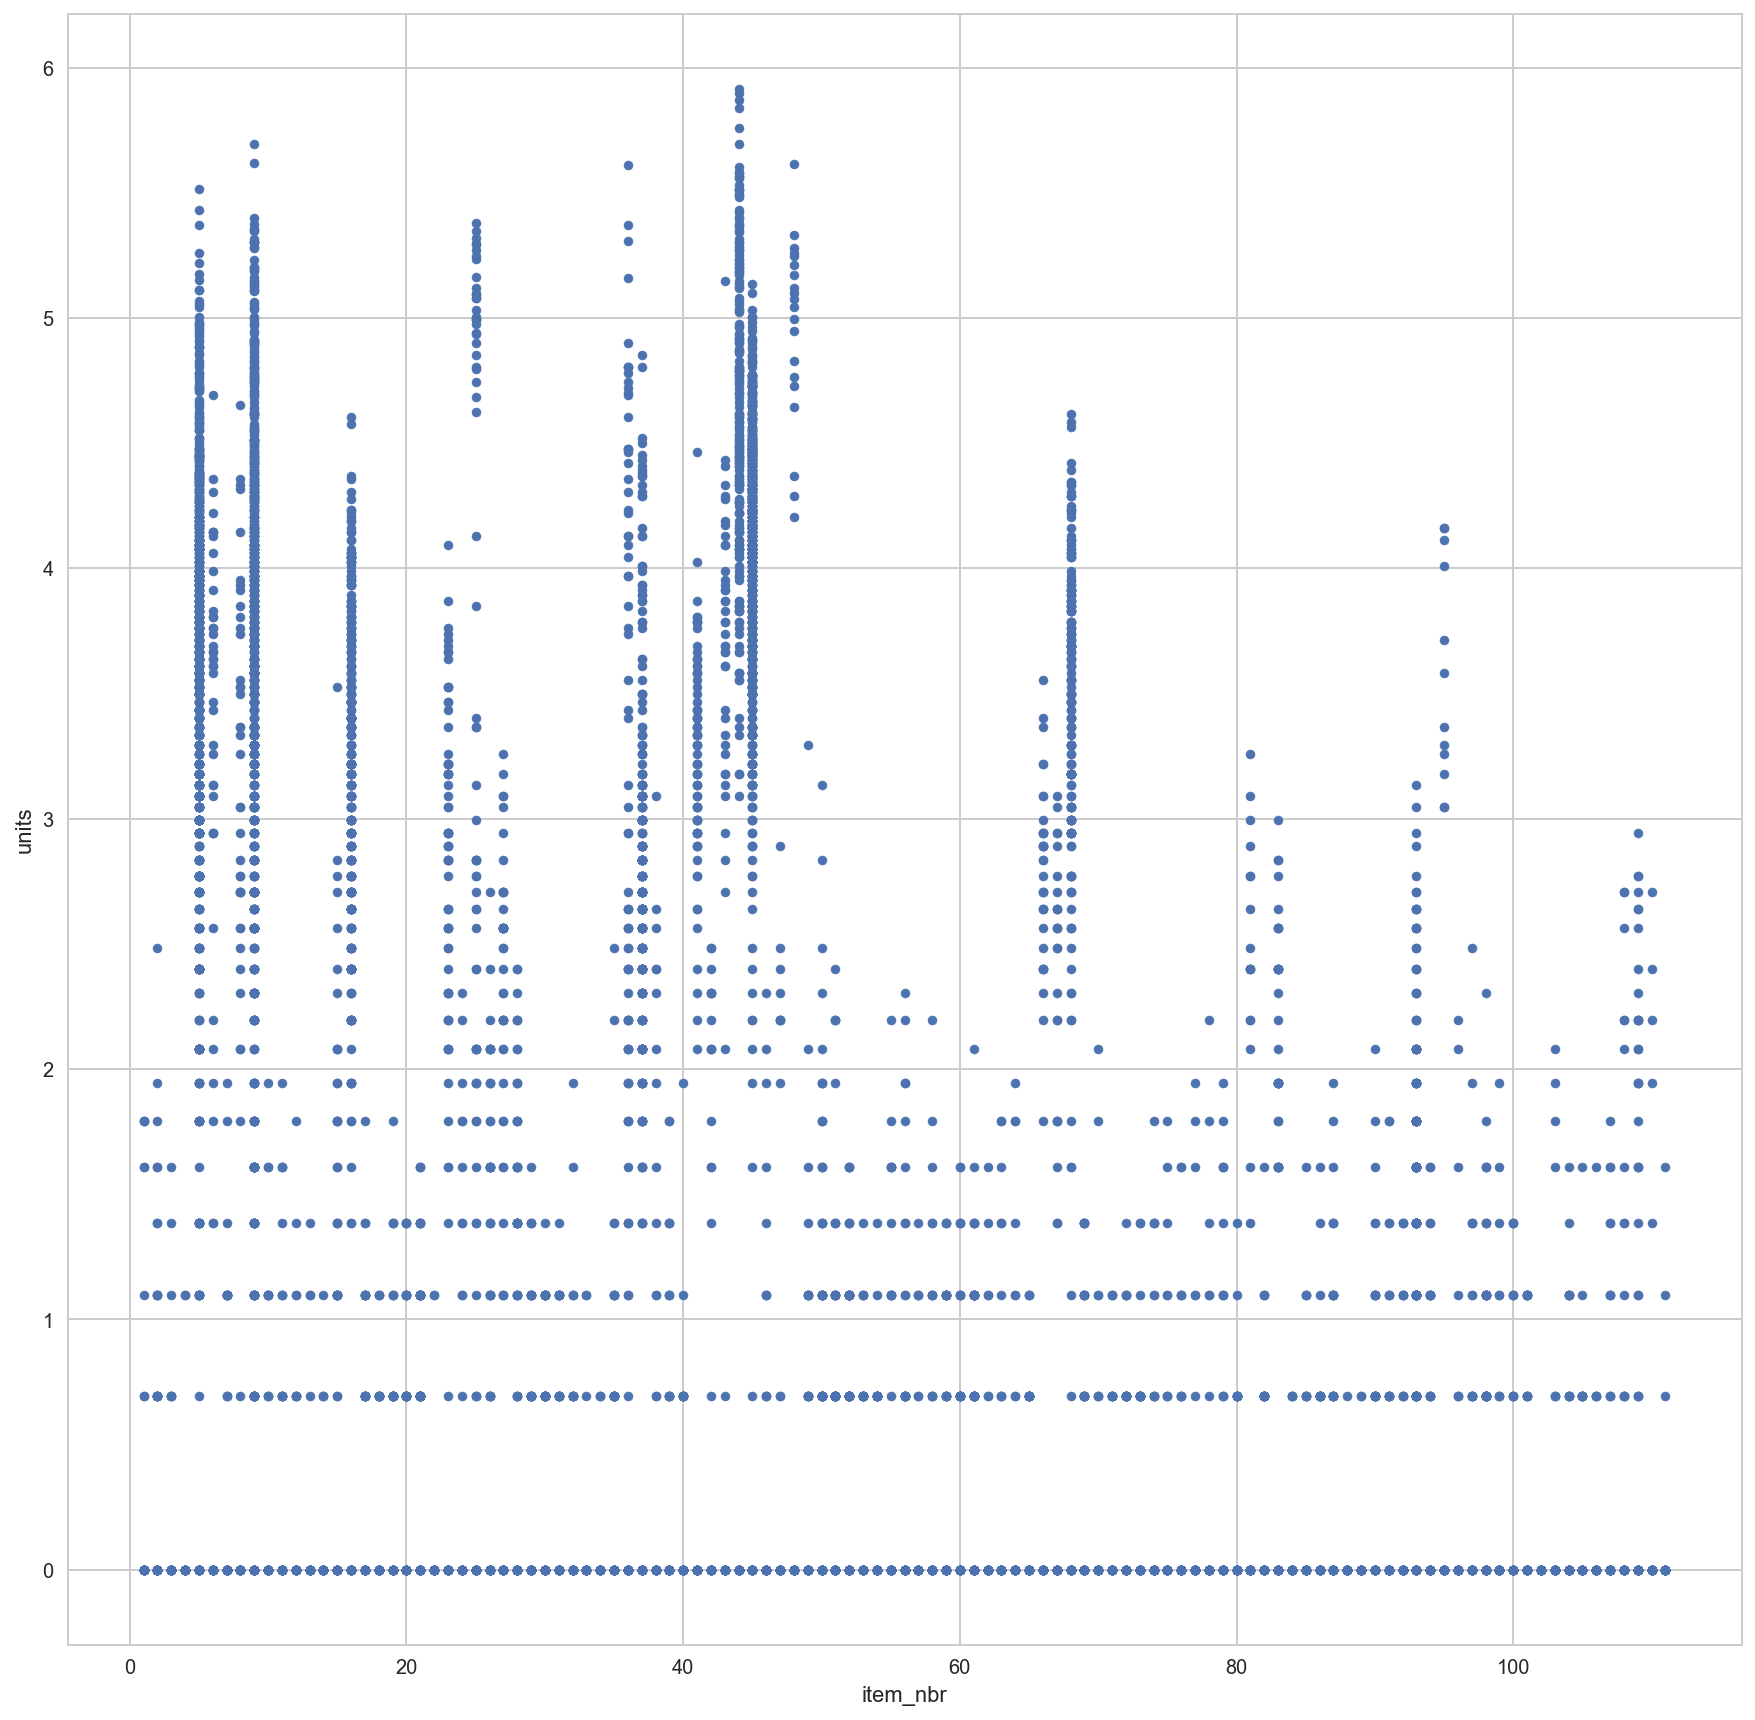

In [72]:
temp = processed_train_holiday.pivot_table(values = 'units', index = ['item_nbr'], columns = ['store_nbr'])

# temp
# plt.figure(figsize = (20, 20))
# plt.boxplot(temp)
# temp.plot.scatter(x = 'item_nbr', y = ['store_nbr'], figsize = (15,15))
processed_train_holiday.plot(kind = 'scatter', x = 'item_nbr', y = 'units', figsize = (15, 15)) ## item_nbr에 따라 units을 store_nbr로 점 찍음
plt.show()


In [1]:
# station_nbr == 1의 units 분포 (아래로 쭉 같은 형태의 코드 station_nbr가 같은 store끼리 묶어서 weekend/weekday의 units분포 확인)
# stripplot, boxplot으로 확인
# store_nbr == 1

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store1
data2 = processed_train_weekday_store1

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1) # weekend
plt.title('station_nbr == 1')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2) # non weekend
plt.title('station_nbr == 1')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1) # weekend
plt.title('station_nbr == 1')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2) # non weekend
plt.title('station_nbr == 1')

plt.show()

NameError: name 'processed_train_weekend_store1' is not defined

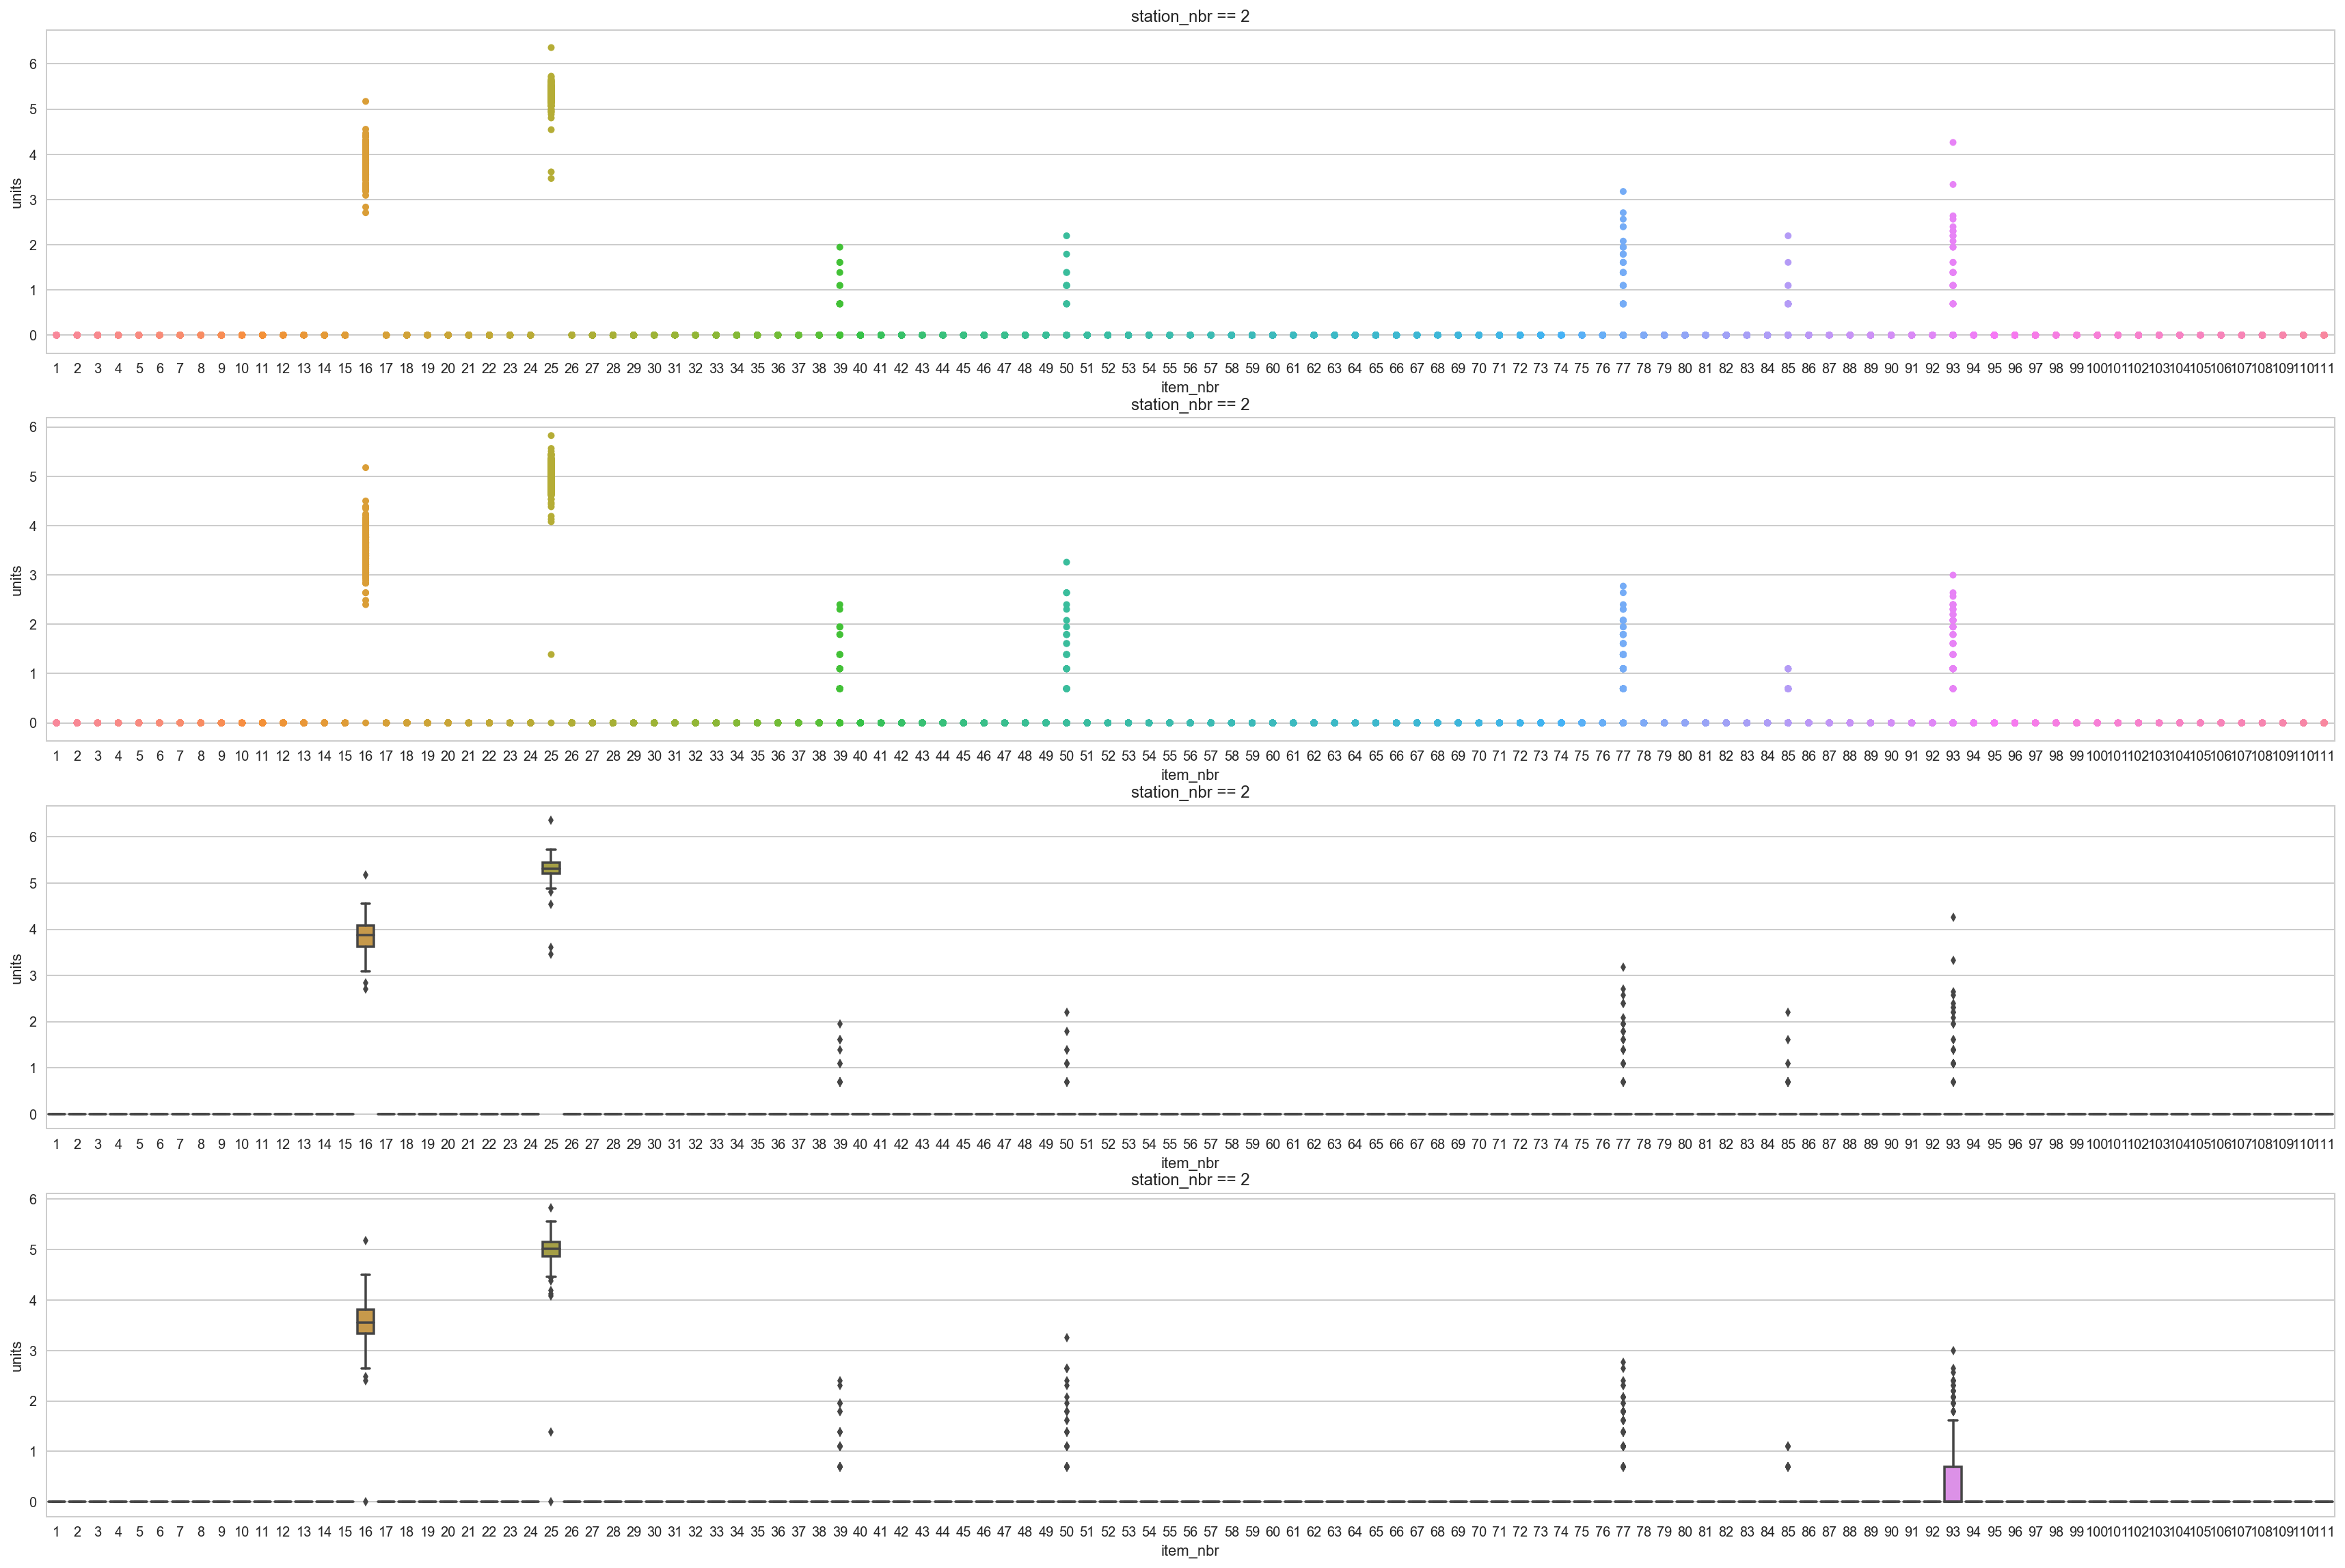

In [63]:
# station_nbr == 2
# store_nbr == 16

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store16
data2 = processed_train_weekday_store16

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 2')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 2')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 2')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 2')

plt.show()

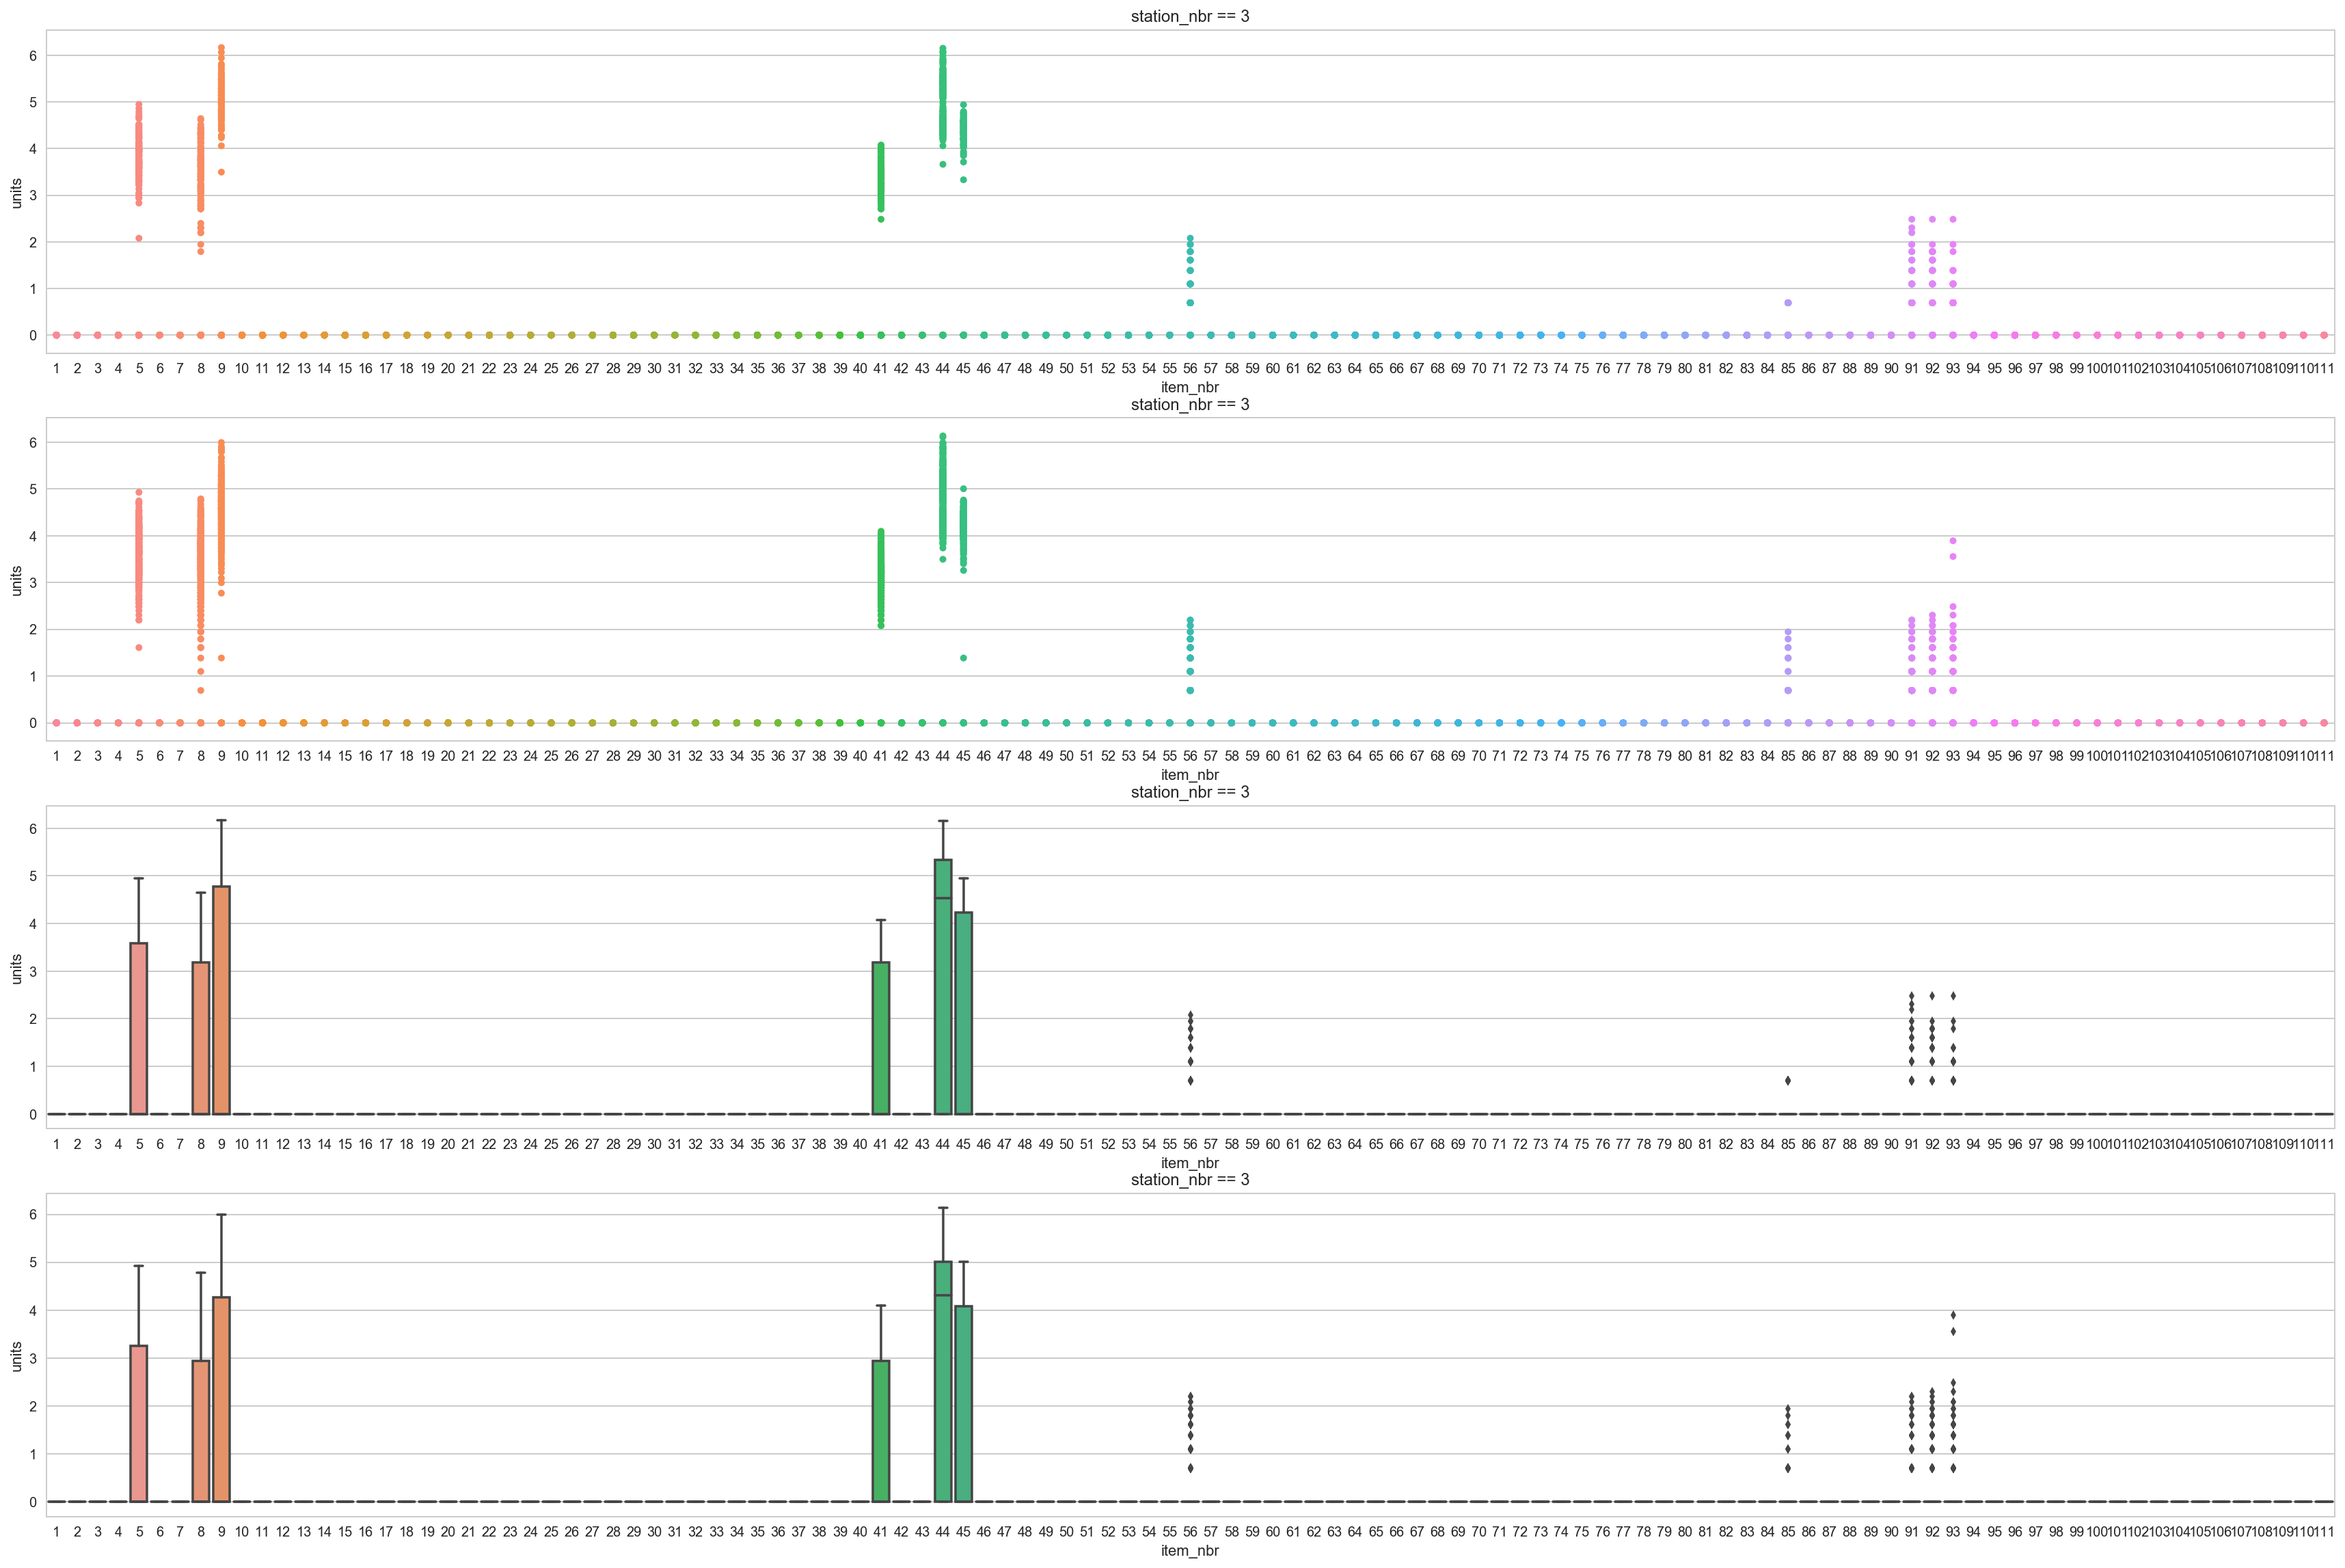

In [64]:
# station_nbr == 3
# store_nbr == 21, 29, 33

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store21, processed_train_weekend_store29, processed_train_weekend_store33])
data2 = pd.concat([processed_train_weekday_store21, processed_train_weekday_store29, processed_train_weekday_store33])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 3')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 3')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 3')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 3')

plt.show()

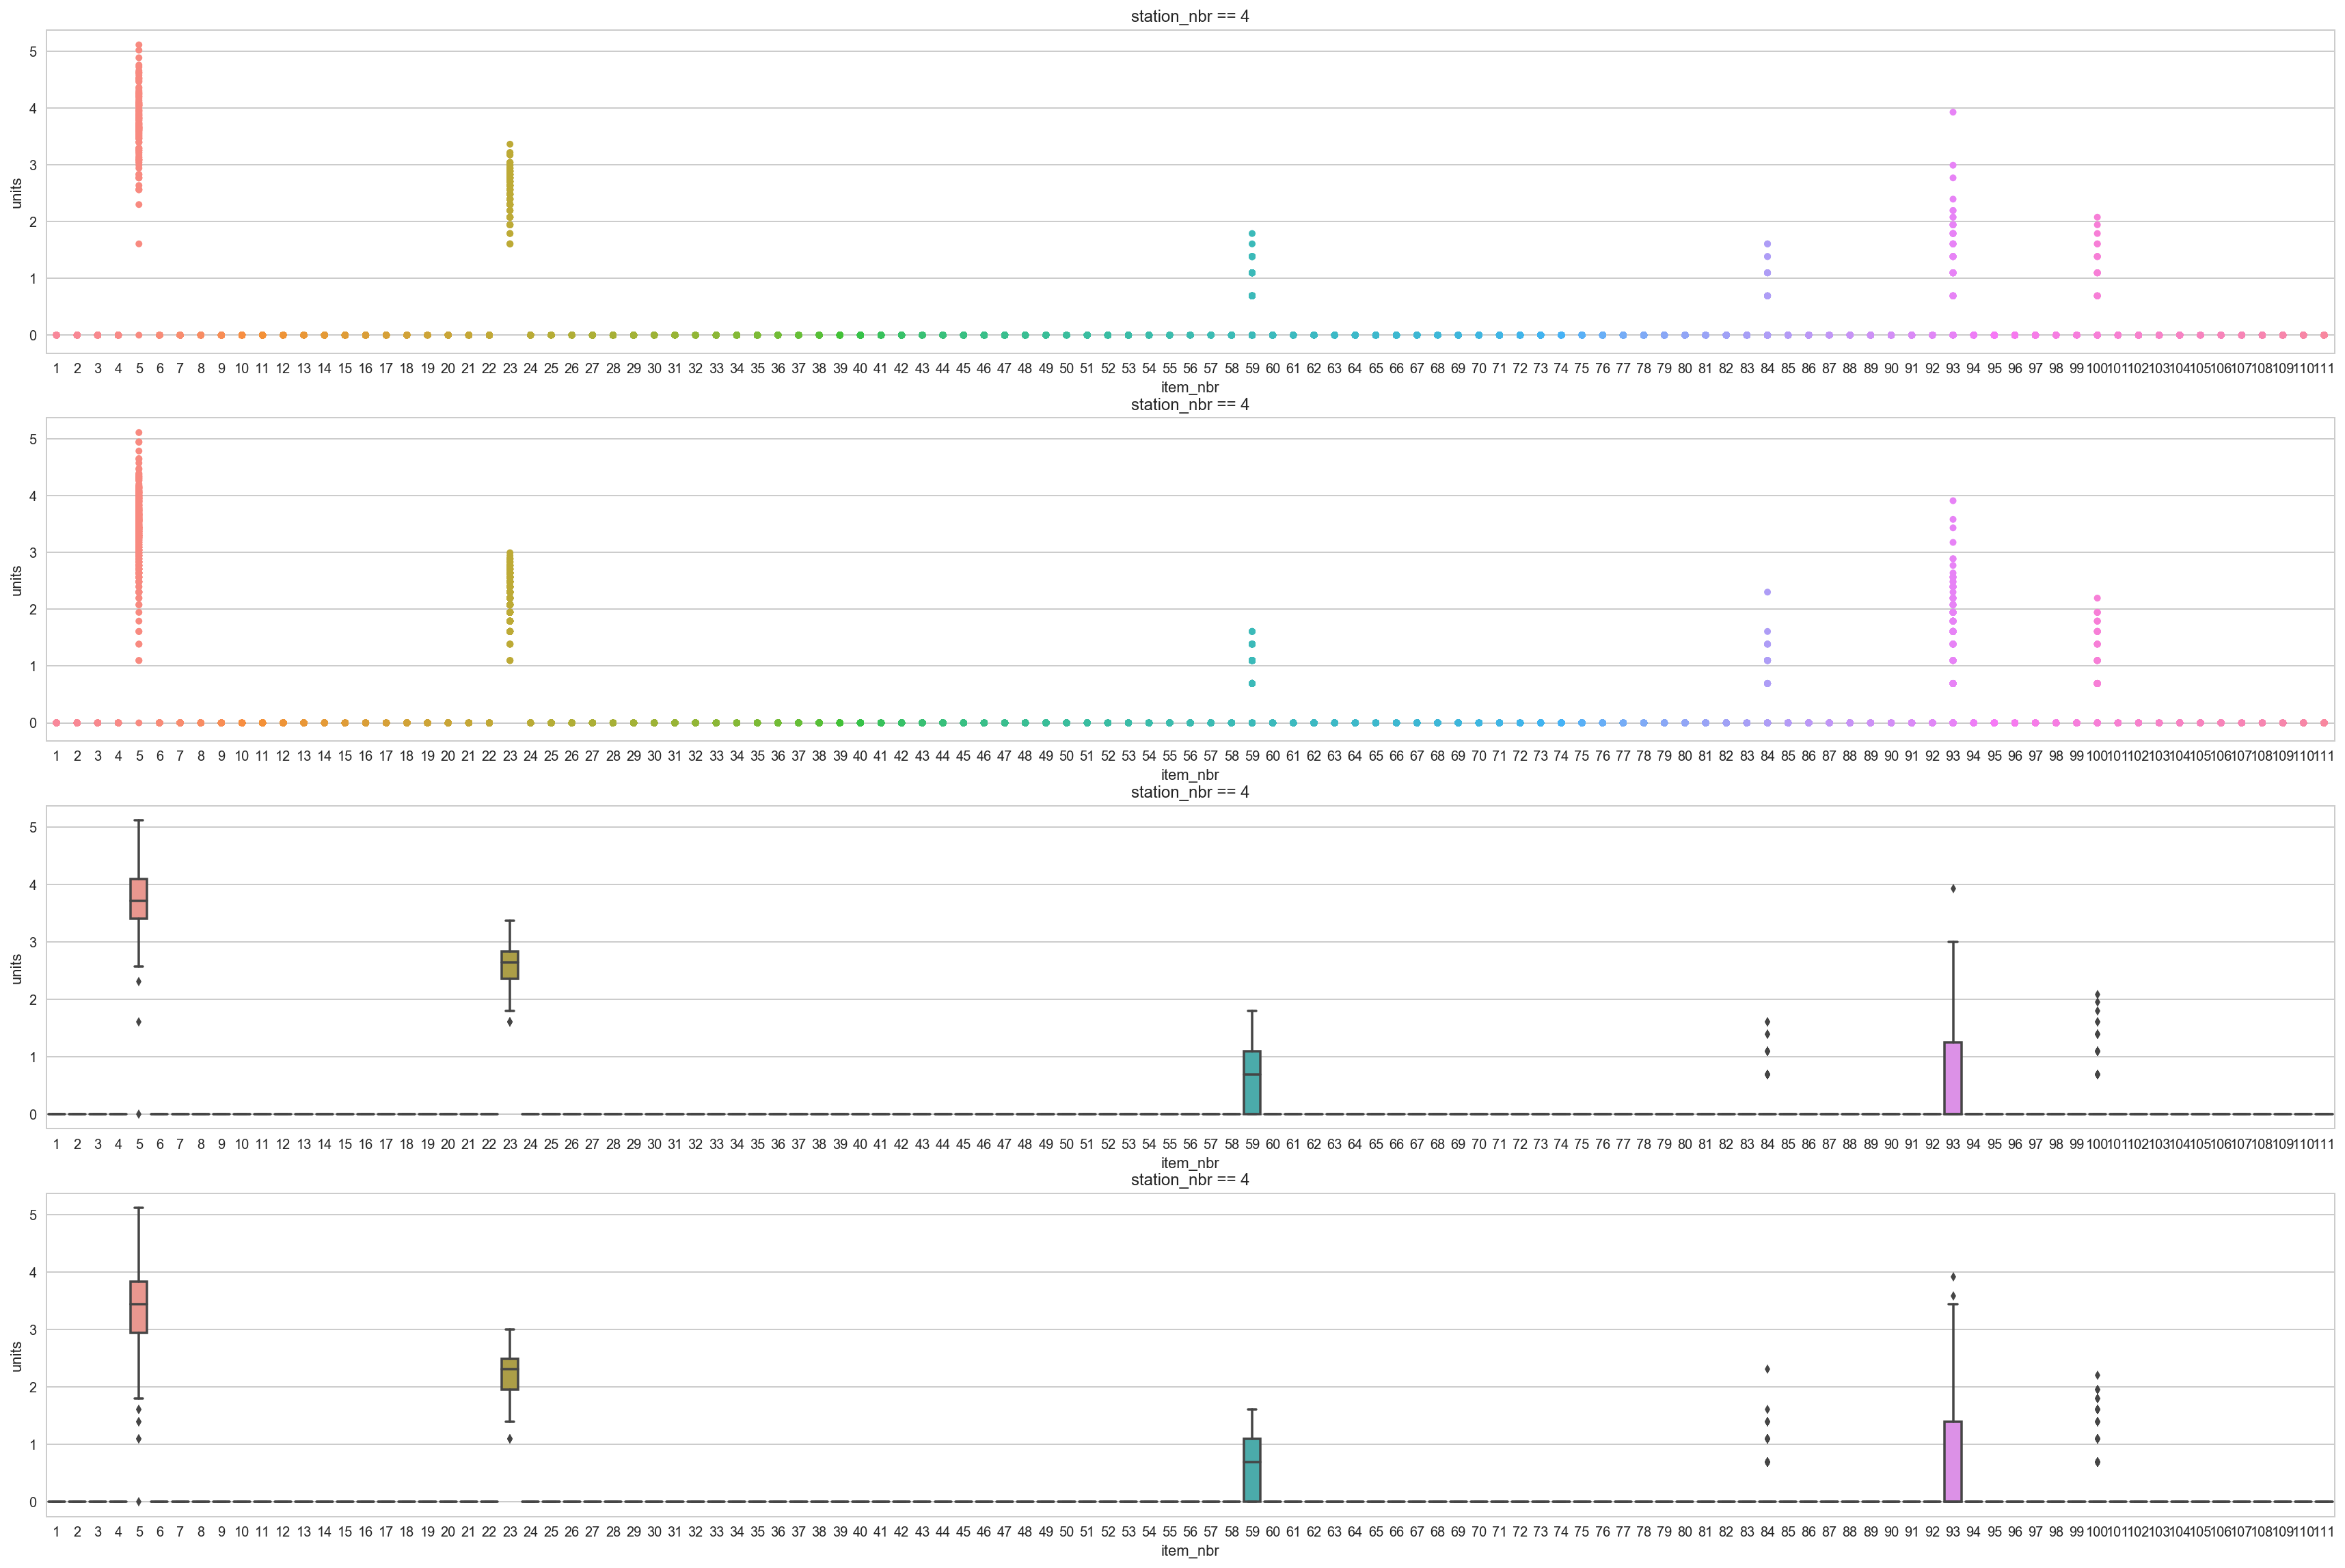

In [65]:
# station_nbr == 4
# store_nbr == 8

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store8
data2 = processed_train_weekday_store8

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 4')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 4')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 4')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 4')

plt.show()

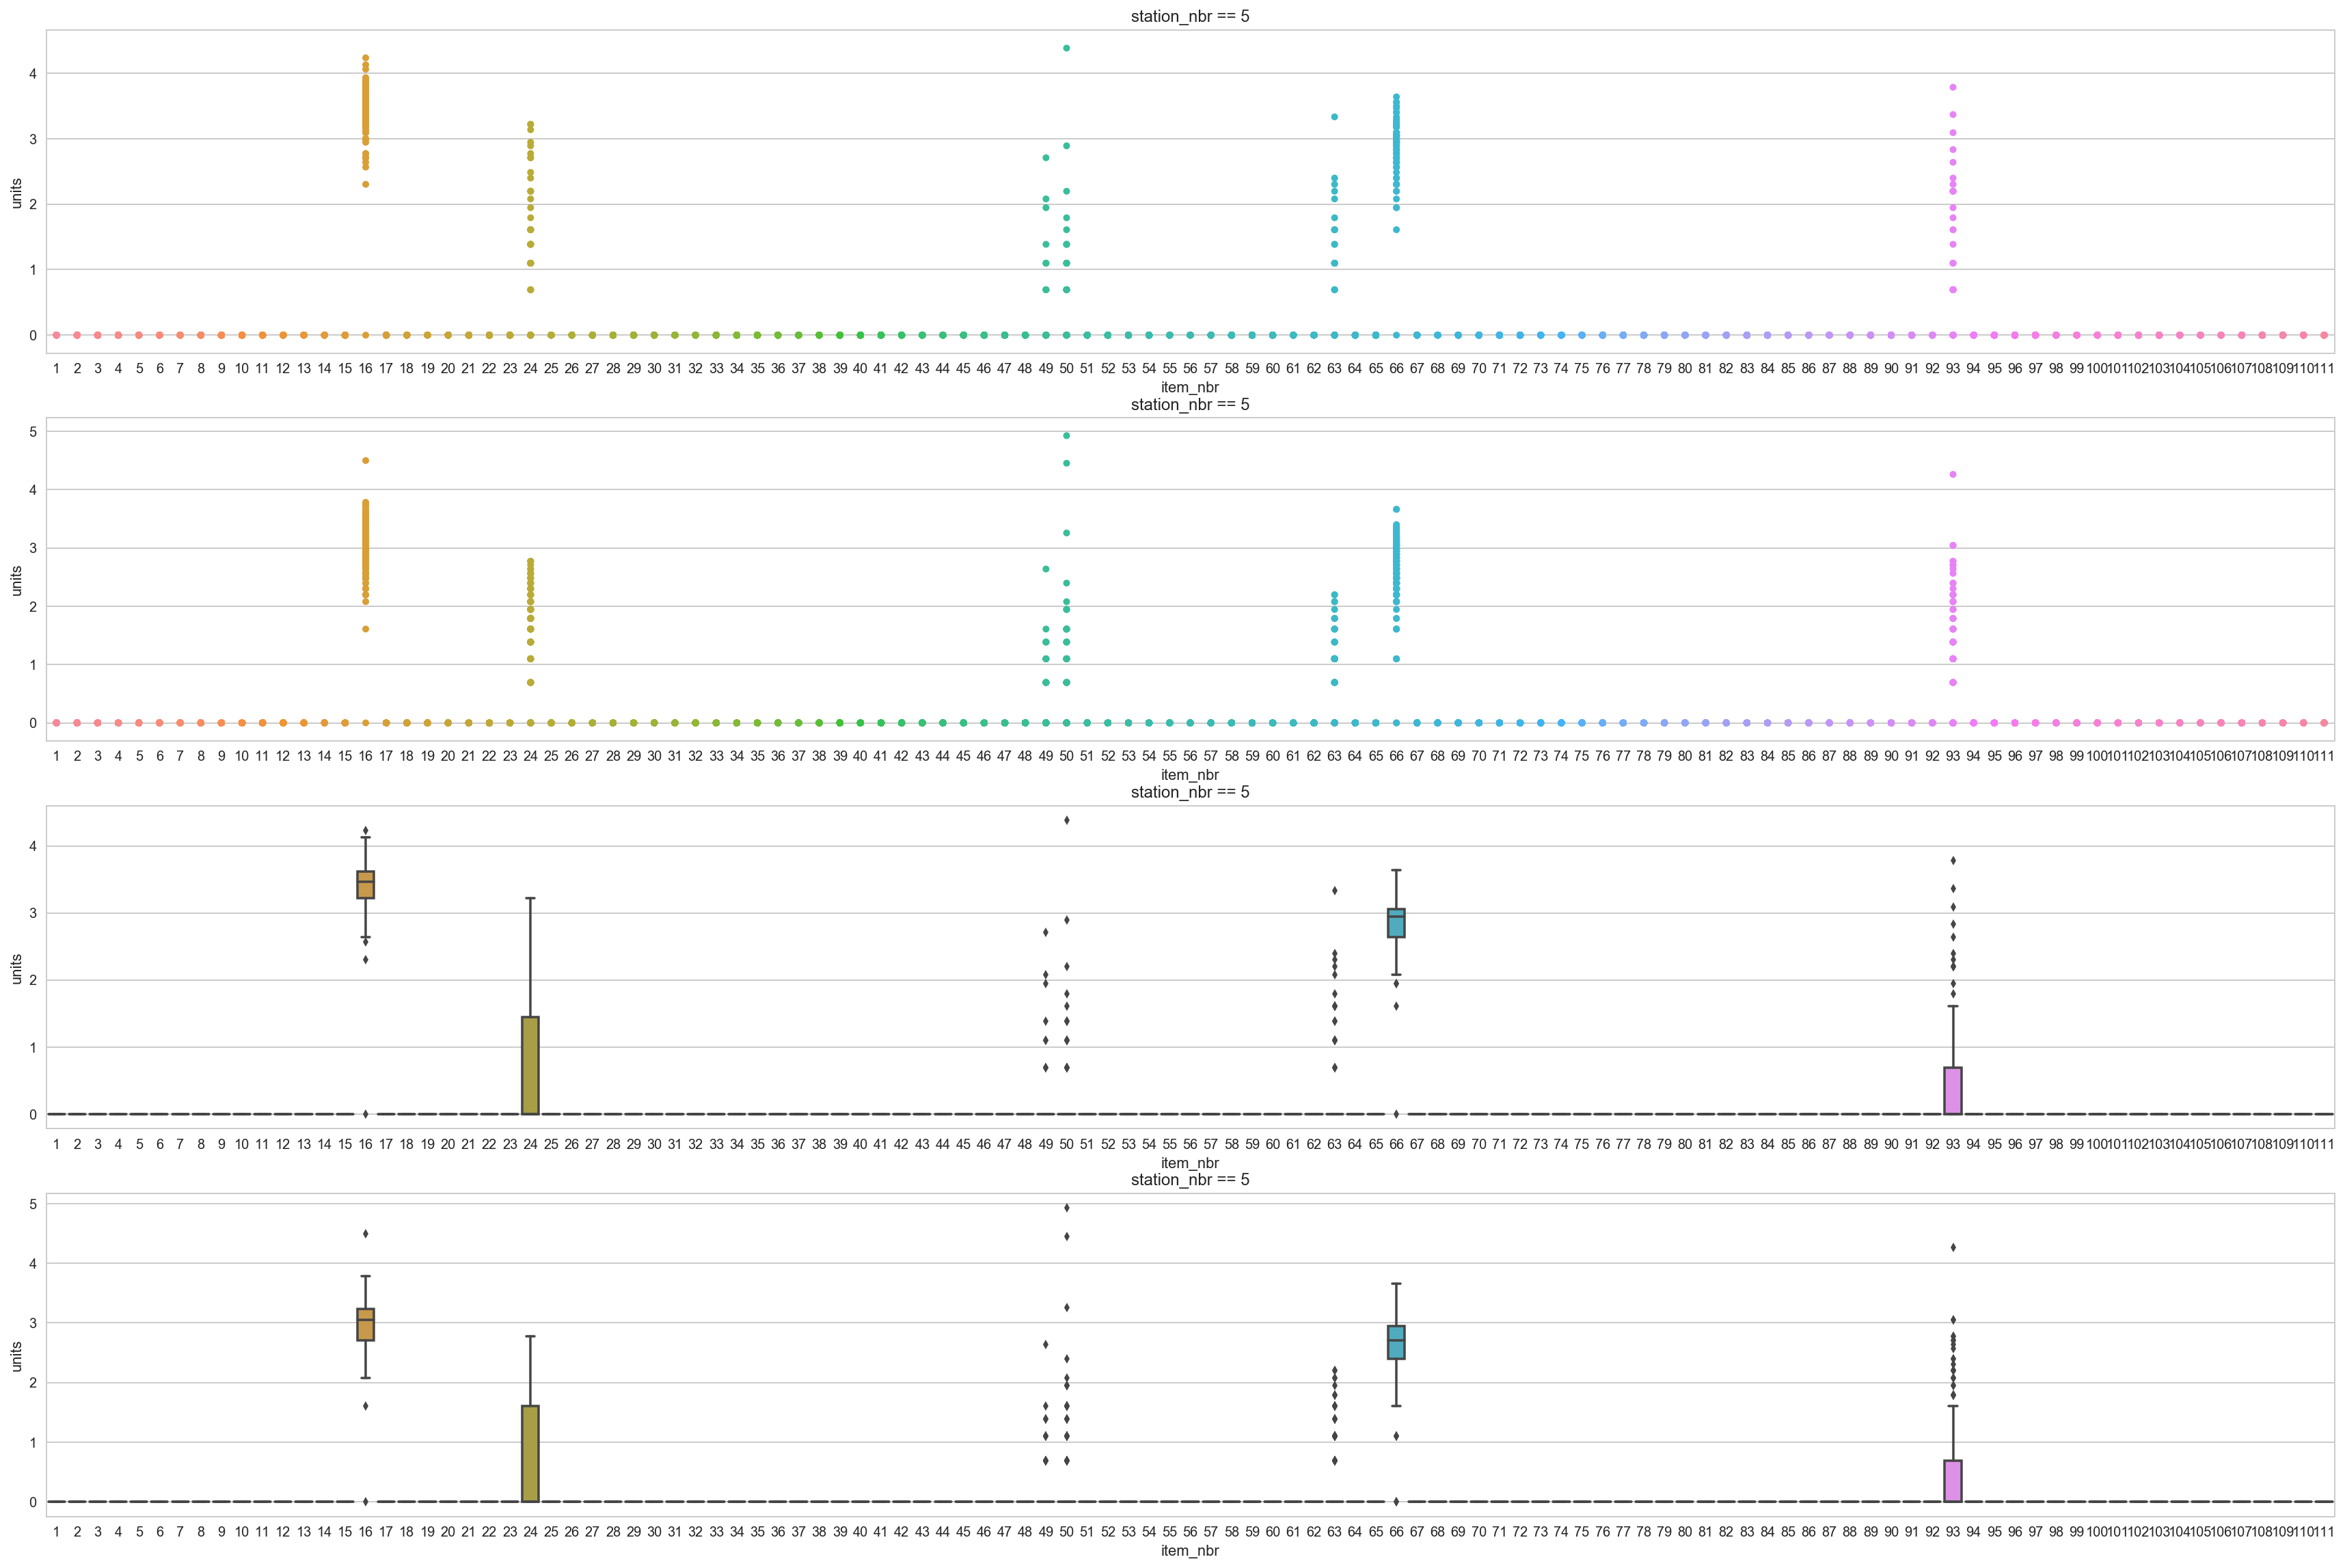

In [66]:
# station_nbr == 5
# store_nbr == 35

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store35
data2 = processed_train_weekday_store35

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 5')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 5')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 5')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 5')

plt.show()

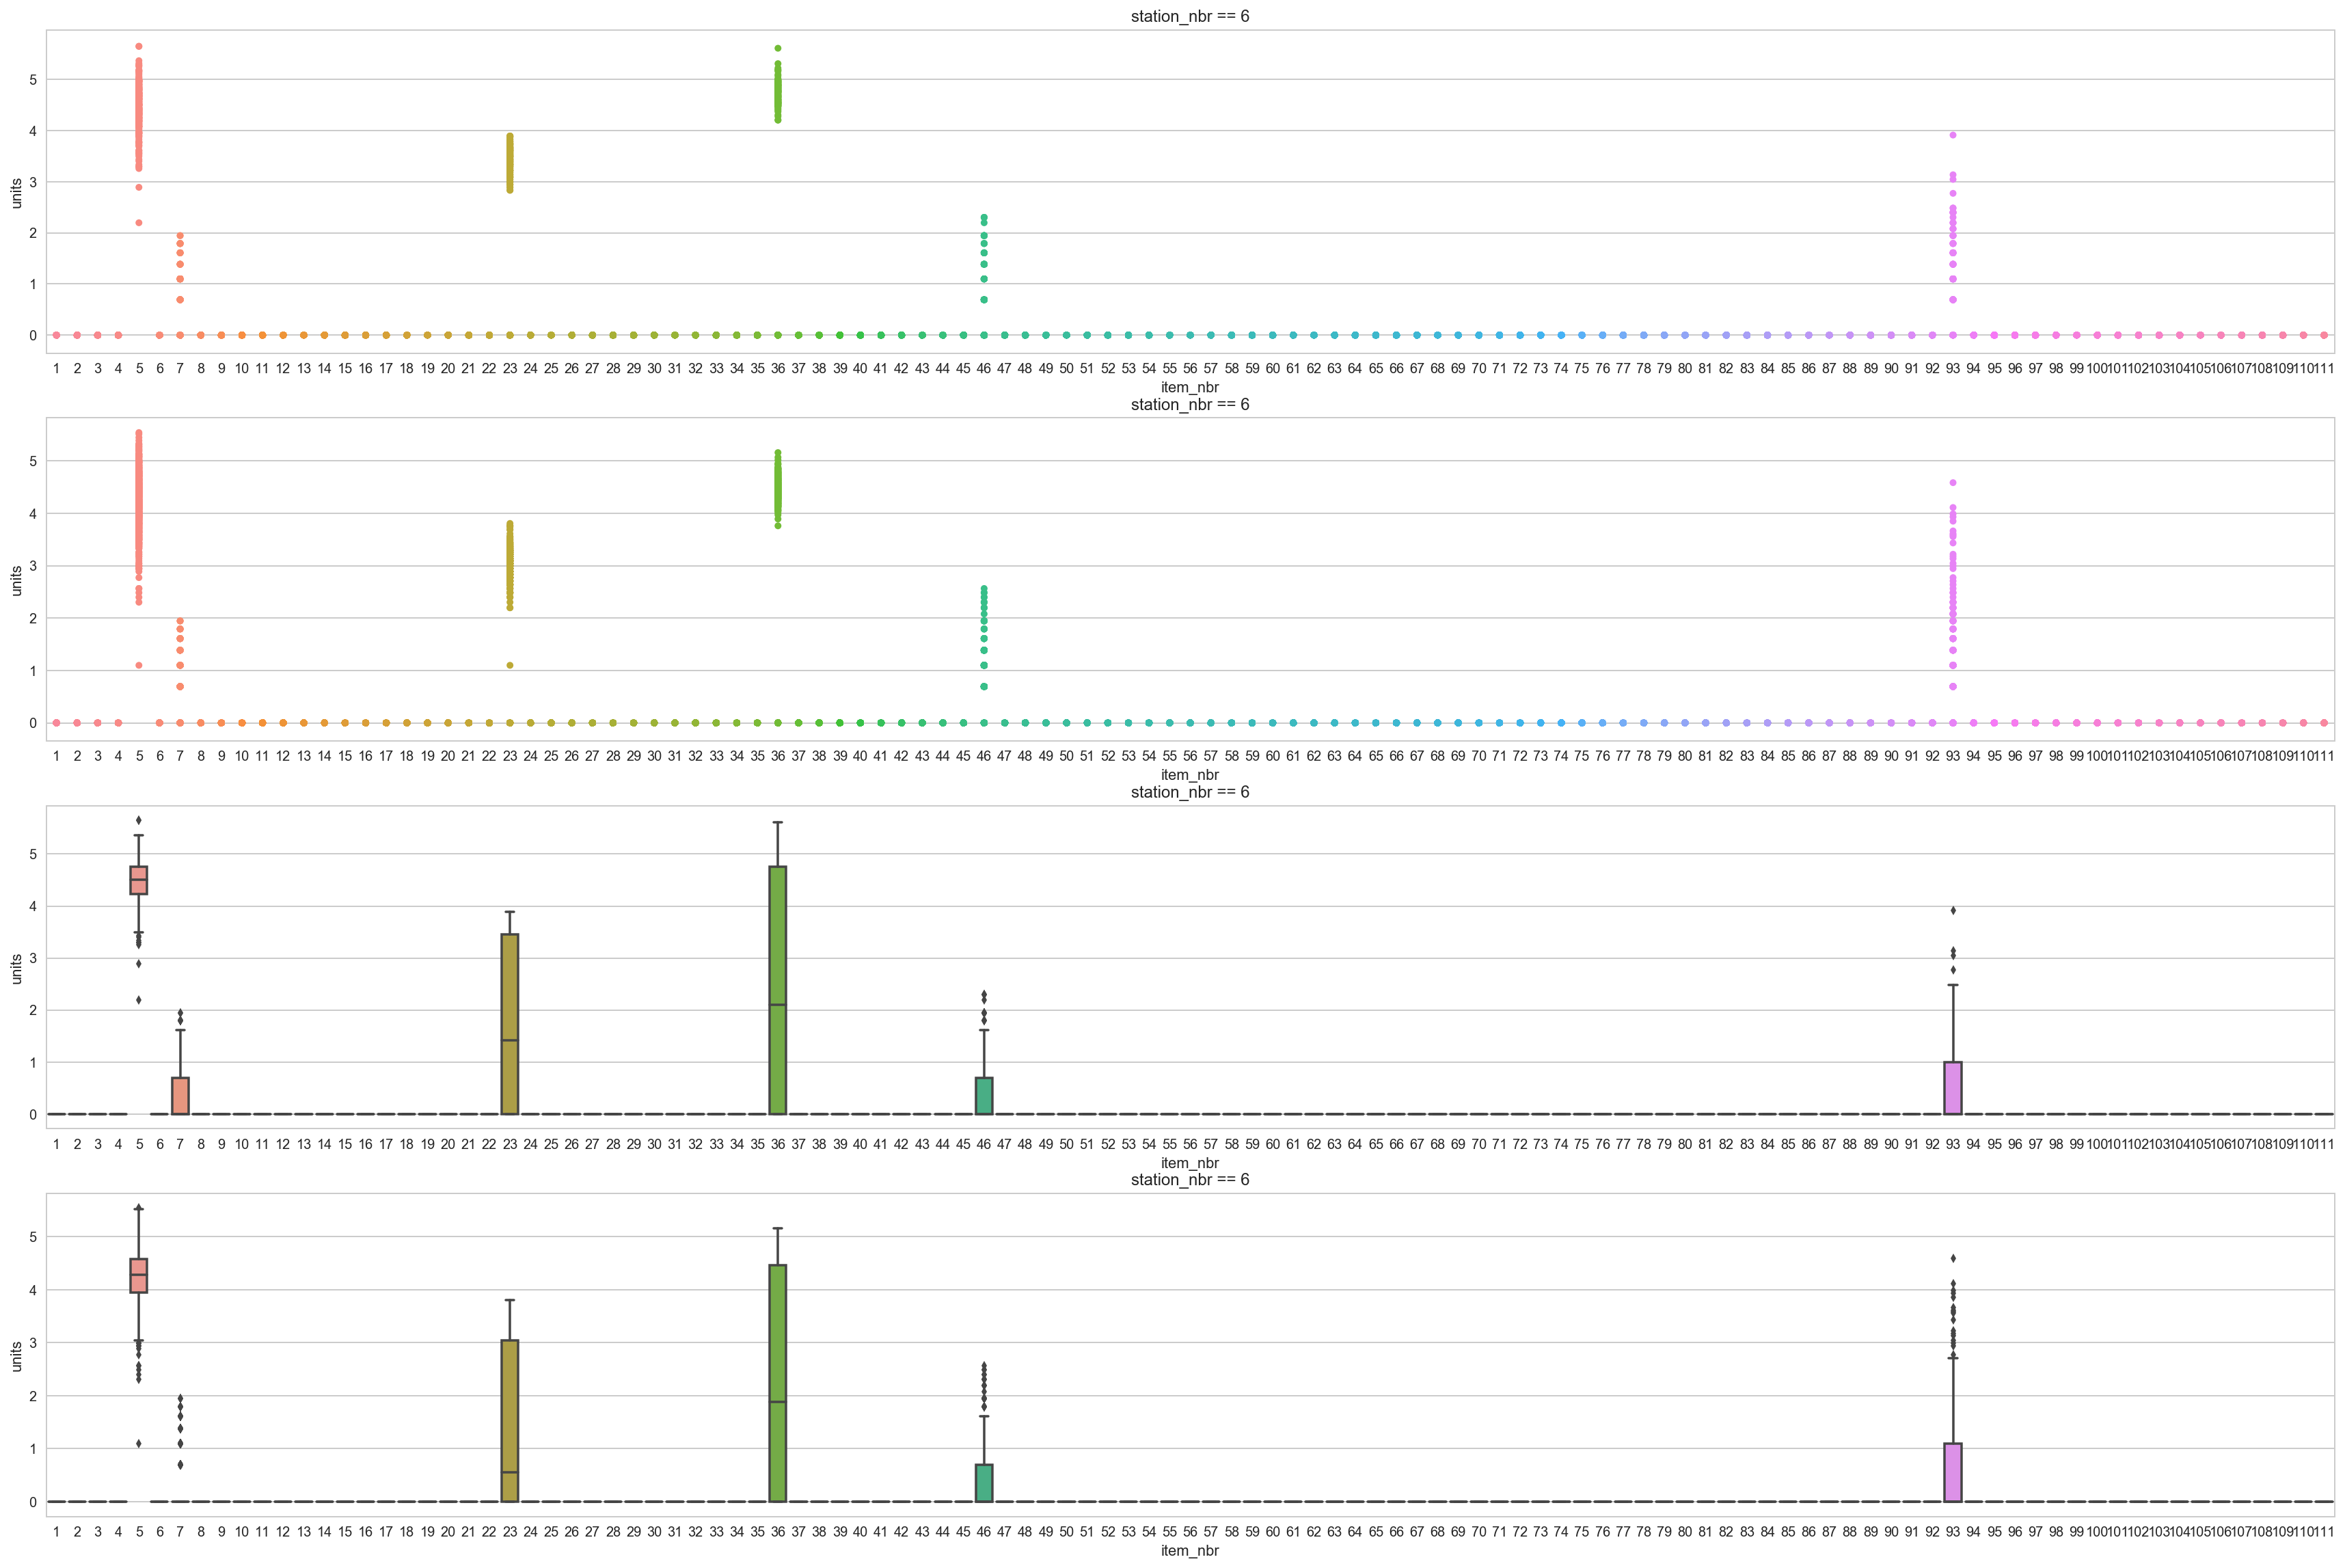

In [67]:
# station_nbr == 6
# store_nbr == 7, 13

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store7, processed_train_weekend_store13])
data2 = pd.concat([processed_train_weekday_store7, processed_train_weekday_store13])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 6')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 6')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 6')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 6')

plt.show()

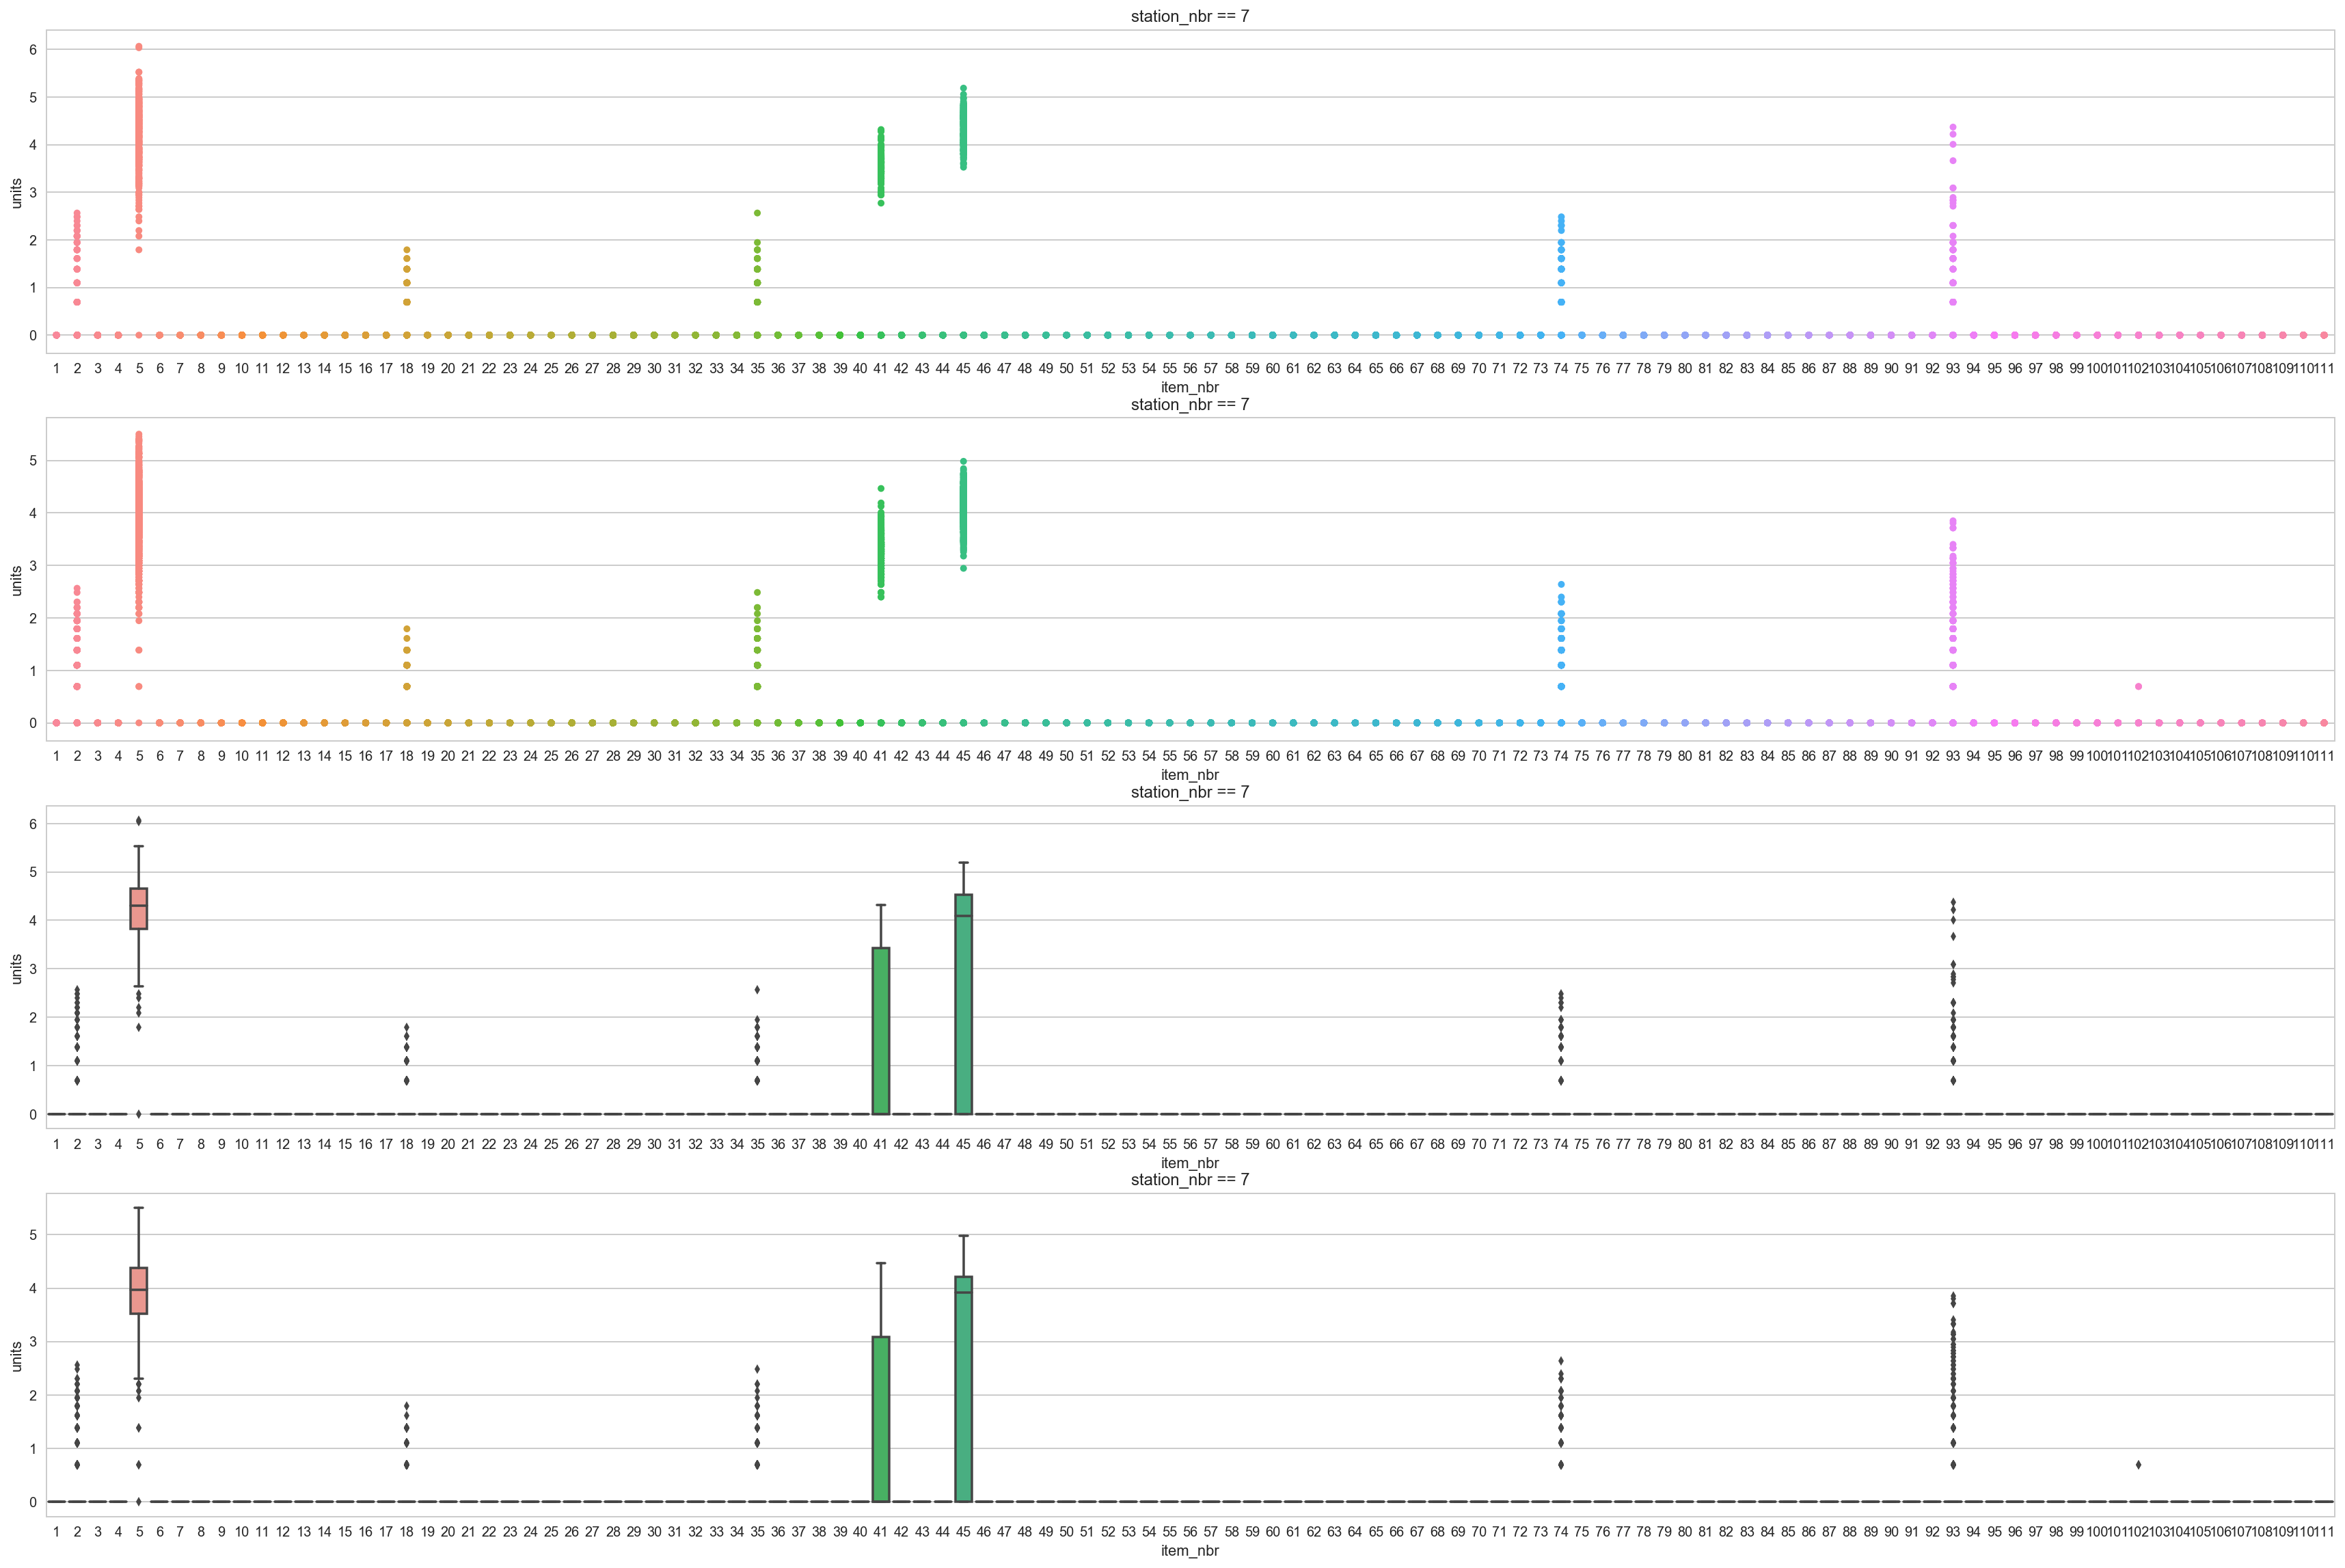

In [68]:
# station_nbr == 7
# store_nbr == 3, 20, 28

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store3, processed_train_weekend_store20, processed_train_weekend_store28])
data2 = pd.concat([processed_train_weekday_store3, processed_train_weekday_store20, processed_train_weekday_store28])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 7')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 7')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 7')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 7')

plt.show()

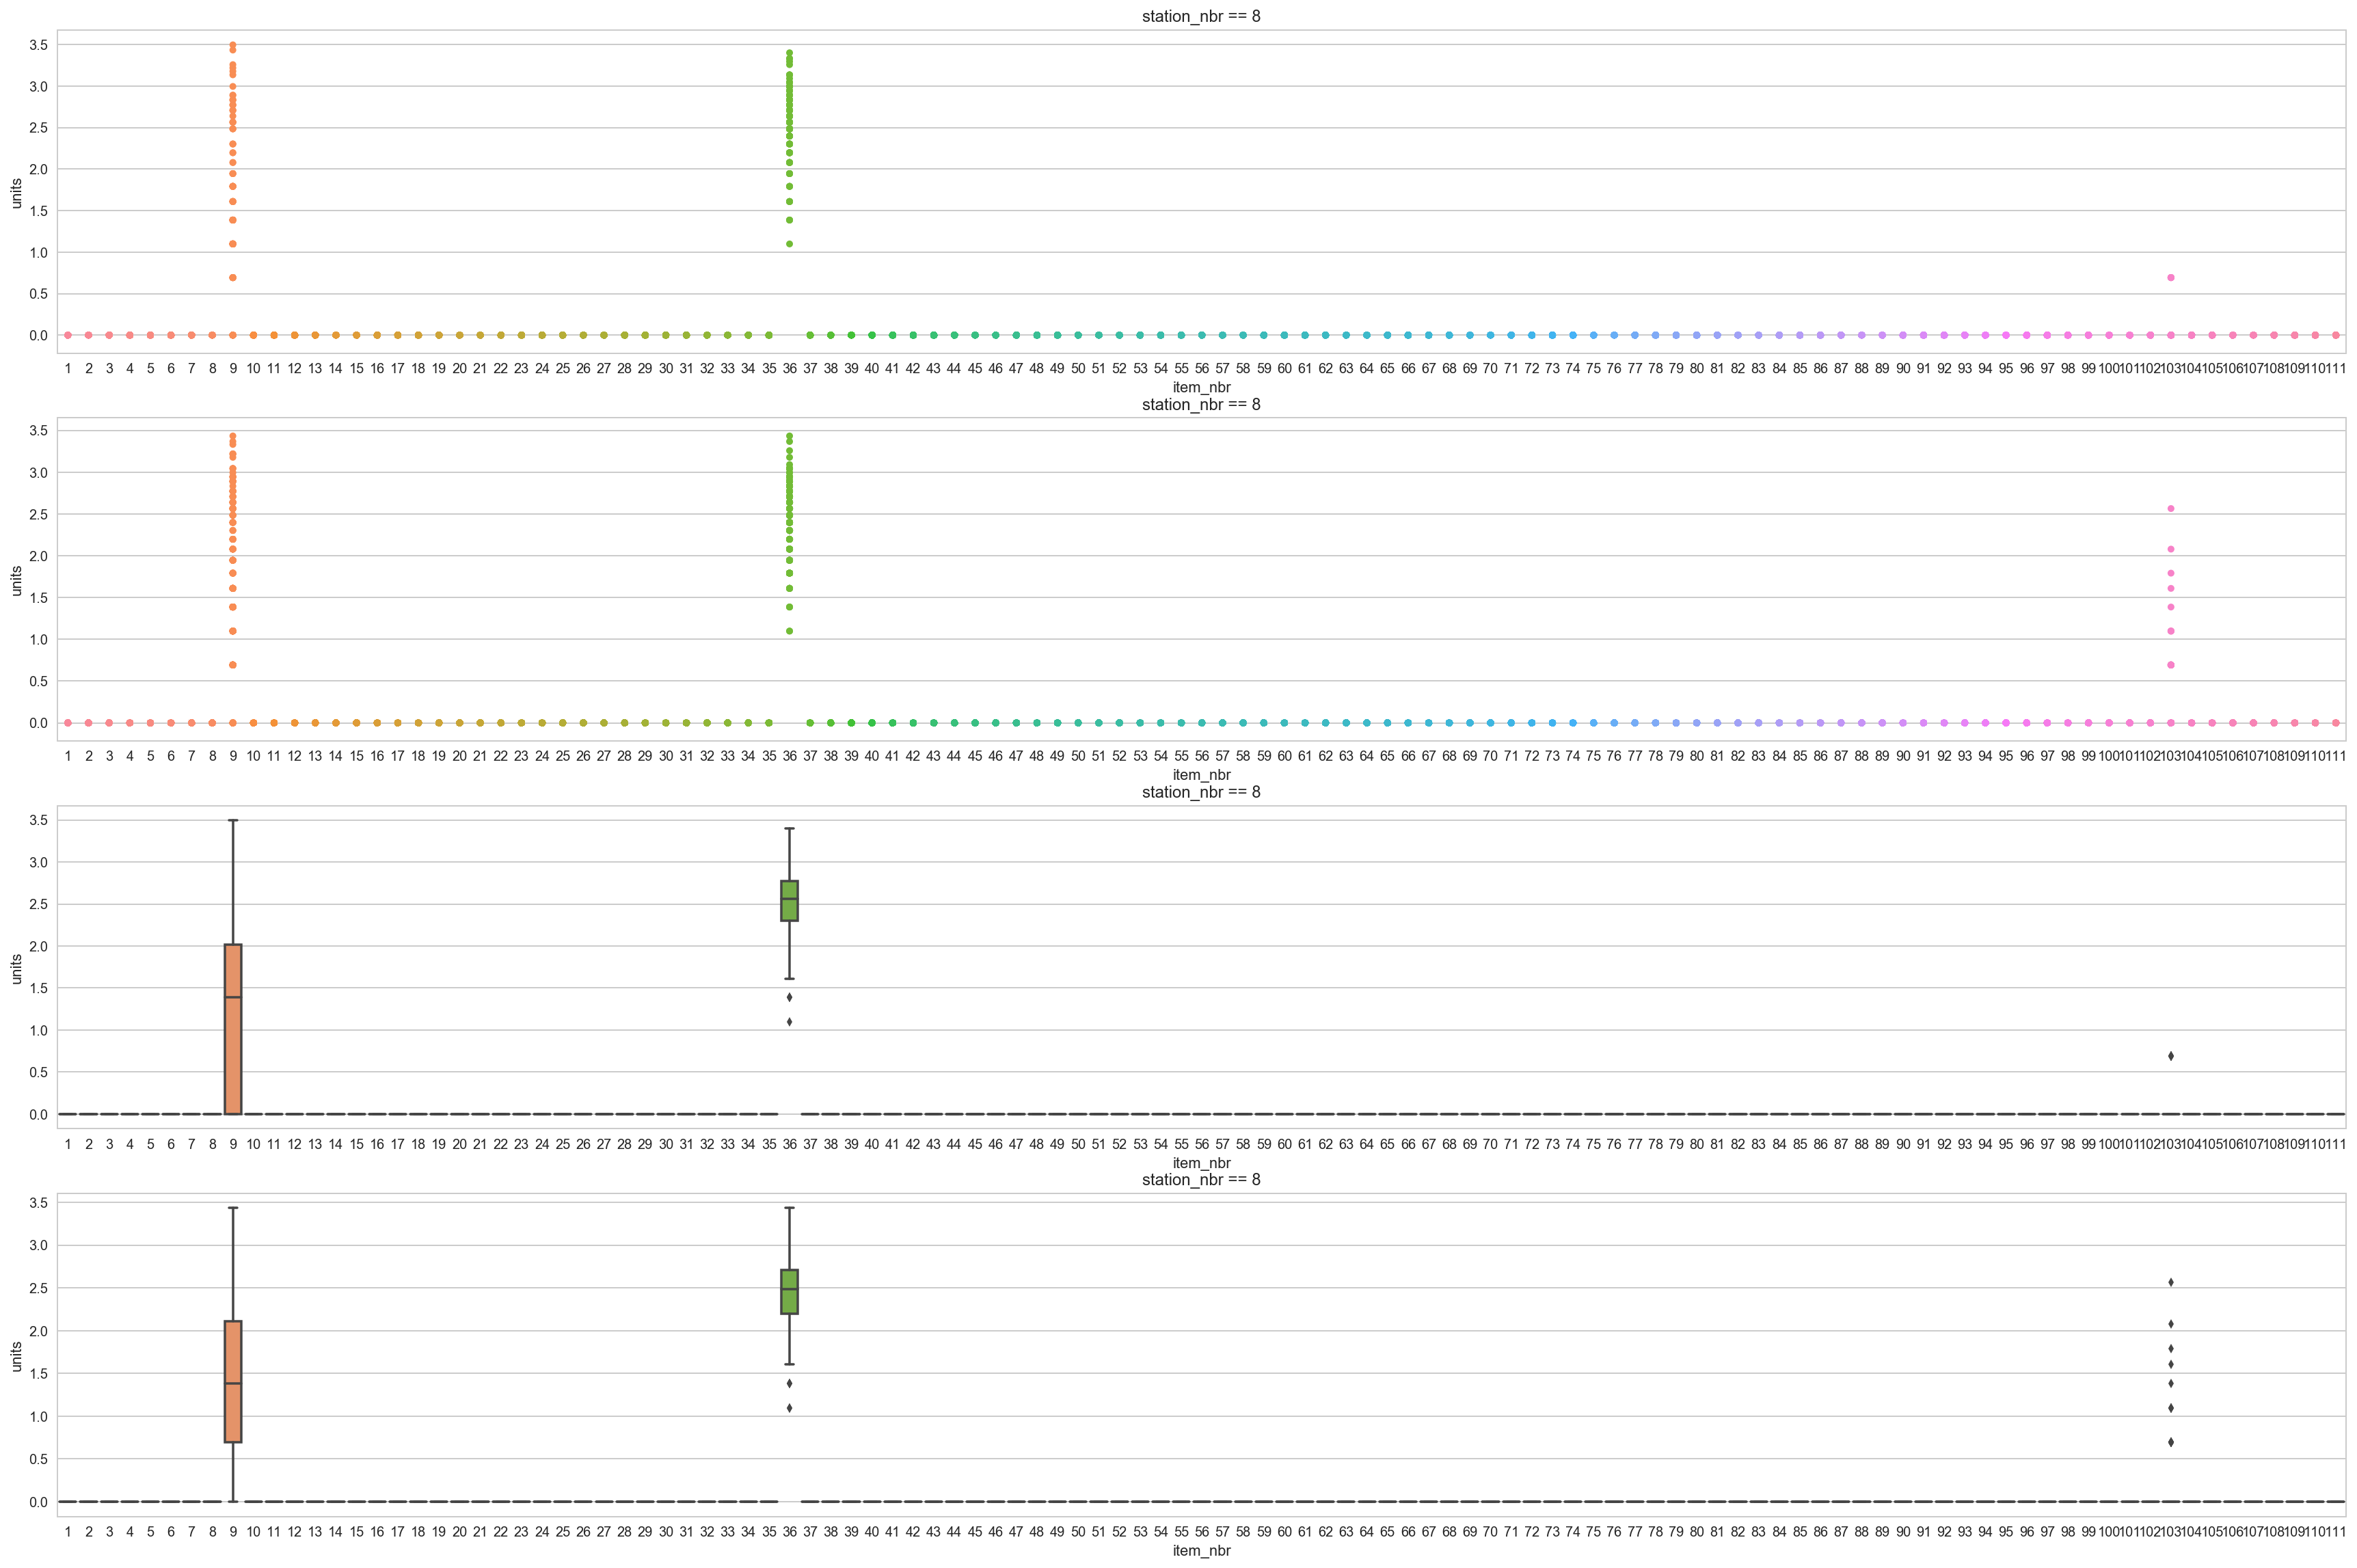

In [69]:
# station_nbr == 8
# store_nbr == 39

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store39
data2 = processed_train_weekday_store39

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 8')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 8')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 8')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 8')

plt.show()

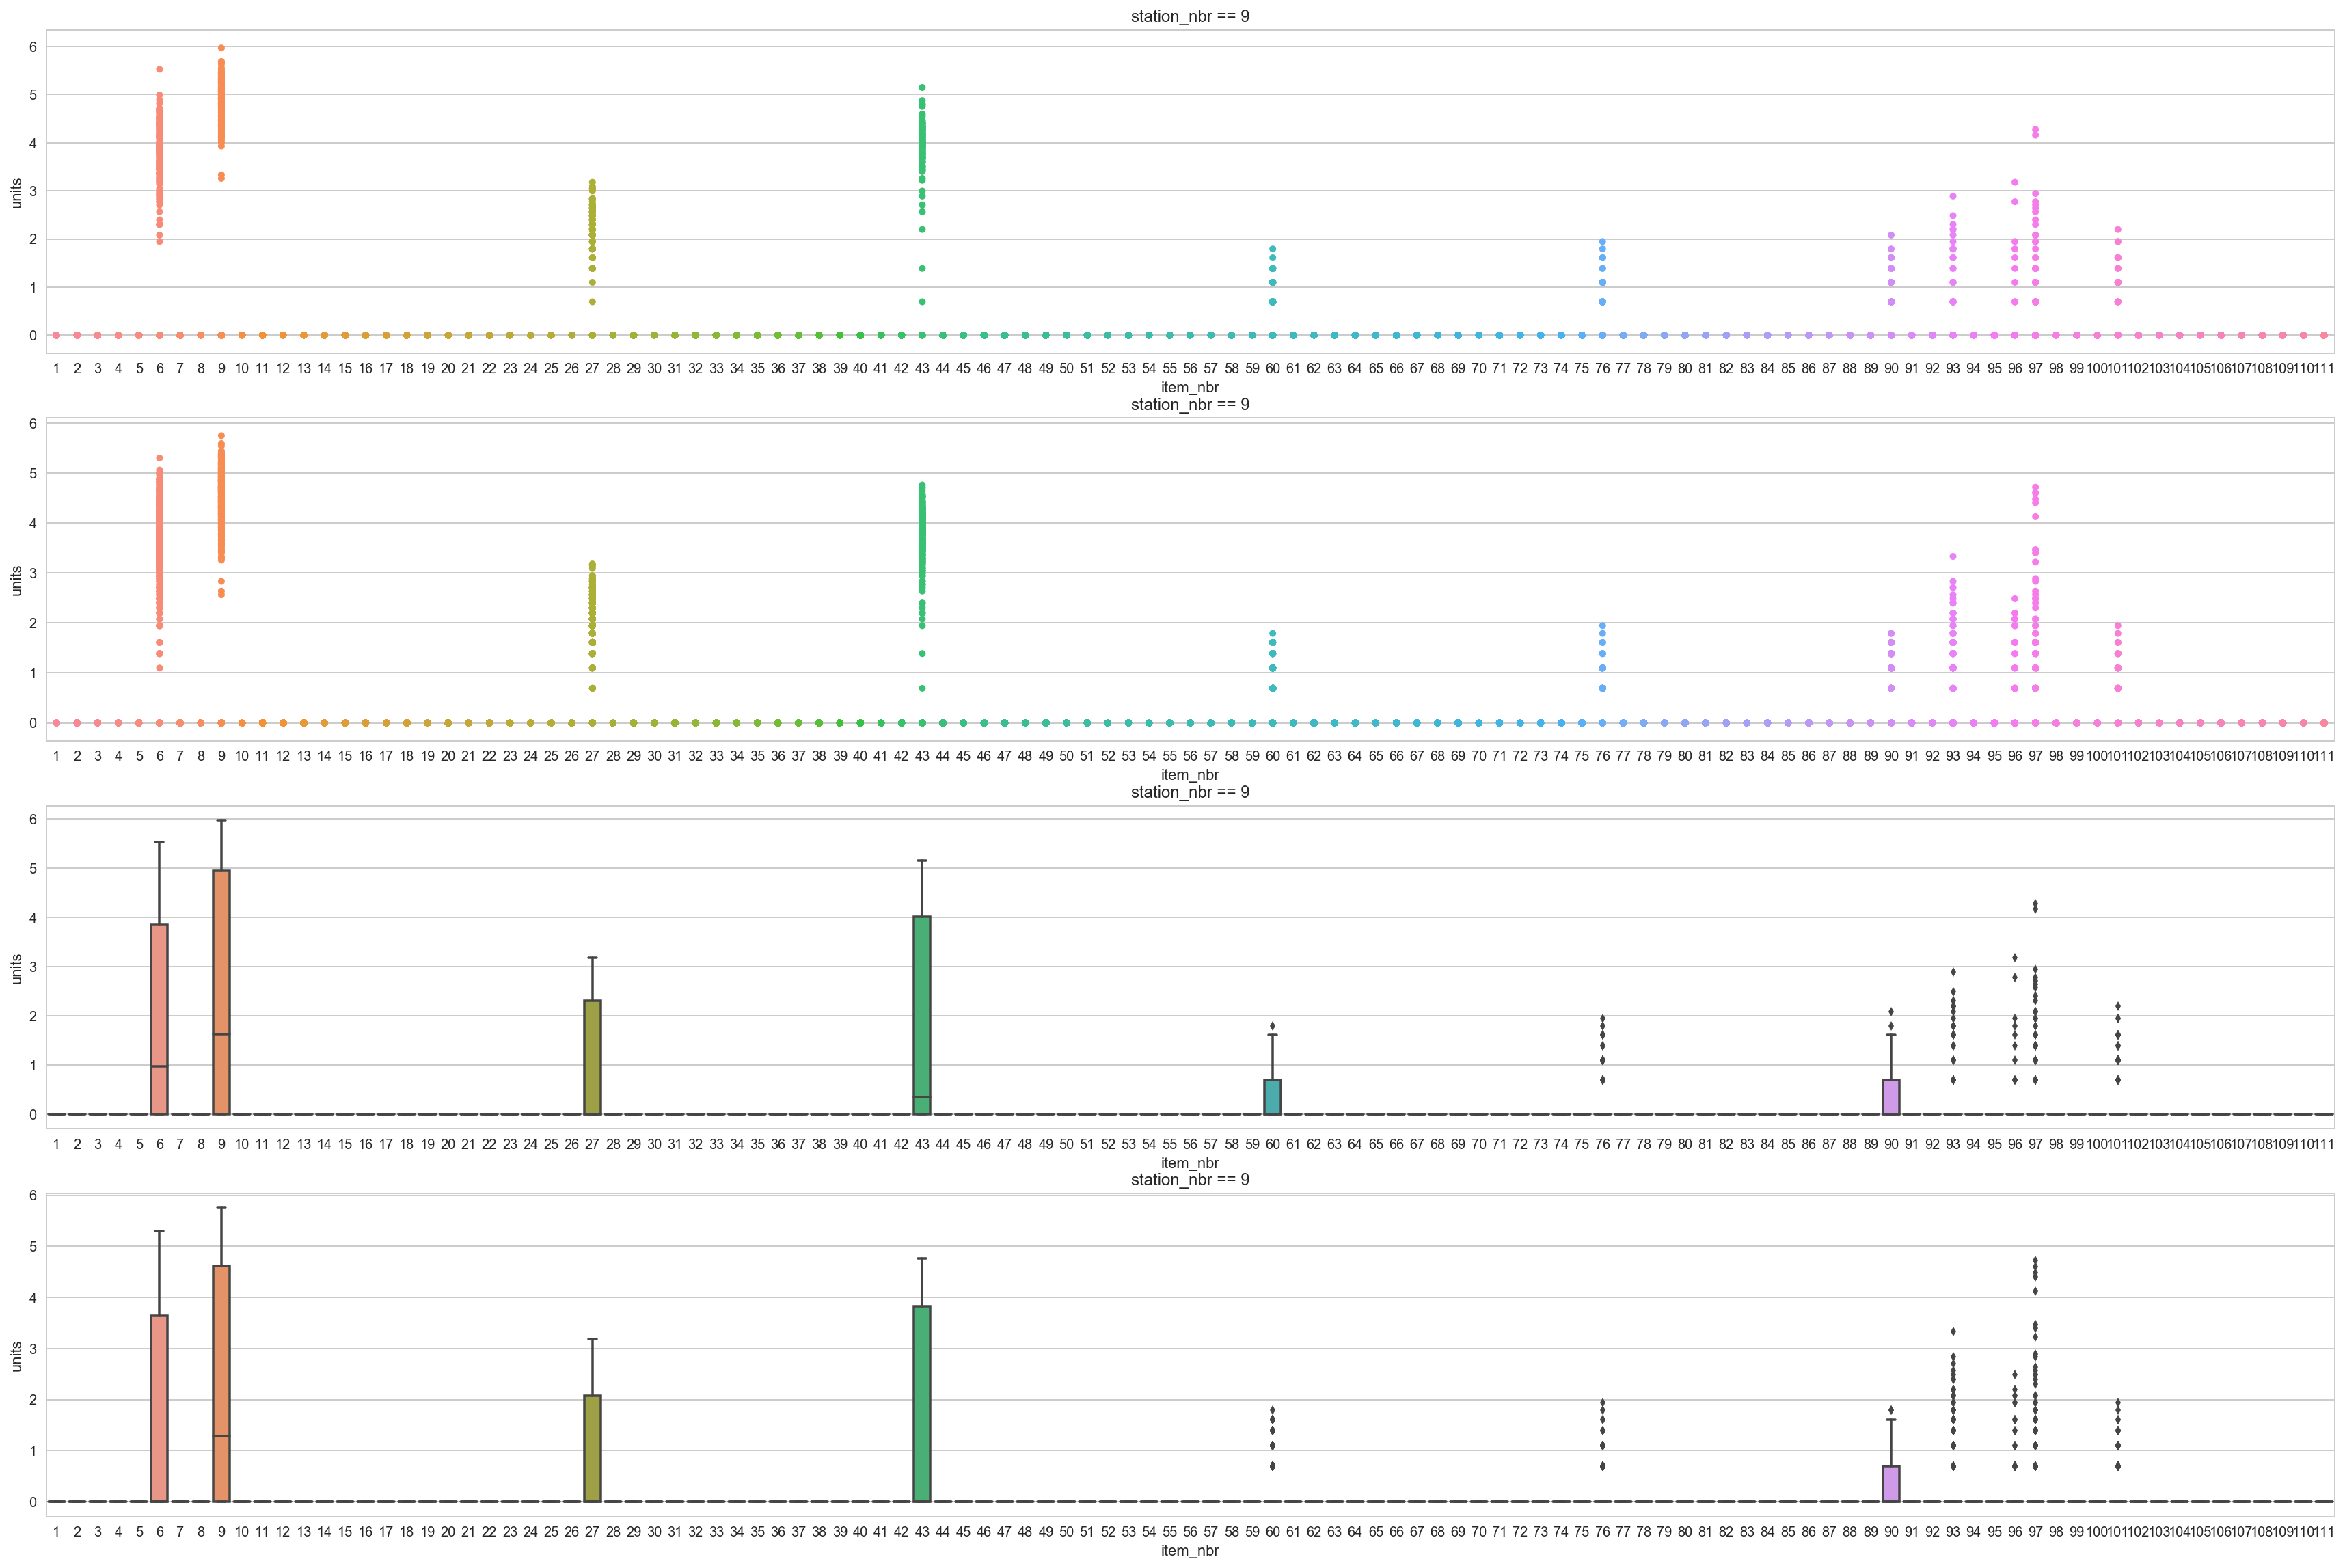

In [70]:
# station_nbr == 9
# store_nbr == 4, 24

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store4, processed_train_weekend_store24])
data2 = pd.concat([processed_train_weekday_store4, processed_train_weekday_store24])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 9')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 9')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 9')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 9')

plt.show()

NameError: name 'temp1' is not defined

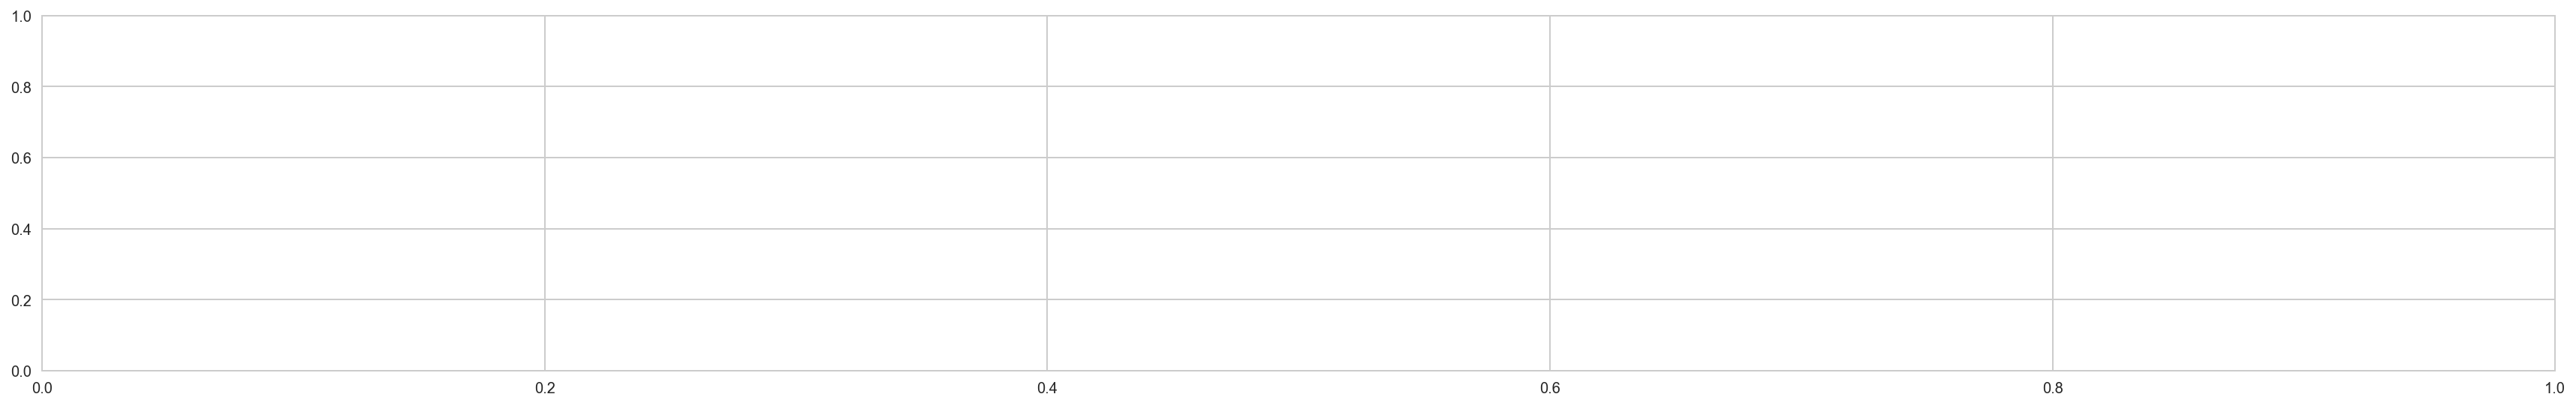

In [71]:
# station_nbr == 10
# store_nbr == 11, 22, 27

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store11, processed_train_weekend_store22, processed_train_weekend_store27])
data2 = pd.concat([processed_train_weekday_store11, processed_train_weekday_store22, processed_train_weekday_store27])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = temp1)
plt.title('station_nbr == 10')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = temp2)
plt.title('station_nbr == 10')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = temp1)
plt.title('station_nbr == 10')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = temp2)
plt.title('station_nbr == 10')

plt.show()

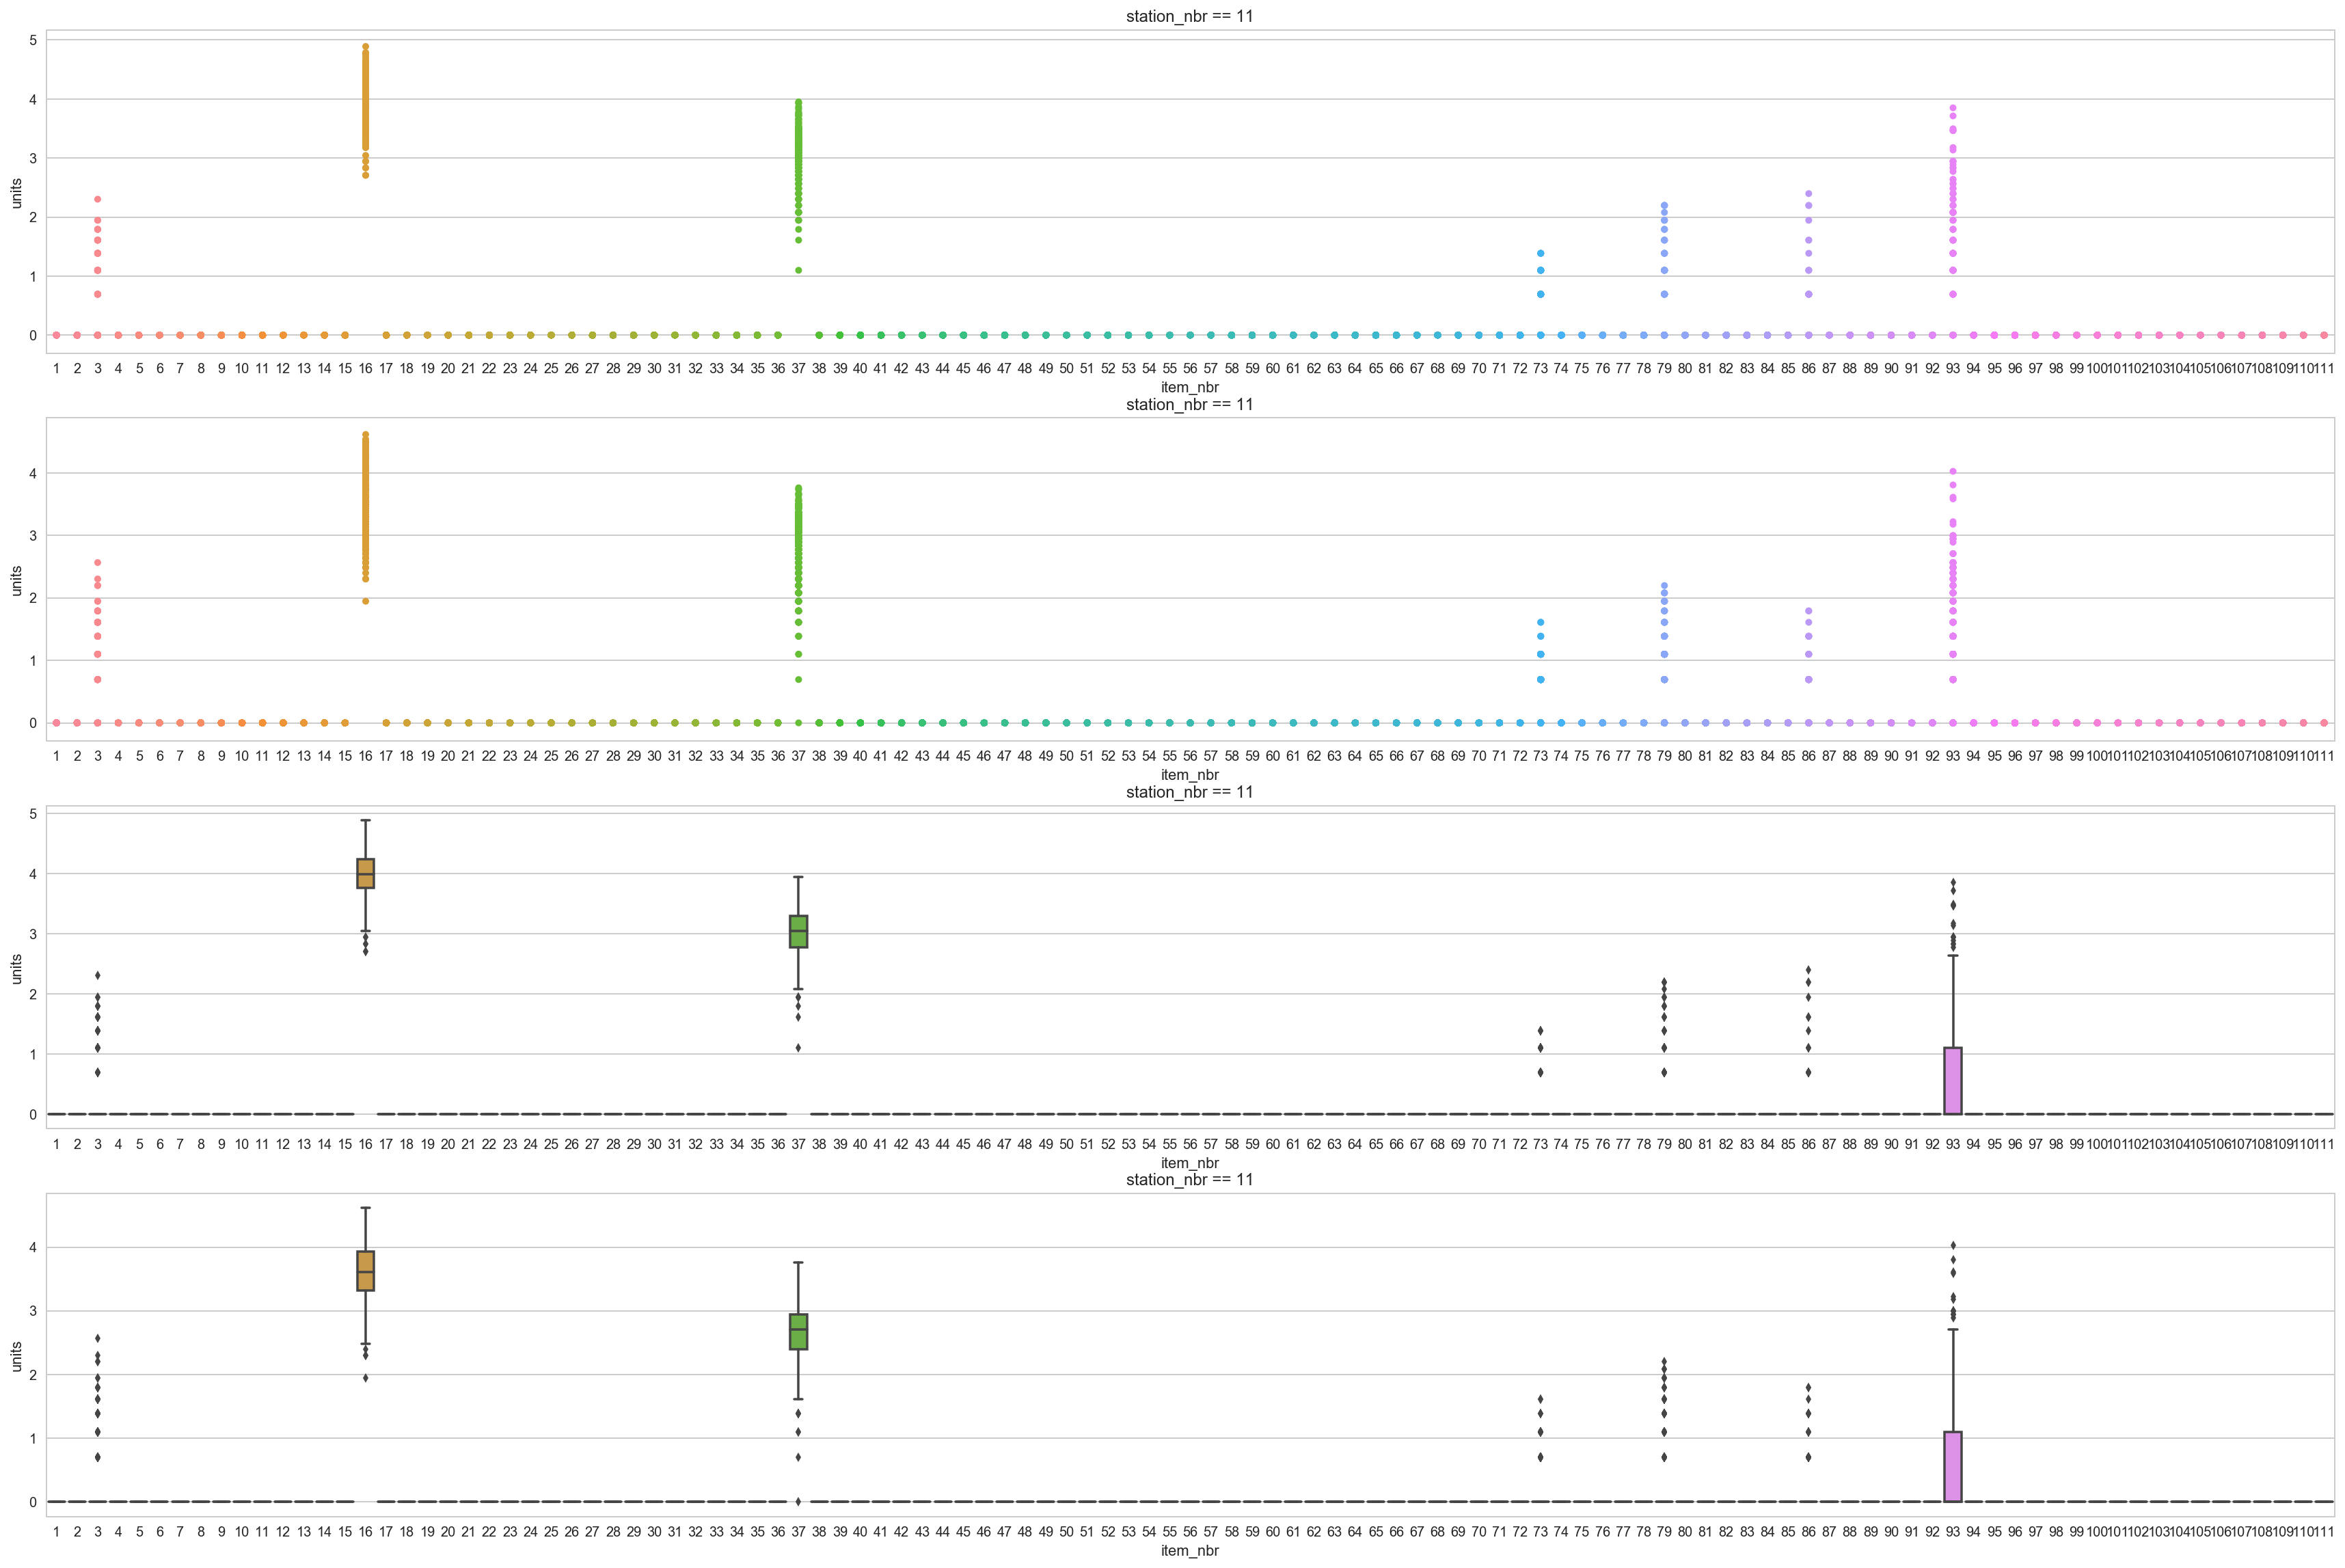

In [72]:
# station_nbr == 11
# store_nbr == 12, 43

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store12, processed_train_weekend_store43])
data2 = pd.concat([processed_train_weekday_store12, processed_train_weekday_store43])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 11')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 11')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 11')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 11')

plt.show()

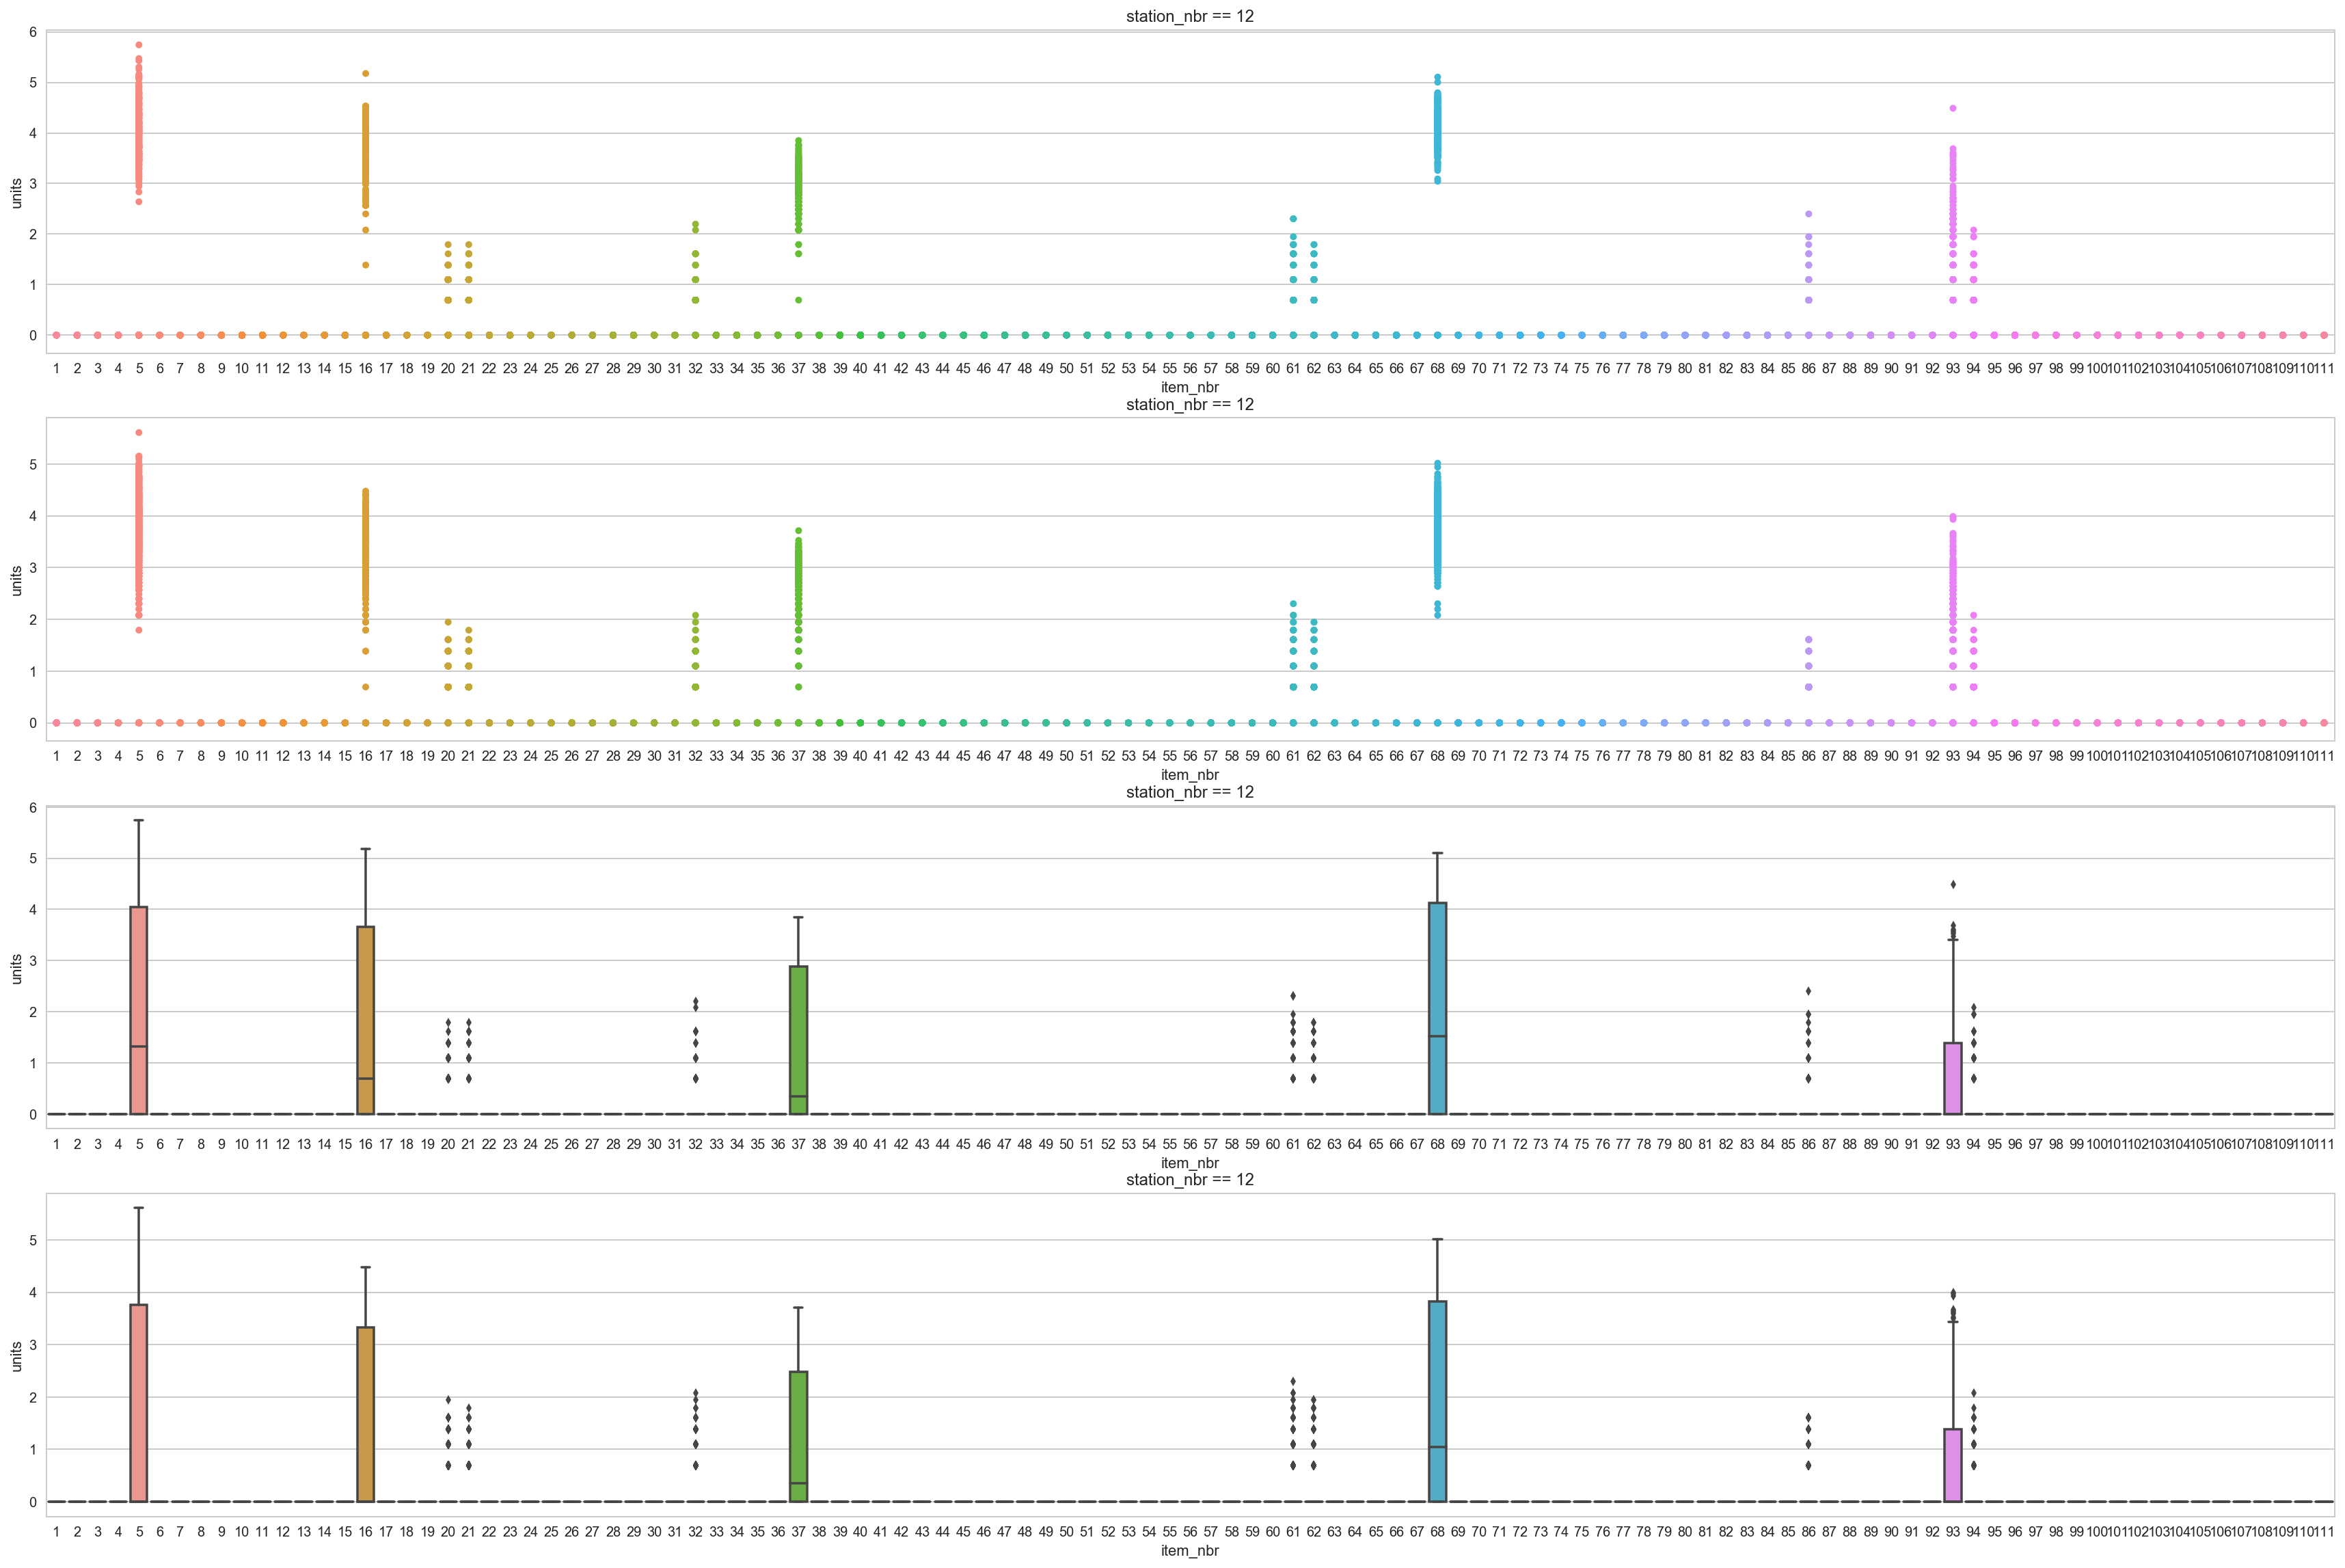

In [74]:
# station_nbr == 12
# store_nbr == 5, 10, 41, 44

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store5, processed_train_weekend_store10, processed_train_weekend_store41,
                  processed_train_weekend_store44])
data2 = pd.concat([processed_train_weekday_store5, processed_train_weekday_store10, processed_train_weekday_store41,
                  processed_train_weekday_store44])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 12')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 12')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 12')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 12')

plt.show()

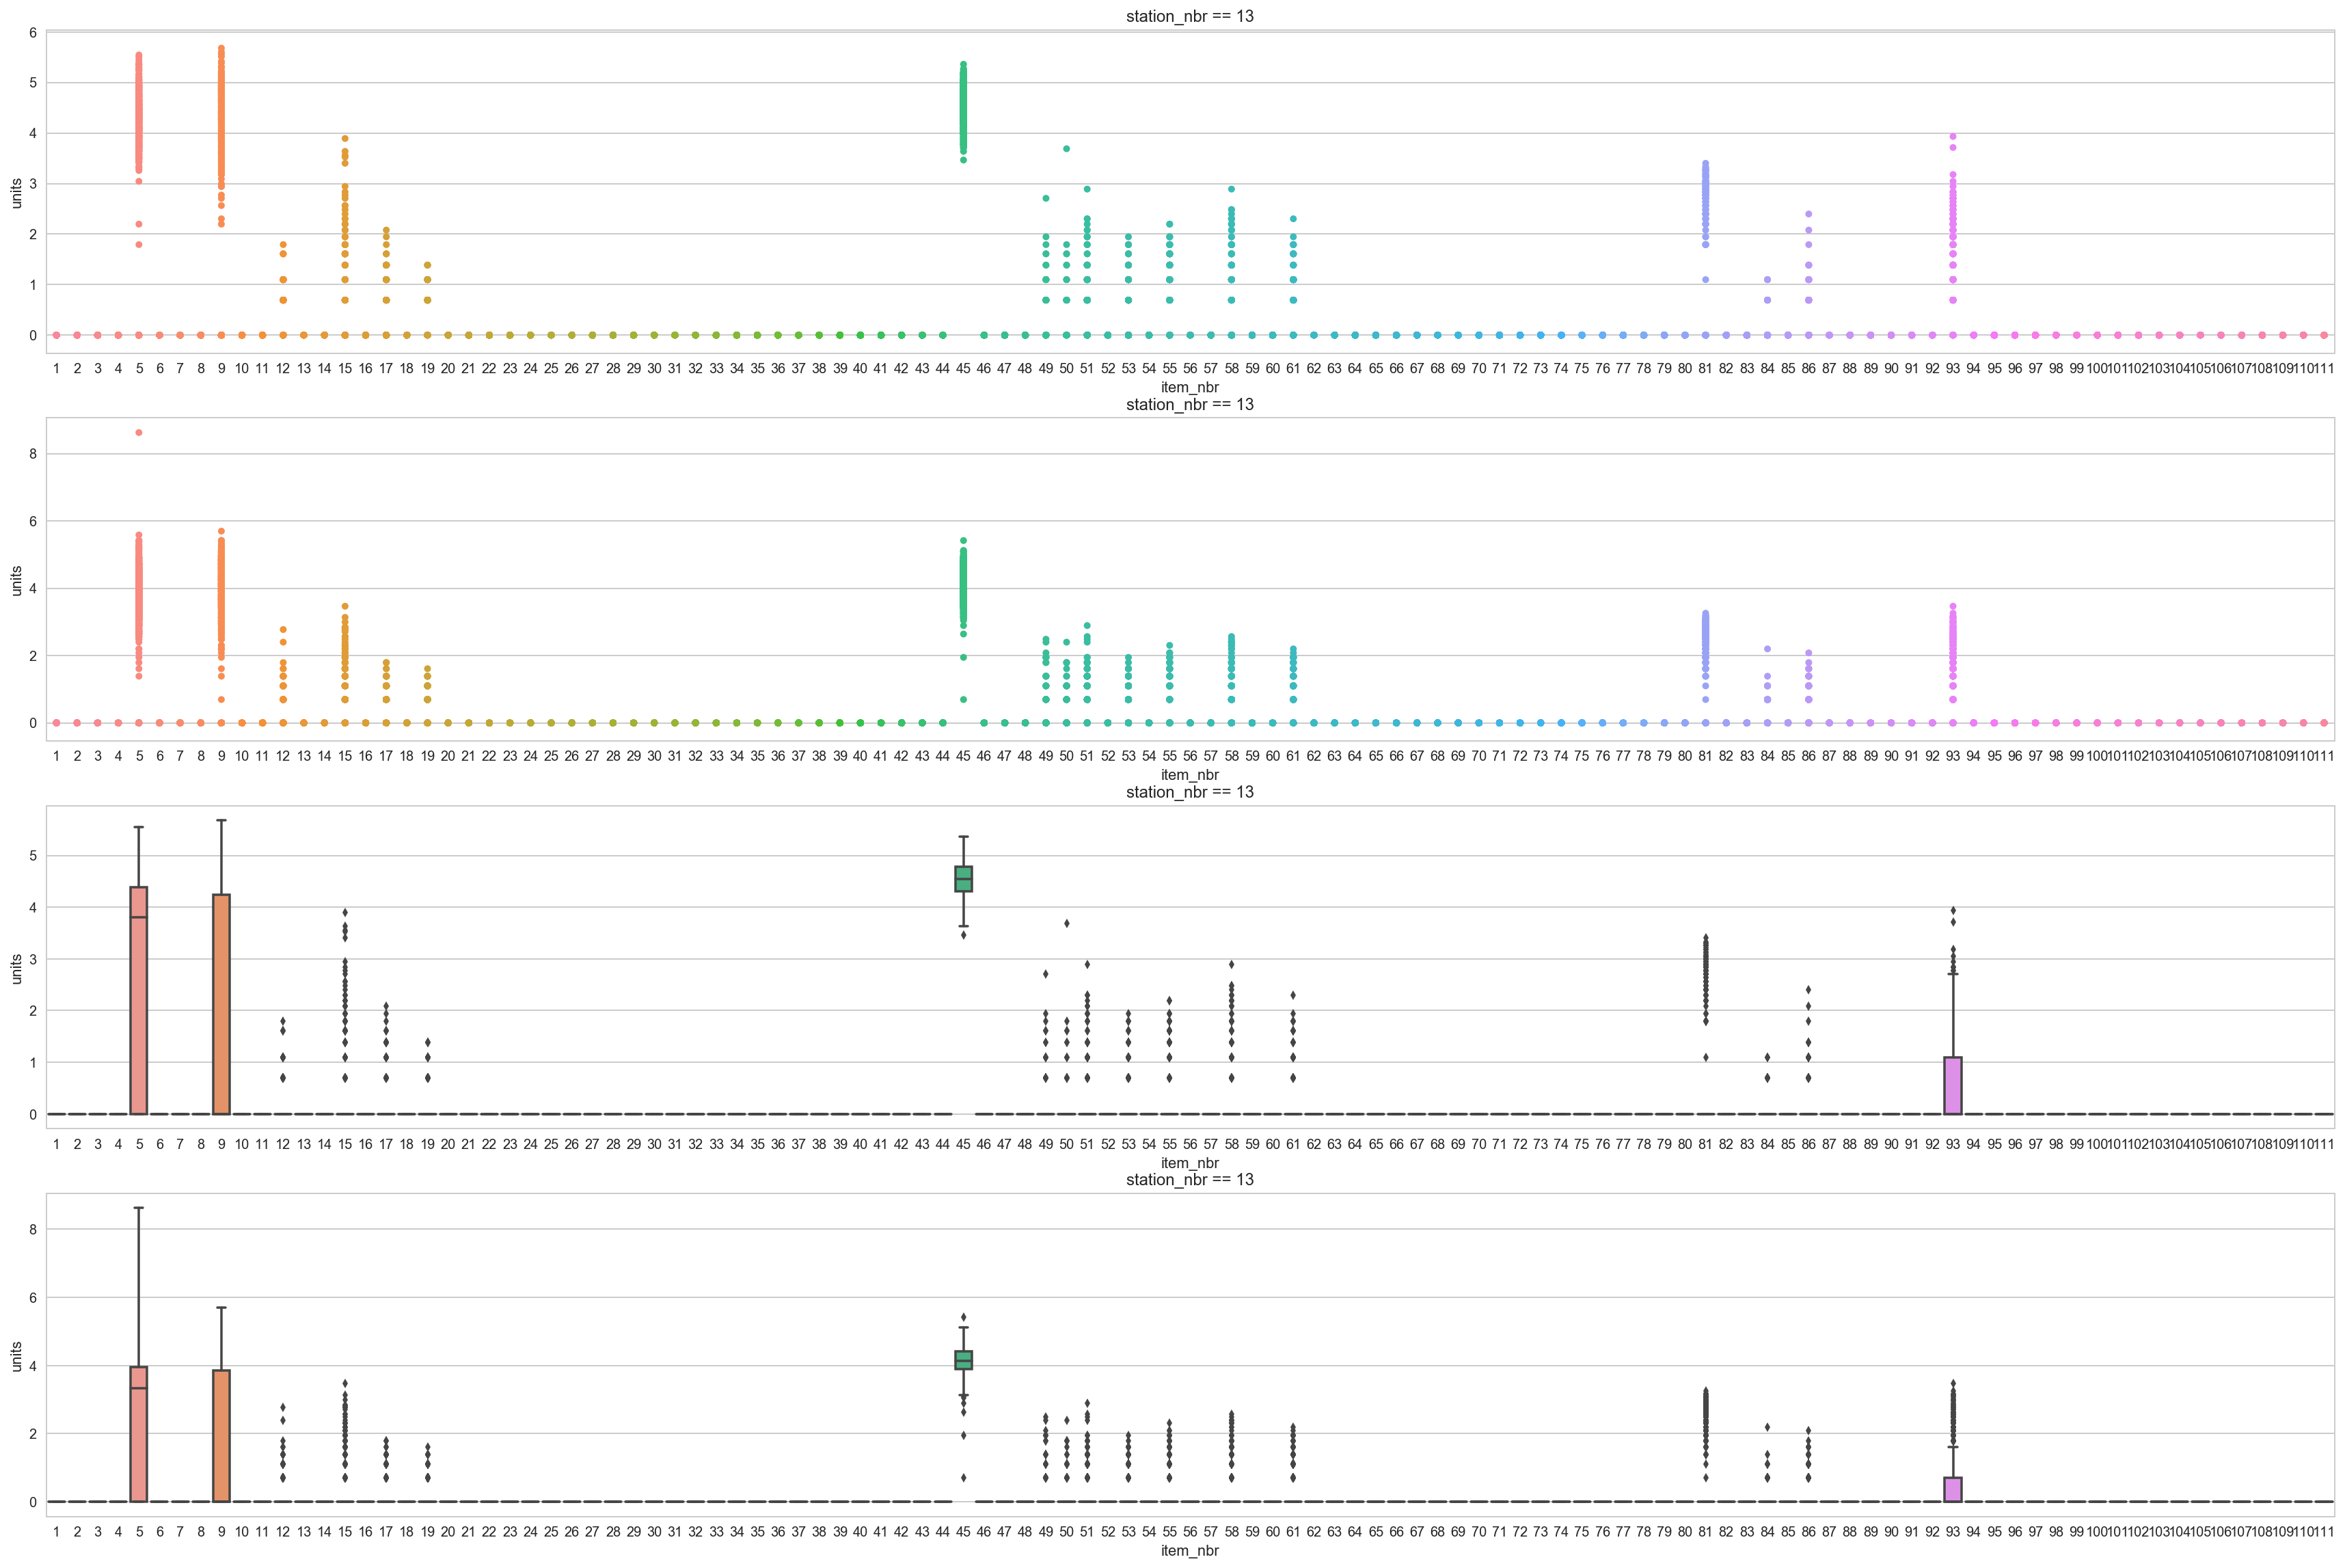

In [75]:
# station_nbr == 13
# store_nbr == 15, 25, 32, 37, 40

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store15, processed_train_weekend_store25, processed_train_weekend_store32,
                  processed_train_weekend_store37, processed_train_weekend_store40])
data2 = pd.concat([processed_train_weekday_store15, processed_train_weekday_store25, processed_train_weekday_store32,
                  processed_train_weekday_store37, processed_train_weekday_store40])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 13')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 13')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 13')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 13')

plt.show()

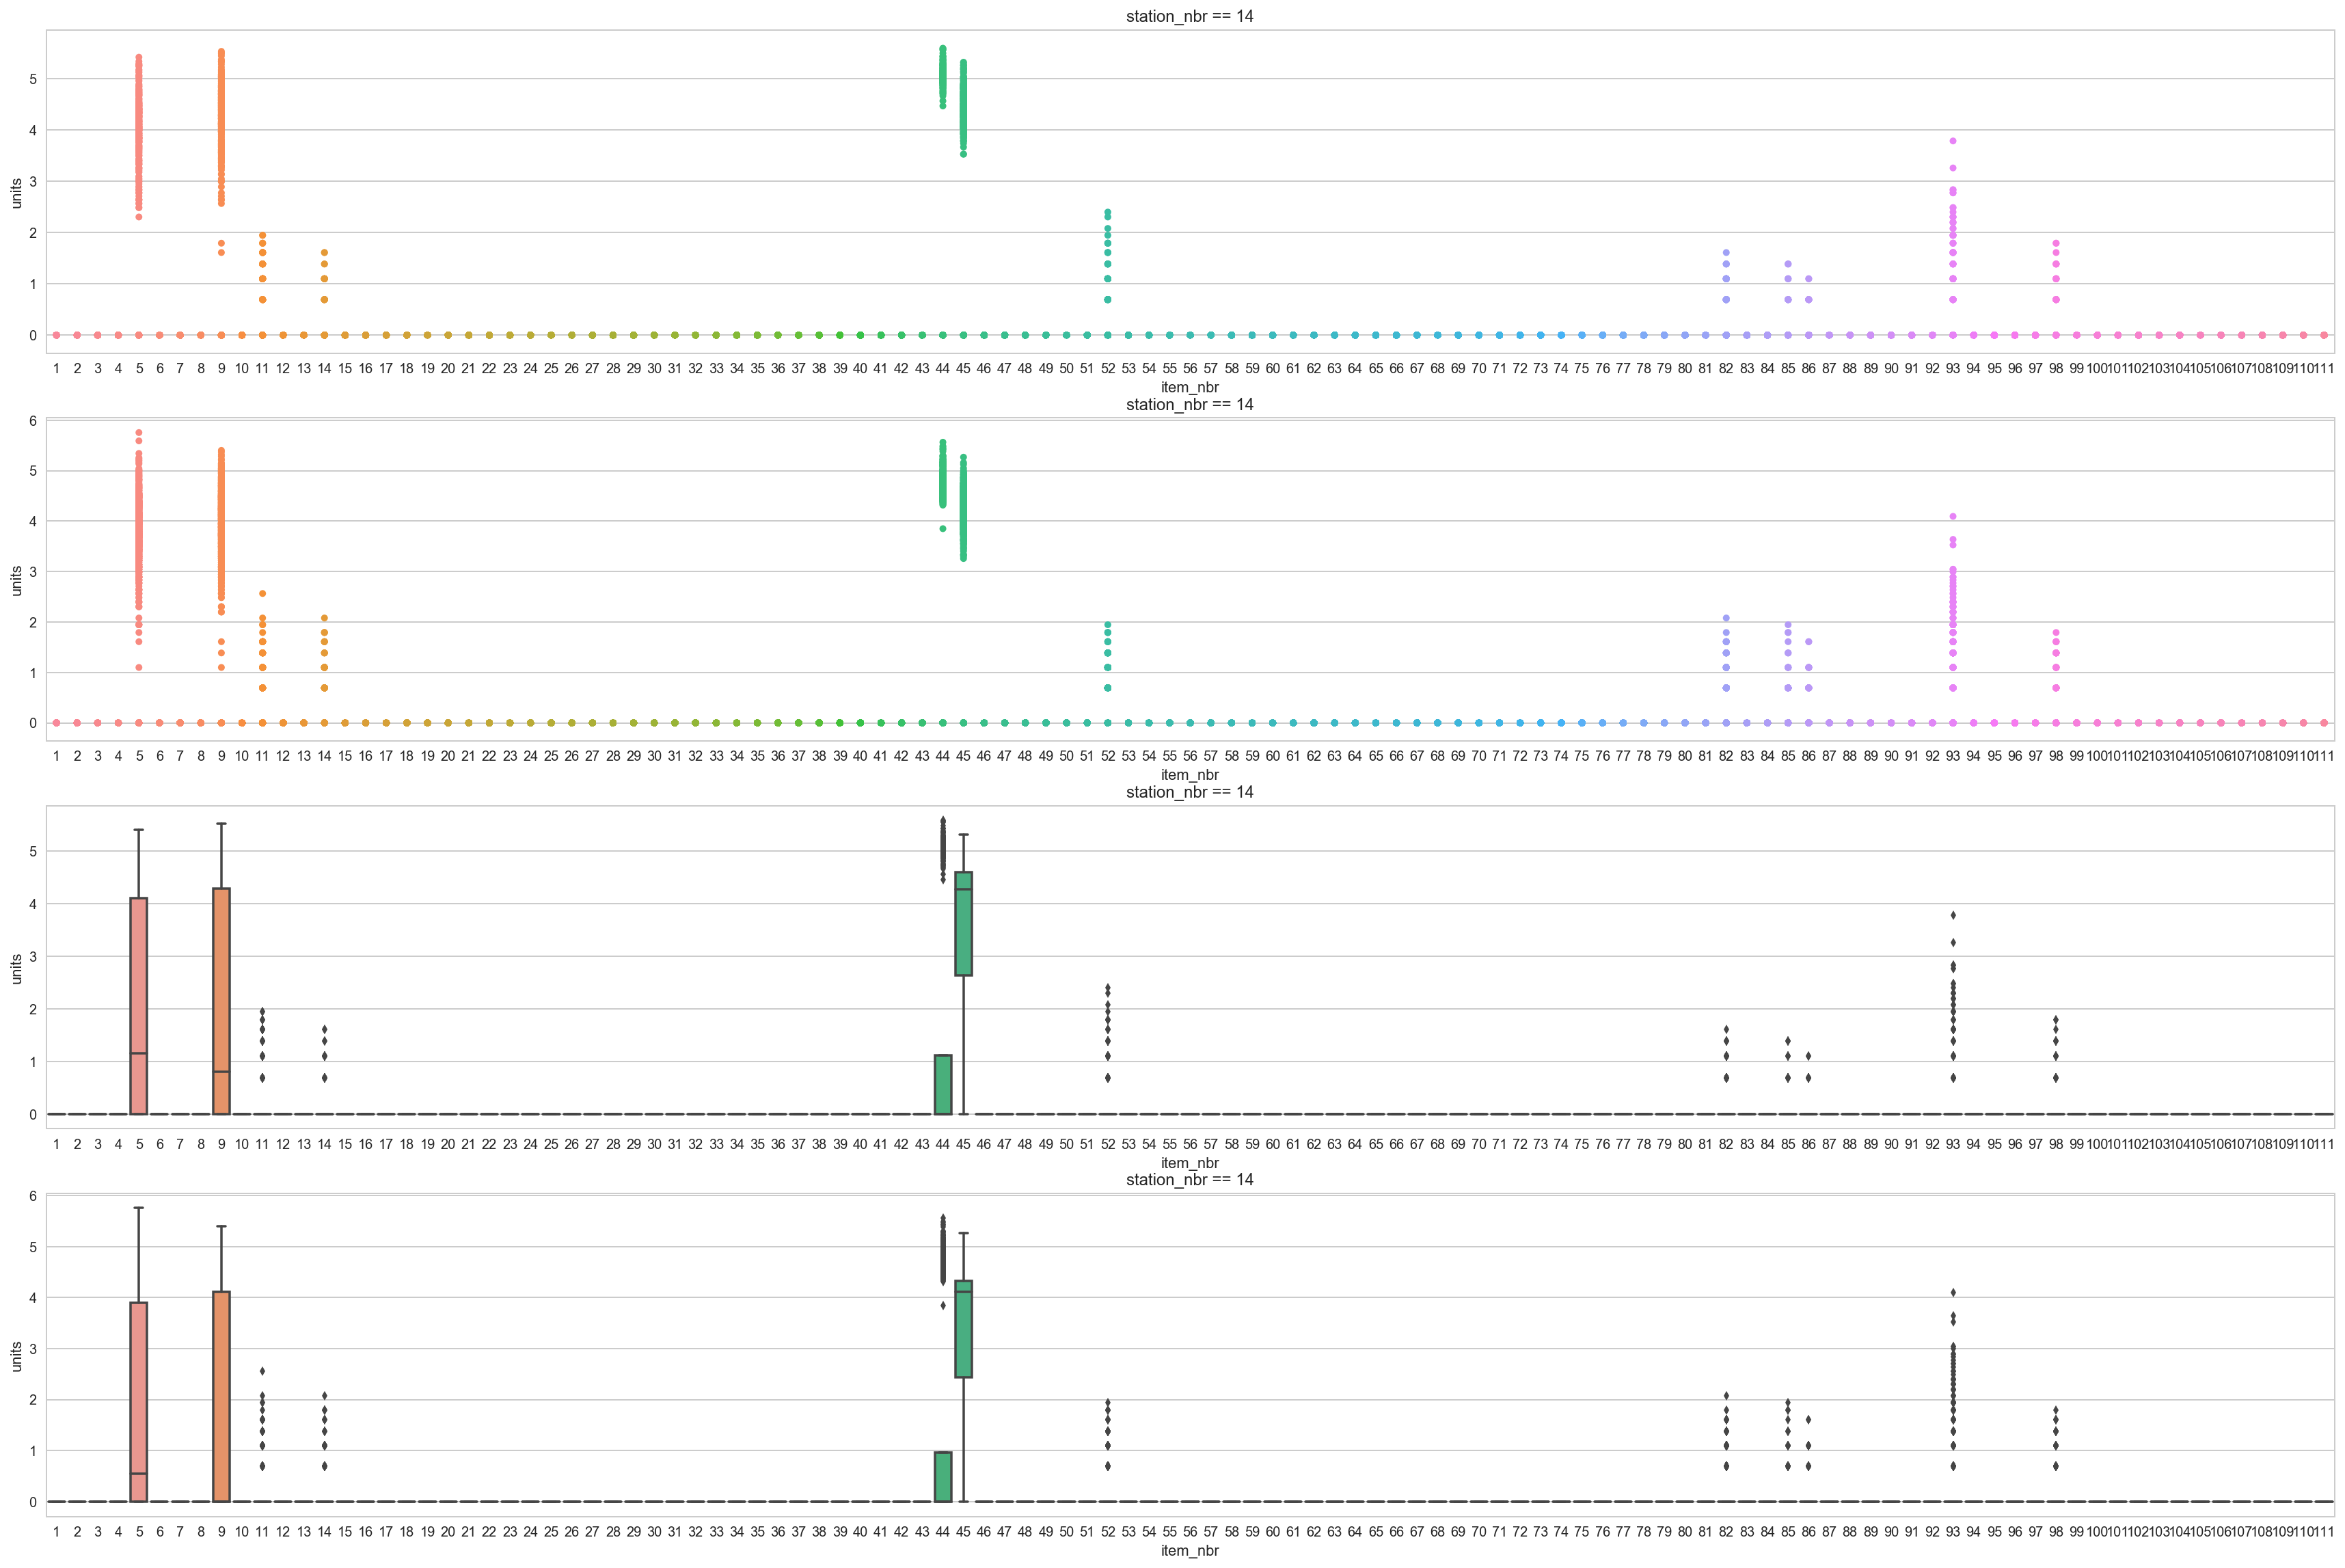

In [76]:
# station_nbr == 14
# store_nbr == 2, 6, 38, 42

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store2, processed_train_weekend_store6, processed_train_weekend_store38,
                  processed_train_weekend_store42])
data2 = pd.concat([processed_train_weekday_store2, processed_train_weekday_store6, processed_train_weekday_store38,
                  processed_train_weekday_store42])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 14')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 14')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 14')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 14')

plt.show()

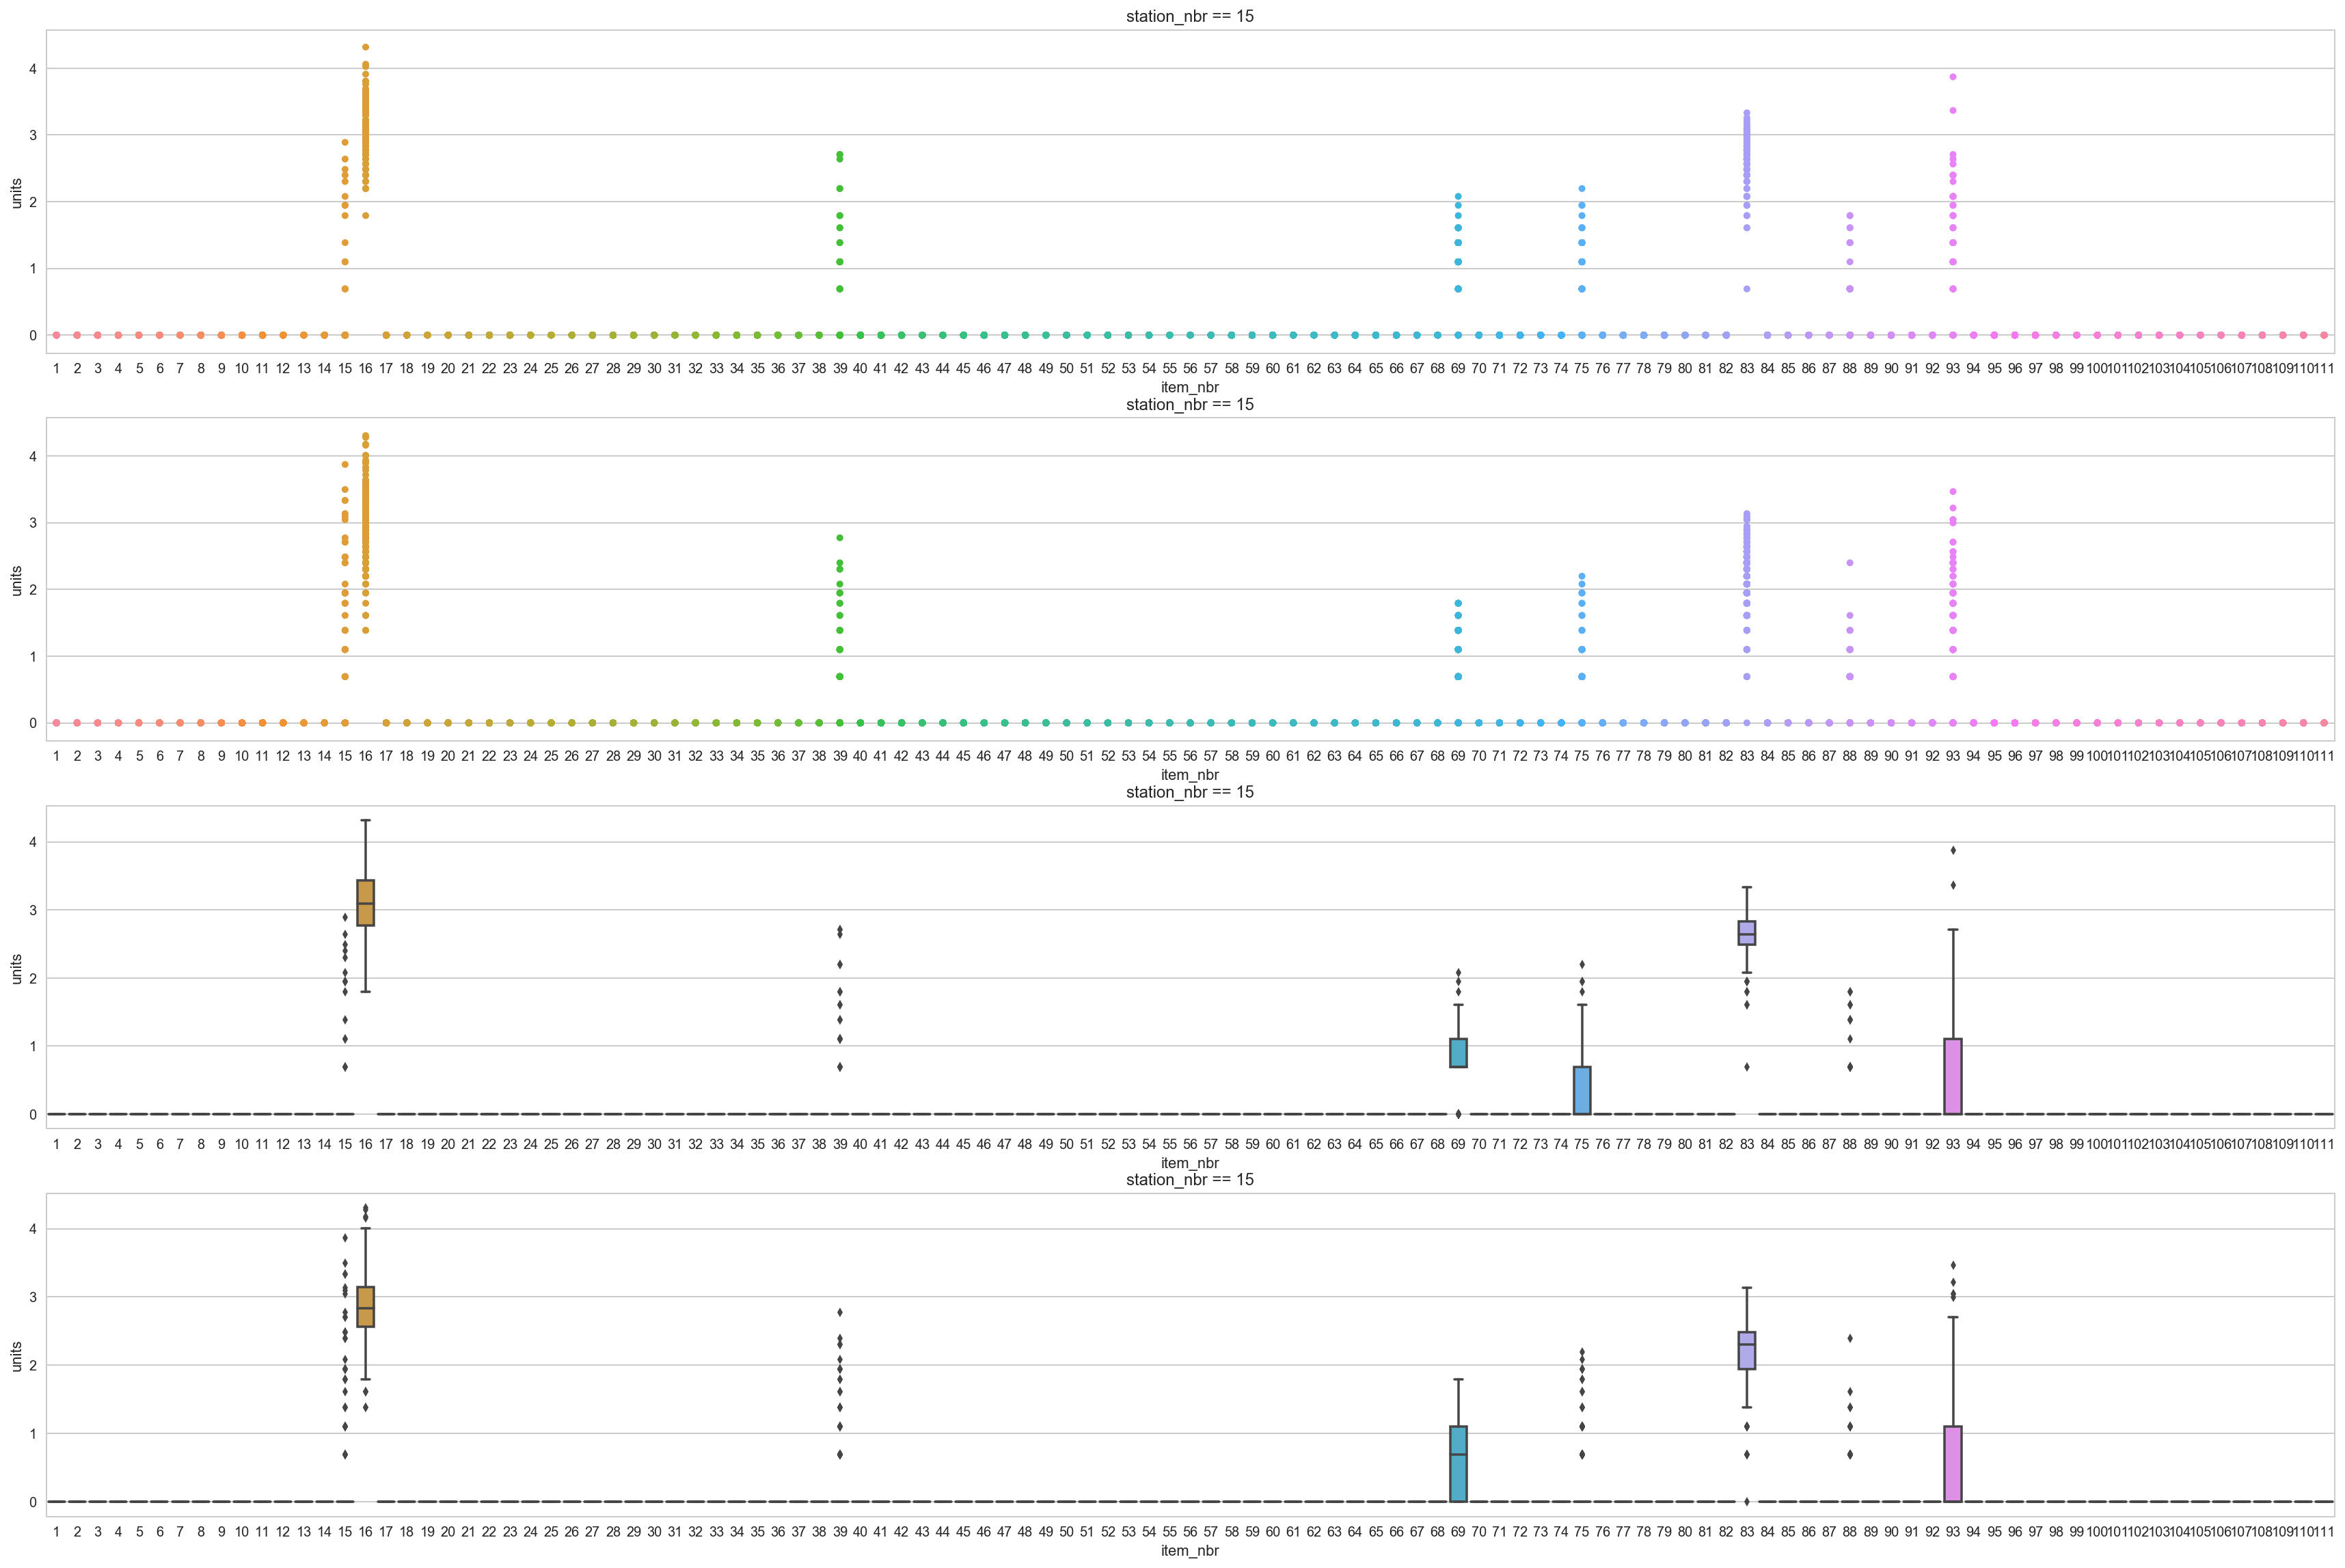

In [77]:
# station_nbr == 15
# store_nbr == 19

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store19
data2 = processed_train_weekday_store19

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 15')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 15')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 15')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 15')

plt.show()

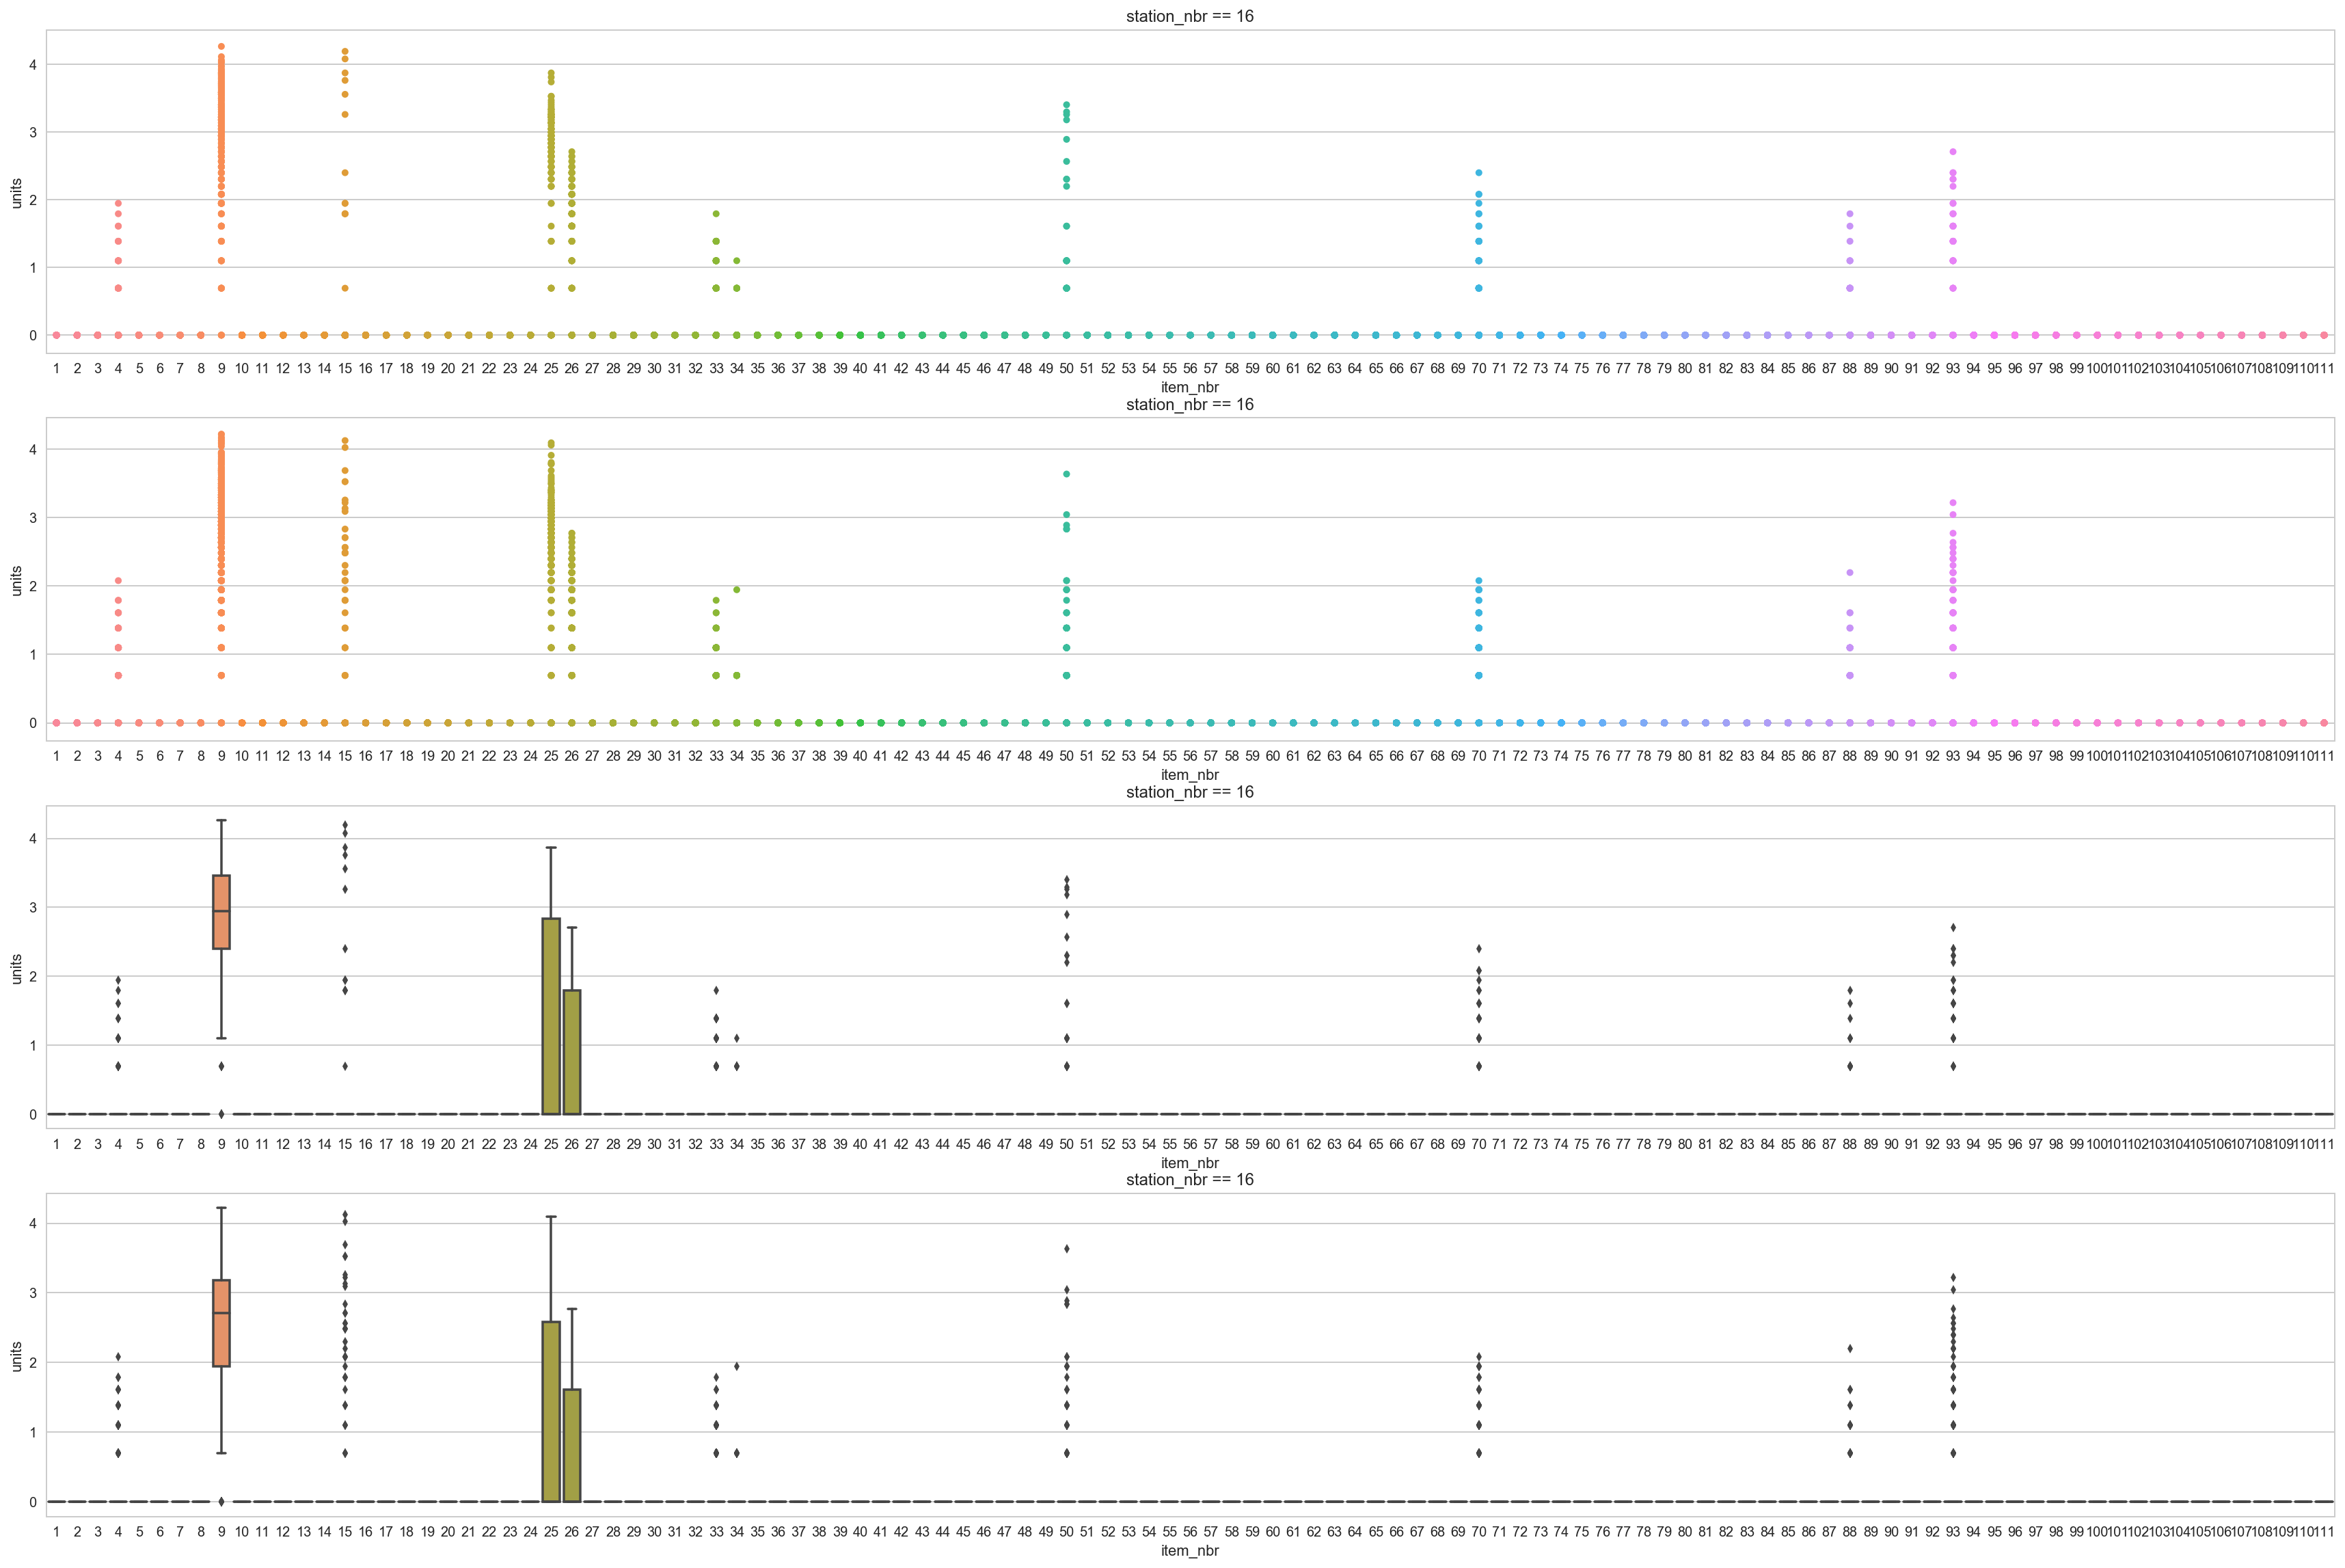

In [78]:
# station_nbr == 16
# store_nbr == 14, 45

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store14, processed_train_weekend_store45])
data2 = pd.concat([processed_train_weekday_store14, processed_train_weekday_store45])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 16')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 16')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 16')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 16')

plt.show()

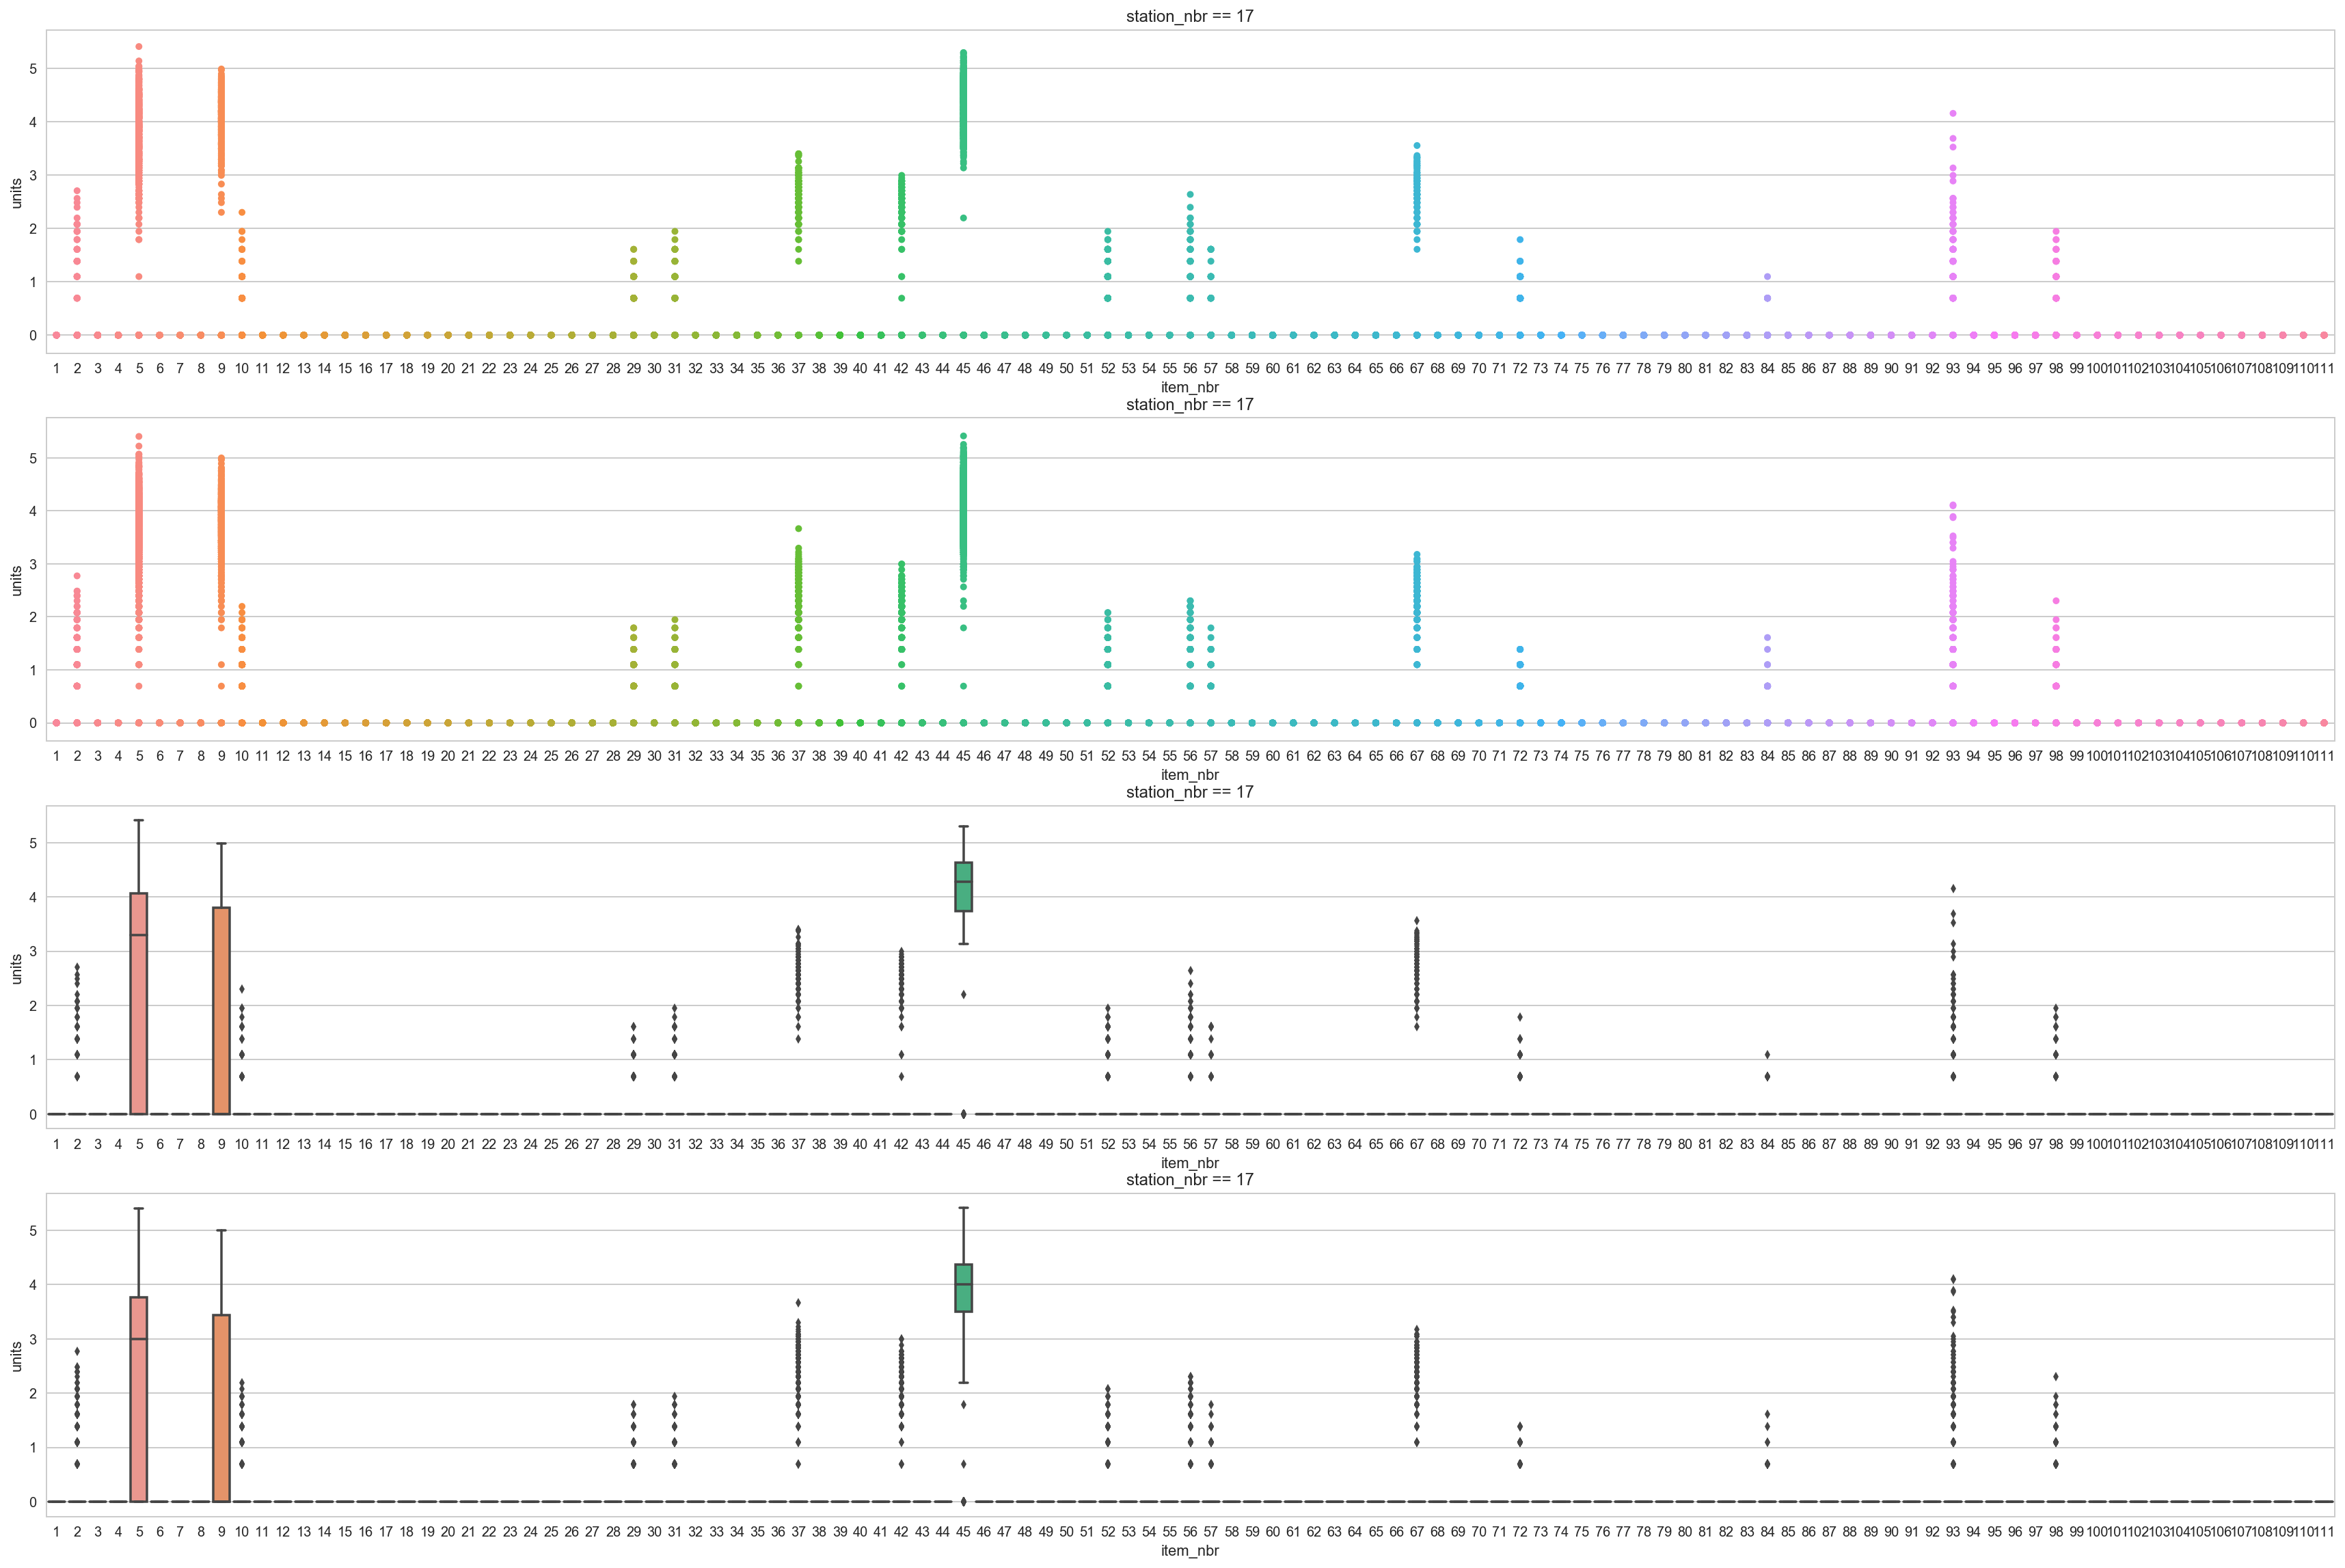

In [79]:
# station_nbr == 17
# store_nbr == 9, 18, 23, 26, 31, 34

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_weekend_store9, processed_train_weekend_store18, processed_train_weekend_store23,
                 processed_train_weekend_store26, processed_train_weekend_store31, processed_train_weekend_store34])
data2 = pd.concat([processed_train_weekday_store9, processed_train_weekday_store18, processed_train_weekday_store23,
                 processed_train_weekday_store26, processed_train_weekday_store31, processed_train_weekday_store34])

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 17')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 17')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 17')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 17')

plt.show()

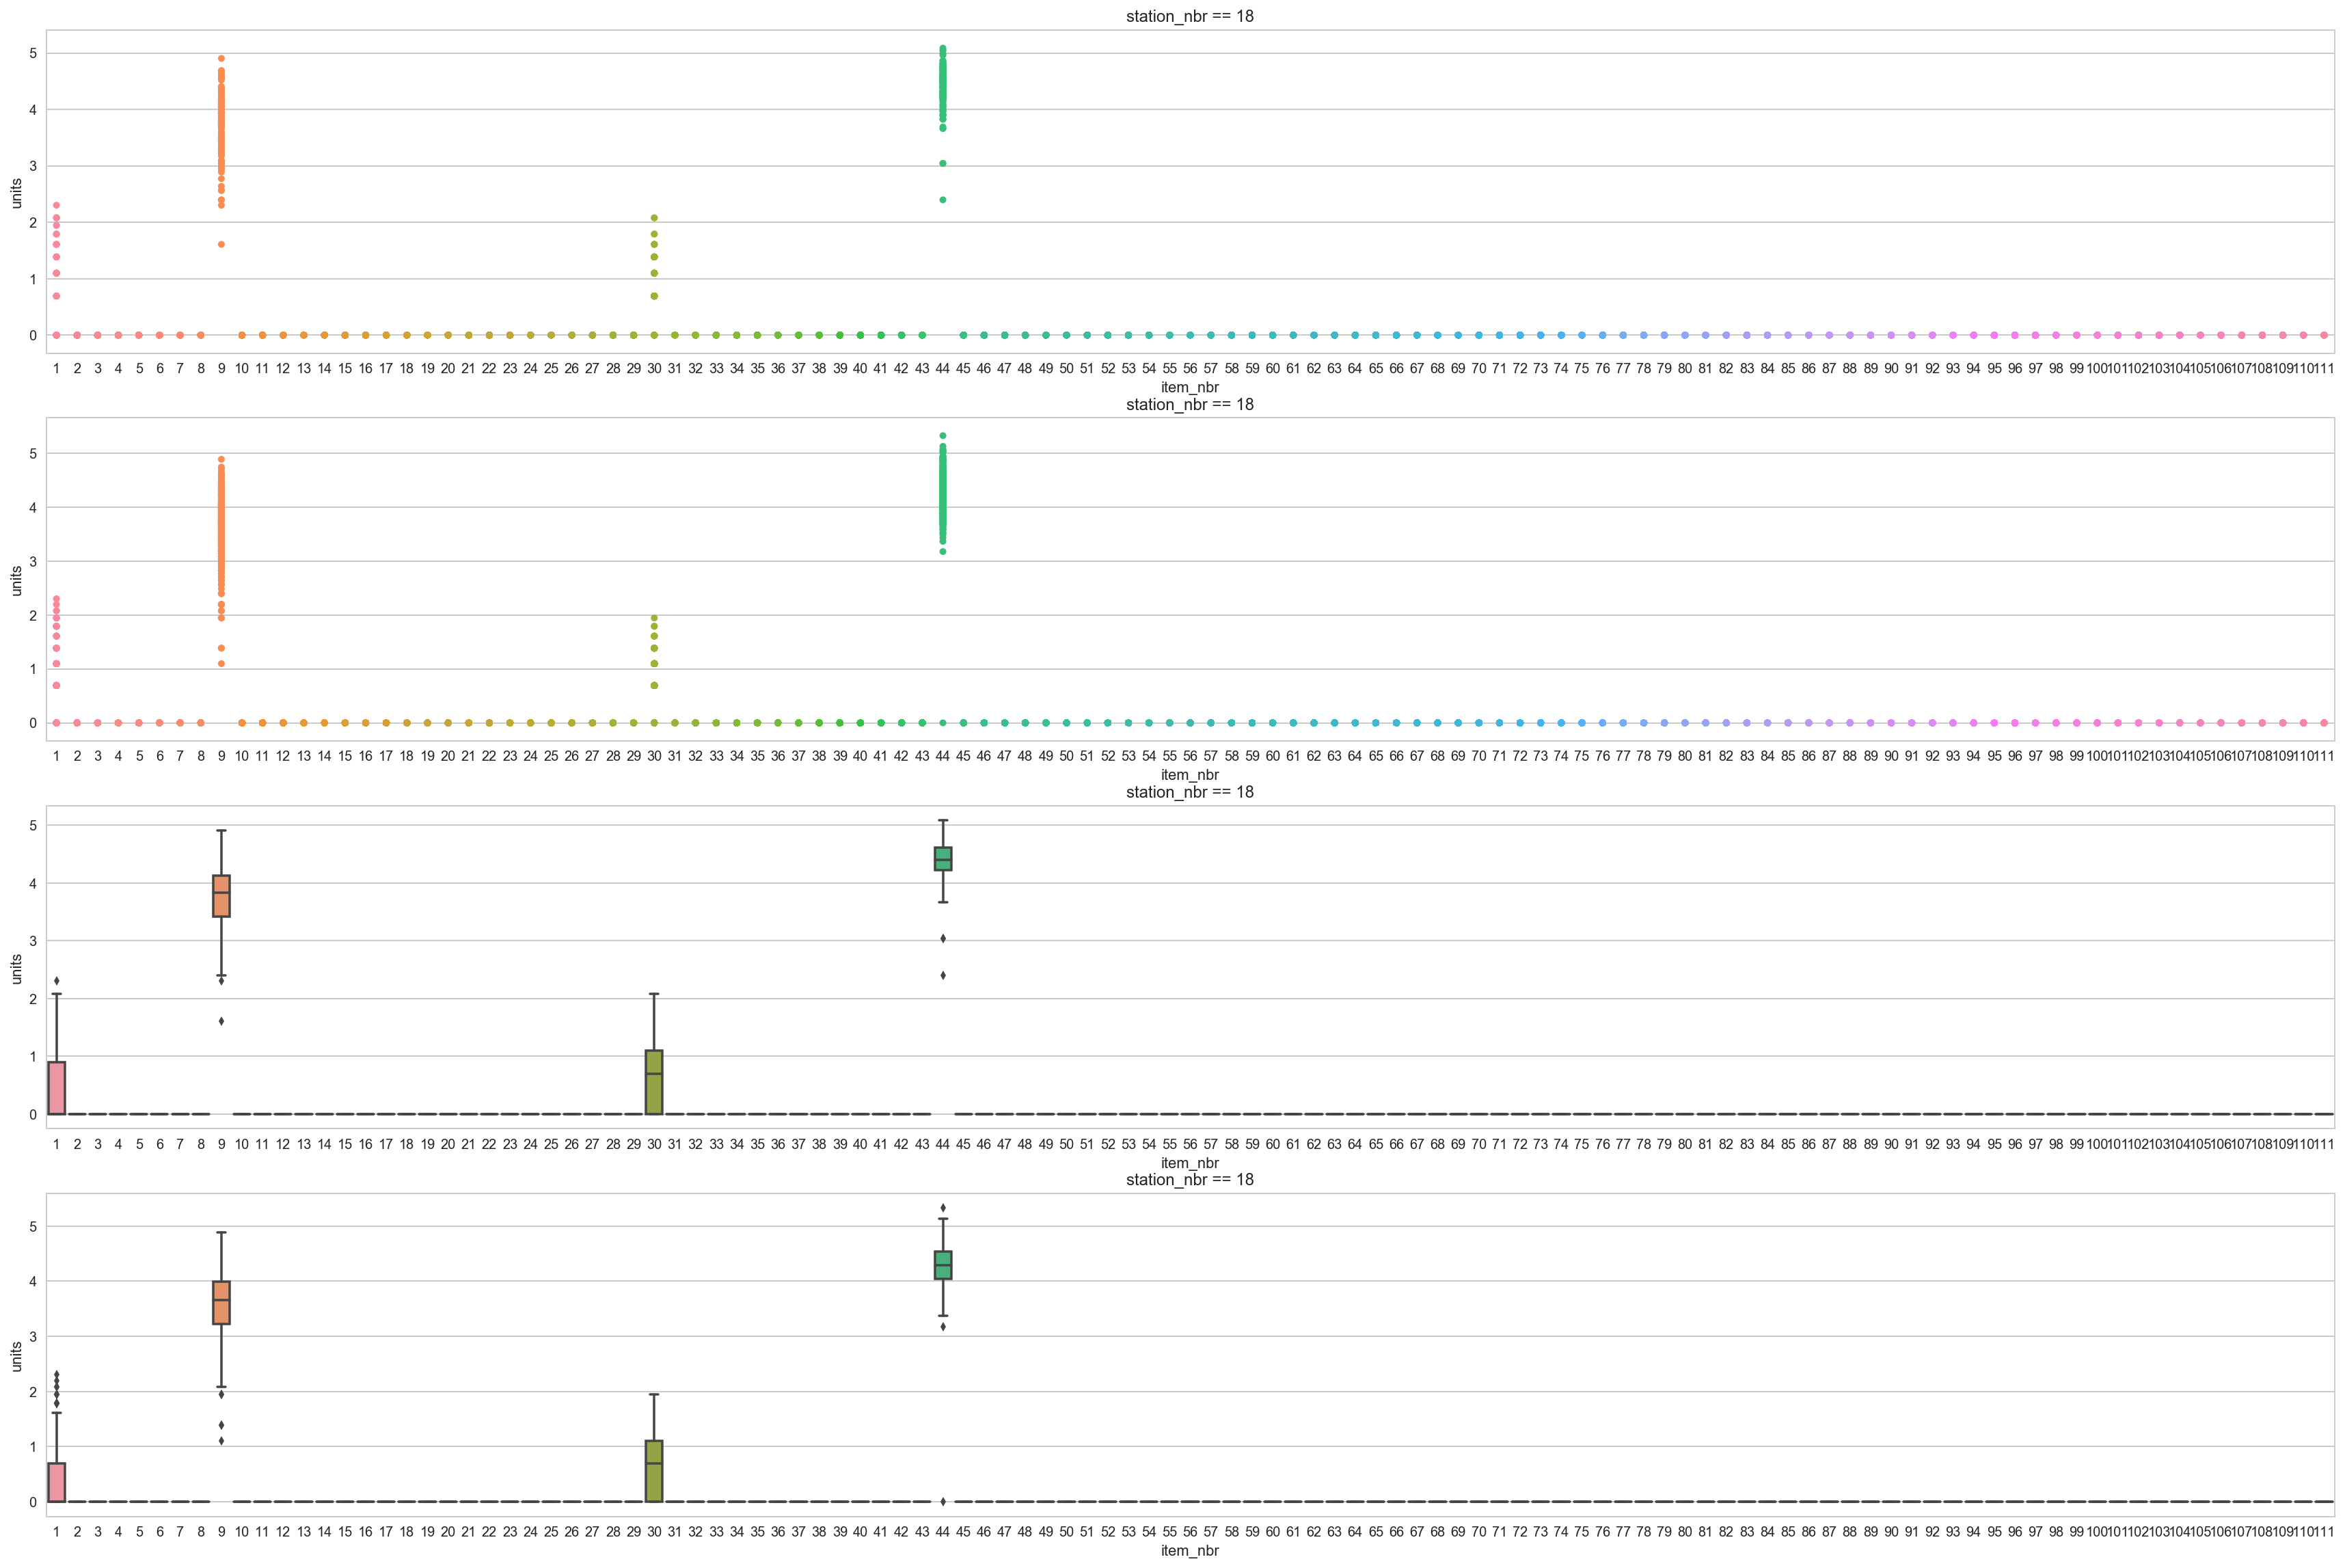

In [80]:
# station_nbr == 18
# store_nbr == 36

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store36
data2 = processed_train_weekday_store36

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 18')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 18')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 18')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 18')

plt.show()

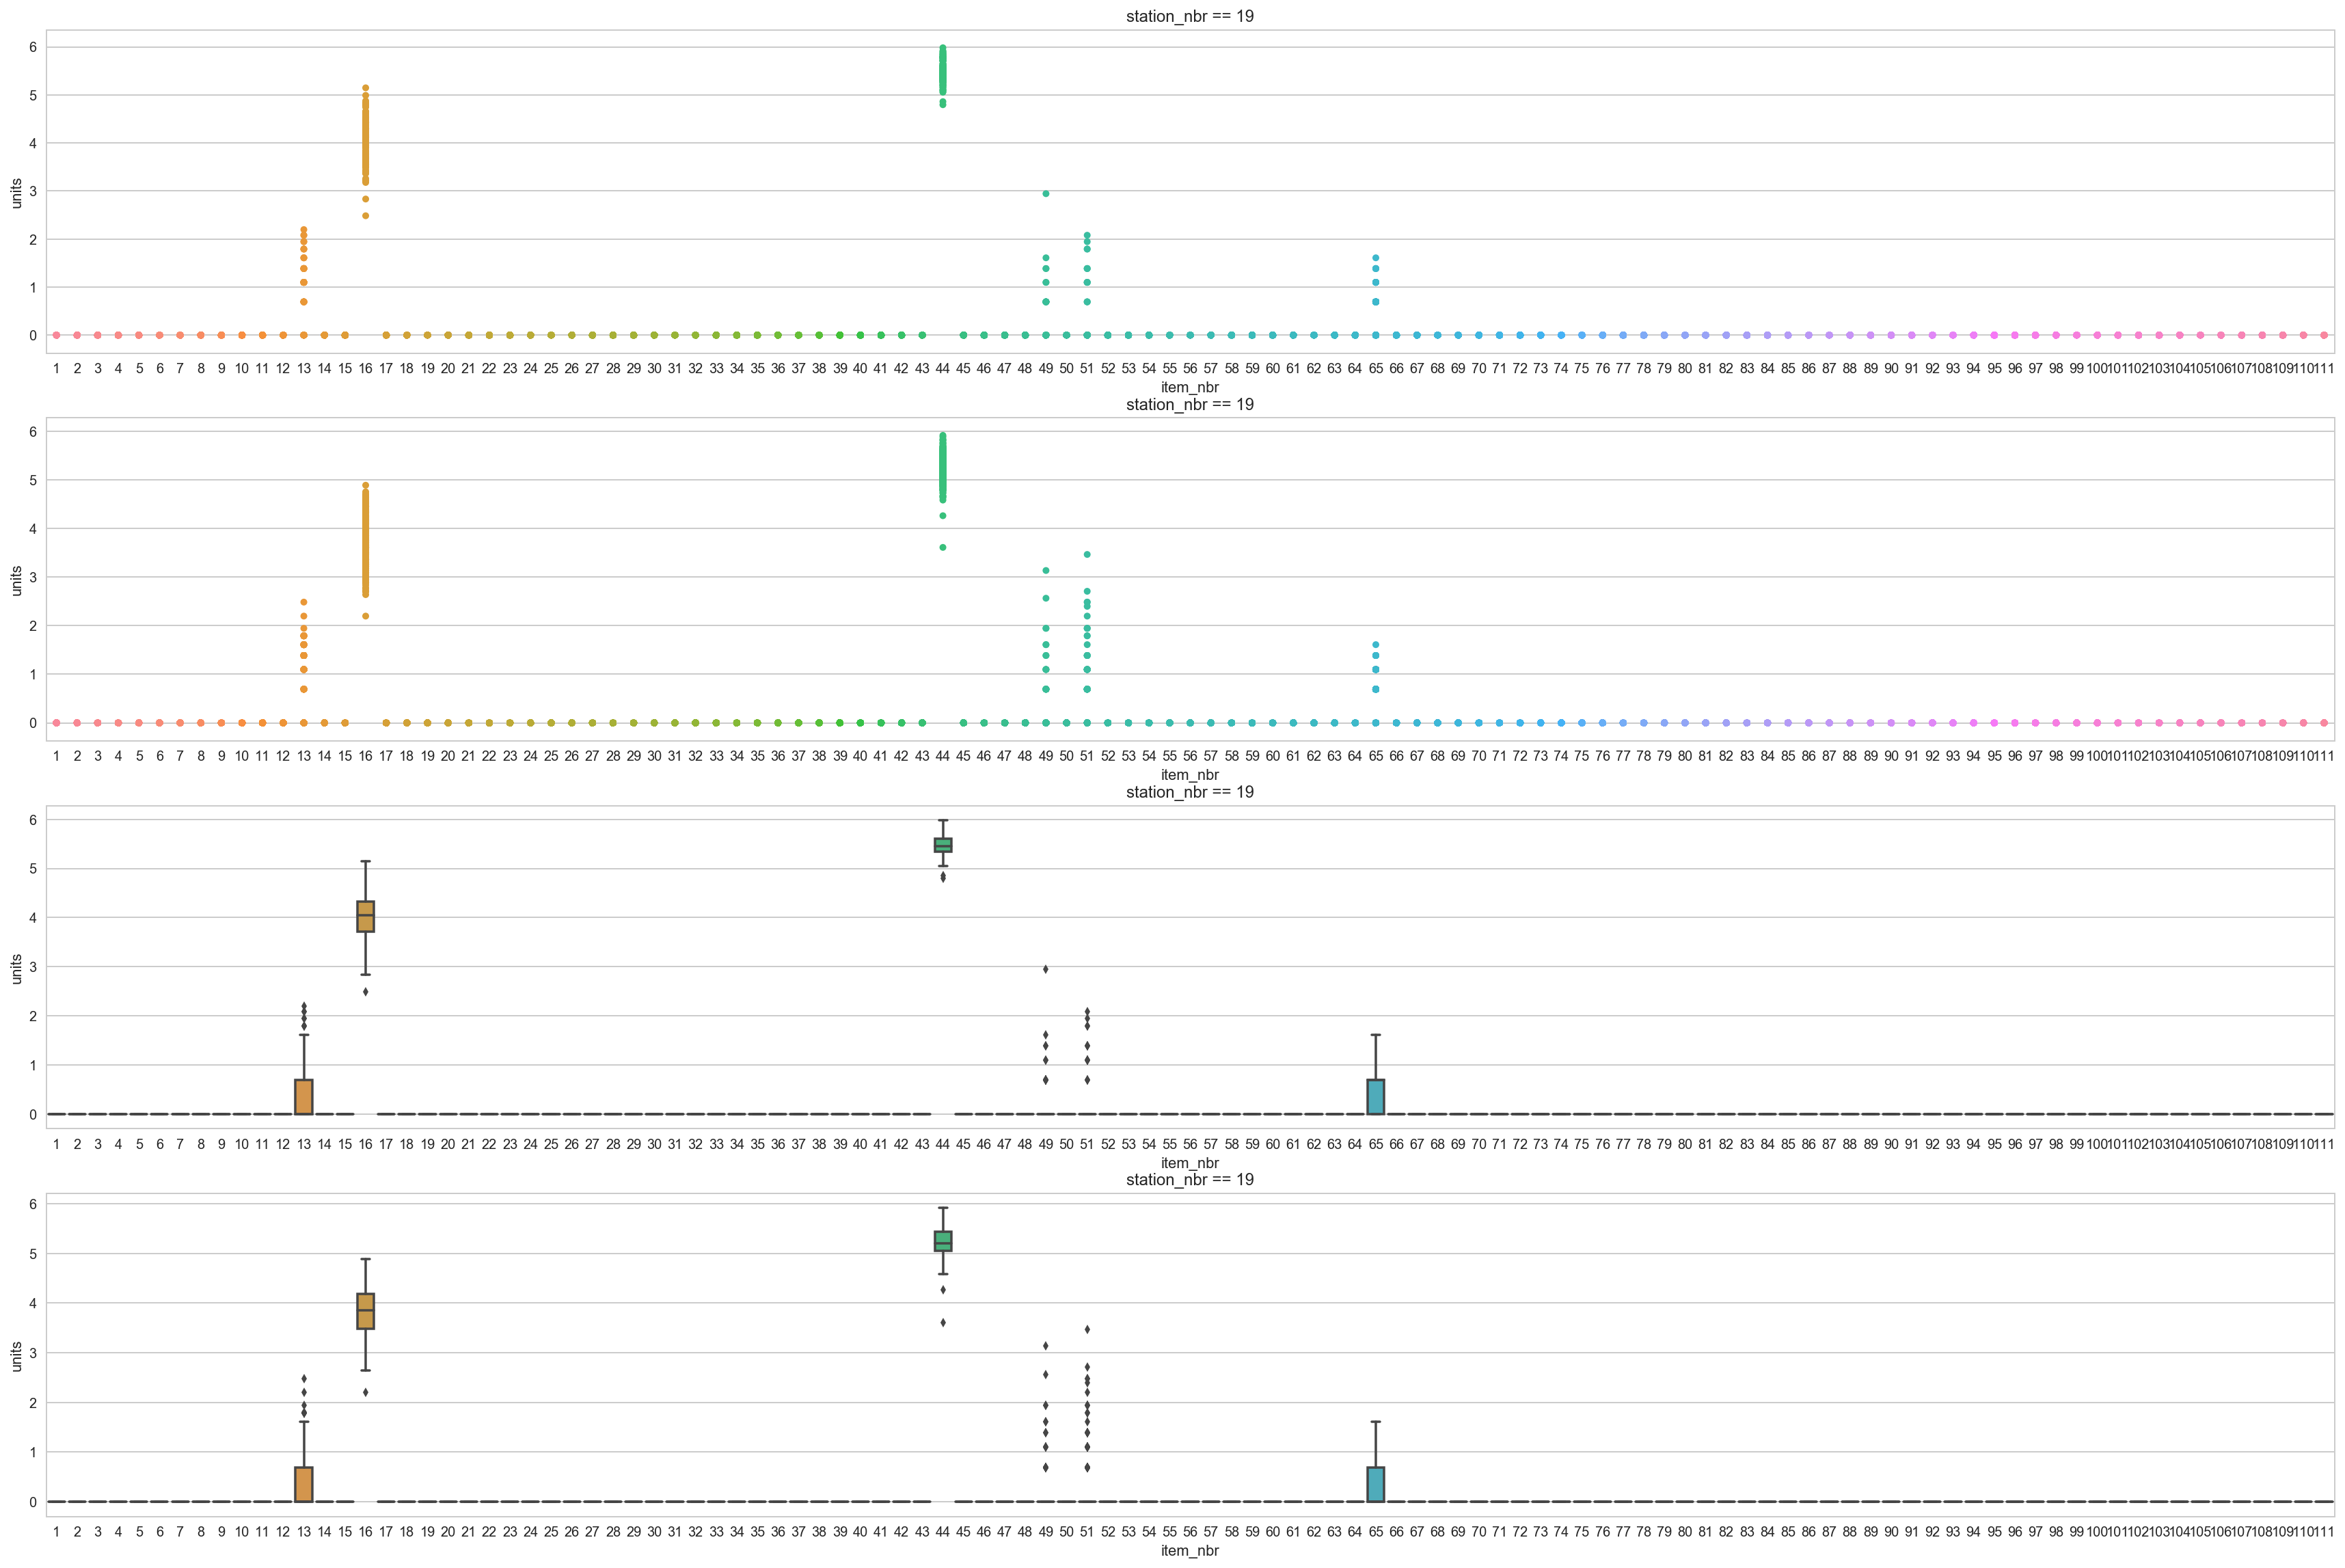

In [81]:
# station_nbr == 19
# store_nbr == 30

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store30
data2 = processed_train_weekday_store30

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 19')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 19')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 19')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 19')

plt.show()

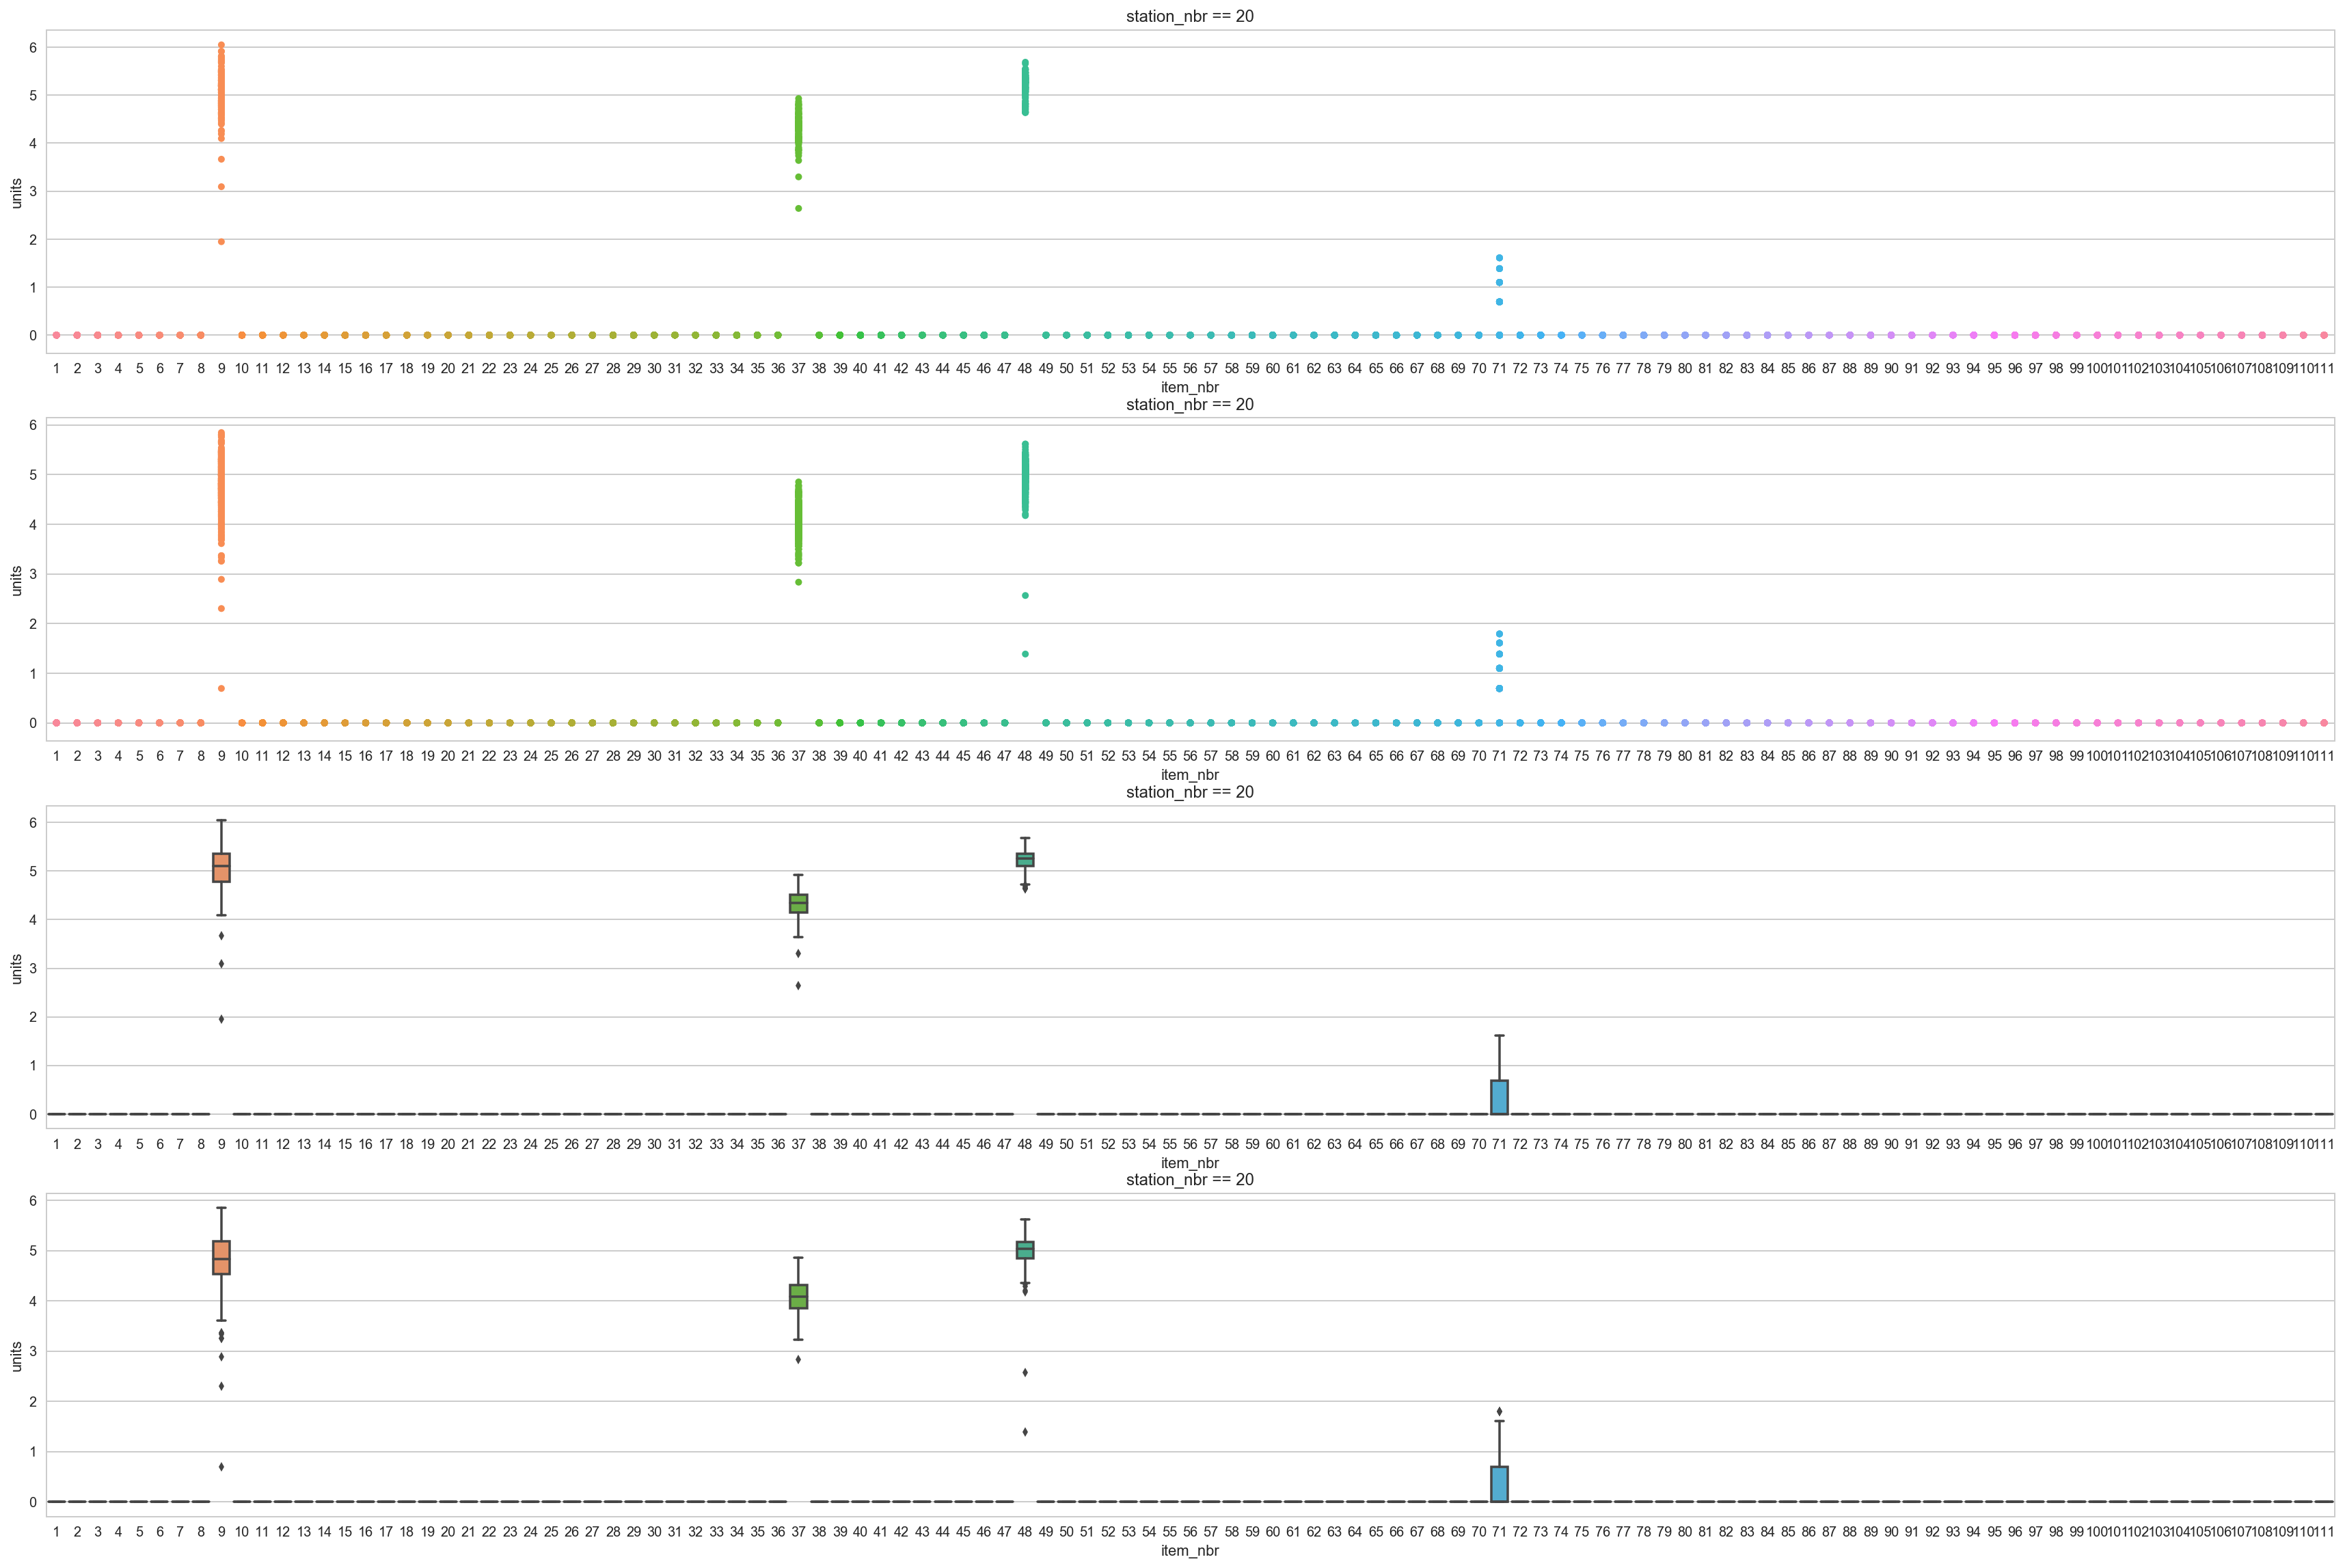

In [82]:
# station_nbr == 20
# store_nbr == 17

plt.figure(figsize = (30, 20))
data1 = processed_train_weekend_store17
data2 = processed_train_weekday_store17

plt.subplot(411)
sns.stripplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 20')

plt.subplot(412)
sns.stripplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 20')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 20')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 20')

plt.show()